# Predictor and Generator for Audio Signals using Machine Learning
## Basic Research Project
### Student Name: Prachi Sharma
### Professor Supervisor: Prof. Gerald Schuller
### Research Assistant Supervisor: Renato de C. R. Profeta

### _Dataset Exploration and Files Preparation_

#### _Preparing files and Getting Metadata from the Dataset_

In [14]:
# Downloading Dataset from London Philarmonia
!wget --no-check-certificate https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2020-07-02 19:59:00--  https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip
Resolving philharmonia-assets.s3-eu-west-1.amazonaws.com... 52.218.52.19
Connecting to philharmonia-assets.s3-eu-west-1.amazonaws.com|52.218.52.19|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 260849422 (249M) [application/zip]
Saving to: `all-samples.zip.1'

     0K .......... .......... .......... .......... ..........  0%  240K 17m41s
    50K .......... .......... .......... .......... ..........  0%  284K 16m20s
   100K .......... .......... .......... .......... ..........  0%  352K 14m54s
   150K .......... .......... .......... .......... ..........  0%  347K 14m14s
   200K .......... .......... .......... .......... ..........  0%  485K 13m8s
   250K .......... .......... .......... .

 28450K .......... .......... .......... .......... .......... 11% 2.08M 95s
 28500K .......... .......... .......... .......... .......... 11% 9.33M 95s
 28550K .......... .......... .......... .......... .......... 11% 4.27M 95s
 28600K .......... .......... .......... .......... .......... 11% 2.49M 95s
 28650K .......... .......... .......... .......... .......... 11% 4.63M 95s
 28700K .......... .......... .......... .......... .......... 11% 6.13M 94s
 28750K .......... .......... .......... .......... .......... 11% 2.64M 94s
 28800K .......... .......... .......... .......... .......... 11% 4.22M 94s
 28850K .......... .......... .......... .......... .......... 11% 3.27M 94s
 28900K .......... .......... .......... .......... .......... 11% 9.64M 94s
 28950K .......... .......... .......... .......... .......... 11% 5.59M 94s
 29000K .......... .......... .......... .......... .......... 11% 2.28M 94s
 29050K .......... .......... .......... .......... .......... 11% 5.55M 94s

124400K .......... .......... .......... .......... .......... 48% 10.1M 36s
124450K .......... .......... .......... .......... .......... 48% 2.41M 36s
124500K .......... .......... .......... .......... .......... 48% 5.76M 36s
124550K .......... .......... .......... .......... .......... 48% 6.89M 36s
124600K .......... .......... .......... .......... .......... 48% 3.76M 36s
124650K .......... .......... .......... .......... .......... 48% 4.89M 36s
124700K .......... .......... .......... .......... .......... 48% 3.85M 35s
124750K .......... .......... .......... .......... .......... 48% 11.6M 35s
124800K .......... .......... .......... .......... .......... 49% 2.74M 35s
124850K .......... .......... .......... .......... .......... 49% 7.47M 35s
124900K .......... .......... .......... .......... .......... 49% 5.61M 35s
124950K .......... .......... .......... .......... .......... 49% 11.8M 35s
125000K .......... .......... .......... .......... .......... 49% 3.09M 35s

249350K .......... .......... .......... .......... .......... 97% 7.73M 1s
249400K .......... .......... .......... .......... .......... 97% 5.56M 1s
249450K .......... .......... .......... .......... .......... 97% 2.29M 1s
249500K .......... .......... .......... .......... .......... 97% 2.56M 1s
249550K .......... .......... .......... .......... .......... 97% 12.1M 1s
249600K .......... .......... .......... .......... .......... 98% 9.05M 1s
249650K .......... .......... .......... .......... .......... 98% 1.43M 1s
249700K .......... .......... .......... .......... .......... 98% 58.7M 1s
249750K .......... .......... .......... .......... .......... 98% 3.72M 1s
249800K .......... .......... .......... .......... .......... 98% 1.09M 1s
249850K .......... .......... .......... .......... .......... 98% 59.9M 1s
249900K .......... .......... .......... .......... .......... 98% 89.8M 1s
249950K .......... .......... .......... .......... .......... 98% 71.1M 1s
250000K ....

In [6]:
# For now you can try to use the !wget "https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip",
# and maybe with this no certificate if it doesn't work.

from pywget import wget
link = "https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip"
destination = "C:/Users/DELL/Updated_binder_enviro/" # this is the directory where you want the file to be saved
# in your case the can be something like /Users/DELL/Notebookks/
wget.download(link, destination)

ModuleNotFoundError: No module named 'pywget'

In [1]:
# Importing all the necessary libraries
import os
import librosa
import fnmatch
import sys
import numpy as np
import pickle


In [2]:
# The list instruments contain name of all the instruments whose audio file we are using
instruments = ['banjo','bass-clarinet','bassoon', 'cello','clarinet','contrabassoon',
               'english-horn','double-bass','flute','french-horn','guitar','mandolin',
               'oboe','percussion','saxophone','trombone','trumpet','tuba','viola','violin']

#lists for metadata
classes = []
durations = []
files_error = []
files_mp3 = []
files_pkl = []
files_npy = []

counter = 1

# Walk through all the files of the dataset saved in the directory all-samples
for root, dirnames, filenames in os.walk('/Users/DELL/Updated_binder_enviro/all-samples/'):
    #Get all .mp3 files
    for filename in fnmatch.filter(filenames, '*.mp3'):
        print ("Get %d = %s"%(counter, filename))
        # Get path and filename without extension
        name_no_ext = os.path.join(root,os.path.splitext(filename)[0])
        try:
            # Load mp3 files
            y, sr = librosa.load(os.path.join(root, filename), sr=None)
            # Append mp3 files to the list named file_mp3
            files_mp3.append(name_no_ext+'.mp3')
            # Save audio samples as numpy array
            np.save(name_no_ext,y)
            # Append .npy files to list files_npy
            files_npy.append(name_no_ext+'.npy')
            # Get duration of audio files
            duration =librosa.get_duration(y=y, sr=sr)
            # Append duration to the list durations
            durations.append(duration)
            # Get type os instrument from filename and appending it to the list classes
            if 'percussion' in root:
                class_inst='percussion'
                classes.append(class_inst) 
            else:
                for instrument in instruments:
                    if fnmatch.fnmatchcase(filename, instrument+'*'):
                        class_inst=instrument
                        classes.append(class_inst)  
                        # Create a dictionary with data from file
            data_dictionary = {'filename': (name_no_ext+'.npy'), 'sampling rate' : sr, 'duration' : duration, 'class' : class_inst}
            # Save dictionary to a file .pkl
            with open(name_no_ext+'.pkl', 'wb') as f:
                pickle.dump(data_dictionary, f)
                # Append .pkl file to a list files_pkl
            files_pkl.append(name_no_ext+'.pkl')
        except Exception as e:
            files_error.append({'file':os.path.join(root, filename),'error':sys.exc_info()[0]})
            print("Error loading %s. Error: %s" % (filename,e))
        counter+=1    
        

Get 1 = banjo_A3_very-long_forte_normal.mp3
Get 2 = banjo_A3_very-long_piano_normal.mp3
Get 3 = banjo_A4_very-long_forte_normal.mp3
Get 4 = banjo_A4_very-long_piano_normal.mp3
Get 5 = banjo_A5_very-long_forte_normal.mp3
Get 6 = banjo_A5_very-long_piano_normal.mp3
Get 7 = banjo_As3_very-long_forte_normal.mp3
Get 8 = banjo_As3_very-long_piano_normal.mp3
Get 9 = banjo_As4_very-long_forte_normal.mp3
Get 10 = banjo_As4_very-long_piano_normal.mp3
Get 11 = banjo_As5_very-long_forte_normal.mp3
Get 12 = banjo_As5_very-long_piano_normal.mp3
Get 13 = banjo_B3_very-long_forte_normal.mp3
Get 14 = banjo_B3_very-long_piano_normal.mp3
Get 15 = banjo_B4_very-long_forte_normal.mp3
Get 16 = banjo_B4_very-long_piano_normal.mp3
Get 17 = banjo_B5_very-long_forte_normal.mp3
Get 18 = banjo_B5_very-long_piano_normal.mp3
Get 19 = banjo_C3_very-long_forte_normal.mp3
Get 20 = banjo_C3_very-long_piano_normal.mp3
Get 21 = banjo_C4_very-long_forte_normal.mp3
Get 22 = banjo_C4_very-long_piano_normal.mp3
Get 23 = banj

Get 171 = bass-clarinet_As2_very-long_mezzo-piano_harmonic.mp3
Get 172 = bass-clarinet_As3_025_fortissimo_normal.mp3
Get 173 = bass-clarinet_As3_025_pianissimo_normal.mp3
Get 174 = bass-clarinet_As3_05_fortissimo_normal.mp3
Get 175 = bass-clarinet_As3_05_pianissimo_normal.mp3
Get 176 = bass-clarinet_As3_15_forte_normal.mp3
Get 177 = bass-clarinet_As3_15_fortissimo_normal.mp3
Get 178 = bass-clarinet_As3_15_mezzo-forte_normal.mp3
Get 179 = bass-clarinet_As3_15_pianissimo_normal.mp3
Get 180 = bass-clarinet_As3_15_piano_normal.mp3
Get 181 = bass-clarinet_As3_1_forte_normal.mp3
Get 182 = bass-clarinet_As3_1_fortissimo_normal.mp3
Get 183 = bass-clarinet_As3_1_mezzo-forte_normal.mp3
Get 184 = bass-clarinet_As3_1_pianissimo_normal.mp3
Get 185 = bass-clarinet_As3_phrase_forte_tremolo.mp3
Get 186 = bass-clarinet_As3_very-long_forte_normal.mp3
Get 187 = bass-clarinet_As3_very-long_mezzo-forte_normal.mp3
Get 188 = bass-clarinet_As3_very-long_piano_normal.mp3
Get 189 = bass-clarinet_As4_025_forte_n

Get 331 = bass-clarinet_C4_1_fortissimo_normal.mp3
Get 332 = bass-clarinet_C4_1_mezzo-forte_normal.mp3
Get 333 = bass-clarinet_C4_1_pianissimo_normal.mp3
Get 334 = bass-clarinet_C4_1_piano_normal.mp3
Get 335 = bass-clarinet_C5_025_forte_normal.mp3
Get 336 = bass-clarinet_C5_025_fortissimo_normal.mp3
Get 337 = bass-clarinet_C5_025_mezzo-forte_normal.mp3
Get 338 = bass-clarinet_C5_025_pianissimo_normal.mp3
Get 339 = bass-clarinet_C5_025_piano_normal.mp3
Get 340 = bass-clarinet_C5_05_forte_normal.mp3
Get 341 = bass-clarinet_C5_05_fortissimo_normal.mp3
Get 342 = bass-clarinet_C5_05_mezzo-forte_normal.mp3
Get 343 = bass-clarinet_C5_05_pianissimo_normal.mp3
Get 344 = bass-clarinet_C5_05_piano_normal.mp3
Get 345 = bass-clarinet_C5_15_forte_normal.mp3
Get 346 = bass-clarinet_C5_15_fortissimo_normal.mp3
Get 347 = bass-clarinet_C5_15_mezzo-forte_normal.mp3
Get 348 = bass-clarinet_C5_15_pianissimo_normal.mp3
Get 349 = bass-clarinet_C5_15_piano_normal.mp3
Get 350 = bass-clarinet_C5_1_forte_normal.

Get 490 = bass-clarinet_D4_15_mezzo-forte_normal.mp3
Get 491 = bass-clarinet_D4_15_pianissimo_normal.mp3
Get 492 = bass-clarinet_D4_15_piano_normal.mp3
Get 493 = bass-clarinet_D4_1_forte_normal.mp3
Get 494 = bass-clarinet_D4_1_fortissimo_normal.mp3
Get 495 = bass-clarinet_D4_1_mezzo-forte_normal.mp3
Get 496 = bass-clarinet_D4_1_pianissimo_normal.mp3
Get 497 = bass-clarinet_D4_1_piano_normal.mp3
Get 498 = bass-clarinet_D4_phrase_cresc-decresc_normal.mp3
Get 499 = bass-clarinet_D4_very-long_mezzo-piano_harmonic.mp3
Get 500 = bass-clarinet_D5_025_forte_normal.mp3
Get 501 = bass-clarinet_D5_025_fortissimo_normal.mp3
Get 502 = bass-clarinet_D5_025_mezzo-forte_normal.mp3
Get 503 = bass-clarinet_D5_025_pianissimo_normal.mp3
Get 504 = bass-clarinet_D5_025_piano_normal.mp3
Get 505 = bass-clarinet_D5_05_forte_normal.mp3
Get 506 = bass-clarinet_D5_05_fortissimo_normal.mp3
Get 507 = bass-clarinet_D5_05_mezzo-forte_normal.mp3
Get 508 = bass-clarinet_D5_05_pianissimo_normal.mp3
Get 509 = bass-clarin

Get 650 = bass-clarinet_E3_phrase_mezzo-forte_legato.mp3
Get 651 = bass-clarinet_E3_phrase_mezzo-forte_nonlegato.mp3
Get 652 = bass-clarinet_E3_phrase_mezzo-forte_staccatissimo.mp3
Get 653 = bass-clarinet_E3_phrase_mezzo-forte_tongued-slur.mp3
Get 654 = bass-clarinet_E4_025_forte_normal.mp3
Get 655 = bass-clarinet_E4_025_fortissimo_normal.mp3
Get 656 = bass-clarinet_E4_025_mezzo-forte_normal.mp3
Get 657 = bass-clarinet_E4_025_pianissimo_normal.mp3
Get 658 = bass-clarinet_E4_025_piano_normal.mp3
Get 659 = bass-clarinet_E4_05_forte_normal.mp3
Get 660 = bass-clarinet_E4_05_fortissimo_normal.mp3
Get 661 = bass-clarinet_E4_05_mezzo-forte_normal.mp3
Get 662 = bass-clarinet_E4_05_pianissimo_normal.mp3
Get 663 = bass-clarinet_E4_05_piano_normal.mp3
Get 664 = bass-clarinet_E4_15_forte_normal.mp3
Get 665 = bass-clarinet_E4_15_fortissimo_normal.mp3
Get 666 = bass-clarinet_E4_15_mezzo-forte_normal.mp3
Get 667 = bass-clarinet_E4_15_pianissimo_normal.mp3
Get 668 = bass-clarinet_E4_15_piano_normal.mp

Get 812 = bass-clarinet_Fs3_15_forte_normal.mp3
Get 813 = bass-clarinet_Fs3_15_fortissimo_normal.mp3
Get 814 = bass-clarinet_Fs3_15_mezzo-forte_normal.mp3
Get 815 = bass-clarinet_Fs3_15_pianissimo_normal.mp3
Get 816 = bass-clarinet_Fs3_15_piano_normal.mp3
Get 817 = bass-clarinet_Fs3_1_forte_normal.mp3
Get 818 = bass-clarinet_Fs3_1_fortissimo_normal.mp3
Get 819 = bass-clarinet_Fs3_1_mezzo-forte_normal.mp3
Get 820 = bass-clarinet_Fs3_1_pianissimo_normal.mp3
Get 821 = bass-clarinet_Fs3_1_piano_normal.mp3
Get 822 = bass-clarinet_Fs3_phrase_mezzo-forte_staccatissimo.mp3
Get 823 = bass-clarinet_Fs4_025_forte_normal.mp3
Get 824 = bass-clarinet_Fs4_025_fortissimo_normal.mp3
Get 825 = bass-clarinet_Fs4_025_mezzo-forte_normal.mp3
Get 826 = bass-clarinet_Fs4_025_pianissimo_normal.mp3
Get 827 = bass-clarinet_Fs4_025_piano_normal.mp3
Get 828 = bass-clarinet_Fs4_05_forte_normal.mp3
Get 829 = bass-clarinet_Fs4_05_fortissimo_normal.mp3
Get 830 = bass-clarinet_Fs4_05_mezzo-forte_normal.mp3
Get 831 = ba

Get 972 = bass-clarinet_Gs3_05_forte_normal.mp3
Get 973 = bass-clarinet_Gs3_05_fortissimo_normal.mp3
Get 974 = bass-clarinet_Gs3_05_pianissimo_normal.mp3
Get 975 = bass-clarinet_Gs3_05_piano_normal.mp3
Get 976 = bass-clarinet_Gs3_15_forte_normal.mp3
Get 977 = bass-clarinet_Gs3_15_fortissimo_normal.mp3
Get 978 = bass-clarinet_Gs3_15_pianissimo_normal.mp3
Get 979 = bass-clarinet_Gs3_15_piano_normal.mp3
Get 980 = bass-clarinet_Gs3_1_forte_normal.mp3
Get 981 = bass-clarinet_Gs3_1_fortissimo_normal.mp3
Get 982 = bass-clarinet_Gs3_1_pianissimo_normal.mp3
Get 983 = bass-clarinet_Gs3_1_piano_normal.mp3
Get 984 = bass-clarinet_Gs3_phrase_cresc-decresc_normal.mp3
Get 985 = bass-clarinet_Gs4_025_forte_normal.mp3
Get 986 = bass-clarinet_Gs4_025_fortissimo_normal.mp3
Get 987 = bass-clarinet_Gs4_025_mezzo-forte_normal.mp3
Get 988 = bass-clarinet_Gs4_025_pianissimo_normal.mp3
Get 989 = bass-clarinet_Gs4_025_piano_normal.mp3
Get 990 = bass-clarinet_Gs4_05_forte_normal.mp3
Get 991 = bass-clarinet_Gs4_0

Get 1143 = bassoon_As4_long_forte_minor-trill.mp3
Get 1144 = bassoon_B1_025_forte_normal.mp3
Get 1145 = bassoon_B1_025_fortissimo_normal.mp3
Get 1146 = bassoon_B1_025_mezzo-piano_normal.mp3
Get 1147 = bassoon_B1_025_piano_normal.mp3
Get 1148 = bassoon_B1_05_forte_normal.mp3
Get 1149 = bassoon_B1_05_fortissimo_normal.mp3
Get 1150 = bassoon_B1_05_mezzo-piano_normal.mp3
Get 1151 = bassoon_B1_05_piano_normal.mp3
Get 1152 = bassoon_B1_15_forte_normal.mp3
Get 1153 = bassoon_B1_15_fortissimo_normal.mp3
Get 1154 = bassoon_B1_15_mezzo-piano_normal.mp3
Get 1155 = bassoon_B1_15_piano_normal.mp3
Get 1156 = bassoon_B1_1_forte_normal.mp3
Get 1157 = bassoon_B1_1_fortissimo_normal.mp3
Get 1158 = bassoon_B1_1_mezzo-piano_normal.mp3
Get 1159 = bassoon_B1_1_piano_normal.mp3
Get 1160 = bassoon_B2_025_forte_normal.mp3
Get 1161 = bassoon_B2_025_fortissimo_normal.mp3
Get 1162 = bassoon_B2_025_mezzo-piano_normal.mp3
Get 1163 = bassoon_B2_025_piano_normal.mp3
Get 1164 = bassoon_B2_05_forte_normal.mp3
Get 1165 

Get 1323 = bassoon_Cs4_1_mezzo-forte_normal.mp3
Get 1324 = bassoon_Cs4_1_mezzo-piano_normal.mp3
Get 1325 = bassoon_Cs4_1_piano_normal.mp3
Get 1326 = bassoon_Cs4_very-long_cresc-decresc_normal.mp3
Get 1327 = bassoon_Cs5_025_forte_normal.mp3
Get 1328 = bassoon_Cs5_025_fortissimo_normal.mp3
Get 1329 = bassoon_Cs5_025_mezzo-piano_normal.mp3
Get 1330 = bassoon_Cs5_025_piano_normal.mp3
Get 1331 = bassoon_Cs5_05_forte_normal.mp3
Get 1332 = bassoon_Cs5_05_fortissimo_normal.mp3
Get 1333 = bassoon_Cs5_05_mezzo-forte_normal.mp3
Get 1334 = bassoon_Cs5_05_mezzo-piano_normal.mp3
Get 1335 = bassoon_Cs5_05_piano_normal.mp3
Get 1336 = bassoon_Cs5_15_piano_normal.mp3
Get 1337 = bassoon_Cs5_1_forte_normal.mp3
Get 1338 = bassoon_Cs5_1_fortissimo_normal.mp3
Get 1339 = bassoon_Cs5_1_mezzo-piano_normal.mp3
Get 1340 = bassoon_Cs5_1_piano_normal.mp3
Get 1341 = bassoon_D2_025_forte_normal.mp3
Get 1342 = bassoon_D2_025_fortissimo_normal.mp3
Get 1343 = bassoon_D2_025_mezzo-piano_normal.mp3
Get 1344 = bassoon_D2_0

Get 1502 = bassoon_E4_025_mezzo-piano_normal.mp3
Get 1503 = bassoon_E4_025_piano_normal.mp3
Get 1504 = bassoon_E4_05_forte_normal.mp3
Get 1505 = bassoon_E4_05_fortissimo_normal.mp3
Get 1506 = bassoon_E4_05_mezzo-forte_normal.mp3
Get 1507 = bassoon_E4_05_mezzo-piano_normal.mp3
Get 1508 = bassoon_E4_05_piano_normal.mp3
Get 1509 = bassoon_E4_15_mezzo-piano_normal.mp3
Get 1510 = bassoon_E4_1_forte_normal.mp3
Get 1511 = bassoon_E4_1_mezzo-forte_normal.mp3
Get 1512 = bassoon_E4_1_mezzo-piano_normal.mp3
Get 1513 = bassoon_E4_1_piano_normal.mp3
Get 1514 = bassoon_E4_long_forte_major-trill.mp3
Get 1515 = bassoon_E4_very-long_cresc-decresc_normal.mp3
Get 1516 = bassoon_E5_025_fortissimo_normal.mp3
Get 1517 = bassoon_E5_025_mezzo-piano_normal.mp3
Get 1518 = bassoon_E5_025_piano_normal.mp3
Get 1519 = bassoon_E5_05_forte_normal.mp3
Get 1520 = bassoon_E5_05_fortissimo_normal.mp3
Get 1521 = bassoon_E5_05_mezzo-piano_normal.mp3
Get 1522 = bassoon_E5_05_piano_normal.mp3
Get 1523 = bassoon_E5_15_forte_n

Get 1677 = bassoon_G4_05_forte_normal.mp3
Get 1678 = bassoon_G4_05_fortissimo_normal.mp3
Get 1679 = bassoon_G4_05_mezzo-forte_normal.mp3
Get 1680 = bassoon_G4_05_mezzo-piano_normal.mp3
Get 1681 = bassoon_G4_05_piano_normal.mp3
Get 1682 = bassoon_G4_15_piano_normal.mp3
Get 1683 = bassoon_G4_1_forte_normal.mp3
Get 1684 = bassoon_G4_1_fortissimo_normal.mp3
Get 1685 = bassoon_G4_1_mezzo-forte_normal.mp3
Get 1686 = bassoon_G4_1_mezzo-piano_normal.mp3
Get 1687 = bassoon_G4_1_piano_normal.mp3
Get 1688 = bassoon_G4_long_forte_major-trill.mp3
Get 1689 = bassoon_G4_long_forte_tremolo.mp3
Get 1690 = bassoon_G4_very-long_cresc-decresc_normal.mp3
Get 1691 = bassoon_G4_very-long_mezzo-piano_normal.mp3
Get 1692 = bassoon_G5_05_piano_normal.mp3
Get 1693 = bassoon_G5_1_mezzo-piano_normal.mp3
Get 1694 = bassoon_Gs2_025_forte_normal.mp3
Get 1695 = bassoon_Gs2_025_fortissimo_normal.mp3
Get 1696 = bassoon_Gs2_025_mezzo-forte_normal.mp3
Get 1697 = bassoon_Gs2_025_mezzo-piano_normal.mp3
Get 1698 = bassoon_Gs

Get 1846 = cello_As3_15_pianissimo_arco-normal.mp3
Get 1847 = cello_As3_1_forte_arco-normal.mp3
Get 1848 = cello_As3_1_fortissimo_arco-normal.mp3
Get 1849 = cello_As3_1_mezzo-piano_arco-normal.mp3
Get 1850 = cello_As3_1_pianissimo_arco-normal.mp3
Get 1851 = cello_As4_025_forte_arco-normal.mp3
Get 1852 = cello_As4_025_fortissimo_arco-normal.mp3
Get 1853 = cello_As4_025_mezzo-piano_arco-normal.mp3
Get 1854 = cello_As4_025_pianissimo_arco-normal.mp3
Get 1855 = cello_As4_05_forte_arco-normal.mp3
Get 1856 = cello_As4_05_fortissimo_arco-normal.mp3
Get 1857 = cello_As4_05_mezzo-piano_arco-normal.mp3
Get 1858 = cello_As4_05_pianissimo_arco-normal.mp3
Get 1859 = cello_As4_15_forte_arco-normal.mp3
Get 1860 = cello_As4_15_fortissimo_arco-normal.mp3
Get 1861 = cello_As4_15_mezzo-piano_arco-normal.mp3
Get 1862 = cello_As4_15_pianissimo_arco-normal.mp3
Get 1863 = cello_As4_1_forte_arco-normal.mp3
Get 1864 = cello_As4_1_fortissimo_arco-normal.mp3
Get 1865 = cello_As4_1_mezzo-piano_arco-normal.mp3
Get

Get 2010 = cello_C4_025_forte_arco-normal.mp3
Get 2011 = cello_C4_025_fortissimo_arco-normal.mp3
Get 2012 = cello_C4_025_mezzo-piano_arco-normal.mp3
Get 2013 = cello_C4_025_pianissimo_arco-normal.mp3
Get 2014 = cello_C4_05_fortissimo_arco-normal.mp3
Get 2015 = cello_C4_05_mezzo-piano_arco-normal.mp3
Get 2016 = cello_C4_05_pianissimo_arco-normal.mp3
Get 2017 = cello_C4_15_forte_arco-normal.mp3
Get 2018 = cello_C4_15_fortissimo_arco-normal.mp3
Get 2019 = cello_C4_15_mezzo-piano_arco-normal.mp3
Get 2020 = cello_C4_15_pianissimo_arco-normal.mp3
Get 2021 = cello_C4_1_forte_arco-normal.mp3
Get 2022 = cello_C4_1_fortissimo_arco-normal.mp3
Get 2023 = cello_C4_1_mezzo-piano_arco-minor-trill.mp3
Get 2024 = cello_C4_1_mezzo-piano_arco-normal.mp3
Get 2025 = cello_C4_1_pianissimo_arco-normal.mp3
Get 2026 = cello_C4_long_mezzo-forte_arco-harmonic.mp3
Get 2027 = cello_C4_phrase_cresc-decresc_arco-normal.mp3
Get 2028 = cello_C5_025_forte_arco-normal.mp3
Get 2029 = cello_C5_025_fortissimo_arco-normal.m

Get 2175 = cello_D4_15_fortissimo_arco-normal.mp3
Get 2176 = cello_D4_15_mezzo-piano_arco-normal.mp3
Get 2177 = cello_D4_15_pianissimo_arco-normal.mp3
Get 2178 = cello_D4_1_forte_arco-normal.mp3
Get 2179 = cello_D4_1_fortissimo_arco-normal.mp3
Get 2180 = cello_D4_1_mezzo-piano_arco-normal.mp3
Get 2181 = cello_D4_1_pianissimo_arco-normal.mp3
Get 2182 = cello_D4_phrase_fortissimo_arco-tremolo.mp3
Get 2183 = cello_D4_phrase_mezzo-forte_arco-detache.mp3
Get 2184 = cello_D4_phrase_mezzo-forte_arco-legato.mp3
Get 2185 = cello_D4_phrase_mezzo-forte_arco-spiccato.mp3
Get 2186 = cello_D4_phrase_mezzo-forte_arco-staccato.mp3
Get 2187 = cello_D5_025_forte_arco-normal.mp3
Get 2188 = cello_D5_025_fortissimo_arco-normal.mp3
Get 2189 = cello_D5_025_mezzo-forte_arco-col-legno-battuto.mp3
Get 2190 = cello_D5_025_mezzo-piano_arco-normal.mp3
Get 2191 = cello_D5_025_pianissimo_arco-normal.mp3
Get 2192 = cello_D5_05_forte_arco-normal.mp3
Get 2193 = cello_D5_05_fortissimo_arco-normal.mp3
Get 2194 = cello_D5

Get 2340 = cello_E5_1_mezzo-piano_arco-normal.mp3
Get 2341 = cello_E5_1_pianissimo_arco-normal.mp3
Get 2342 = cello_E6_1_mezzo-forte_arco-harmonic.mp3
Get 2343 = cello_F2_025_forte_arco-normal.mp3
Get 2344 = cello_F2_025_fortissimo_arco-normal.mp3
Get 2345 = cello_F2_025_pianissimo_arco-normal.mp3
Get 2346 = cello_F2_025_piano_arco-normal.mp3
Get 2347 = cello_F2_05_fortissimo_arco-normal.mp3
Get 2348 = cello_F2_05_pianissimo_arco-normal.mp3
Get 2349 = cello_F2_05_piano_arco-normal.mp3
Get 2350 = cello_F2_15_forte_arco-normal.mp3
Get 2351 = cello_F2_15_fortissimo_arco-normal.mp3
Get 2352 = cello_F2_15_pianissimo_arco-normal.mp3
Get 2353 = cello_F2_15_piano_arco-normal.mp3
Get 2354 = cello_F2_1_forte_arco-normal.mp3
Get 2355 = cello_F2_1_fortissimo_arco-normal.mp3
Get 2356 = cello_F2_1_pianissimo_arco-normal.mp3
Get 2357 = cello_F2_1_piano_arco-normal.mp3
Get 2358 = cello_F2_phrase_fortissimo_arco-au-talon.mp3
Get 2359 = cello_F2_phrase_mezzo-forte_arco-detache.mp3
Get 2360 = cello_F2_ph

Get 2505 = cello_G2_1_pianissimo_arco-normal.mp3
Get 2506 = cello_G2_1_piano_arco-major-trill.mp3
Get 2507 = cello_G2_phrase_fortissimo_arco-tremolo.mp3
Get 2508 = cello_G2_phrase_mezzo-forte_arco-legato.mp3
Get 2509 = cello_G2_phrase_mezzo-forte_arco-spiccato.mp3
Get 2510 = cello_G2_phrase_mezzo-forte_arco-staccato.mp3
Get 2511 = cello_G3_025_forte_arco-normal.mp3
Get 2512 = cello_G3_025_fortissimo_arco-normal.mp3
Get 2513 = cello_G3_025_pianissimo_arco-normal.mp3
Get 2514 = cello_G3_025_piano_arco-normal.mp3
Get 2515 = cello_G3_05_forte_arco-normal.mp3
Get 2516 = cello_G3_05_fortissimo_arco-normal.mp3
Get 2517 = cello_G3_05_mezzo-piano_arco-normal.mp3
Get 2518 = cello_G3_05_pianissimo_arco-normal.mp3
Get 2519 = cello_G3_15_forte_arco-normal.mp3
Get 2520 = cello_G3_15_fortissimo_arco-normal.mp3
Get 2521 = cello_G3_15_mezzo-piano_arco-normal.mp3
Get 2522 = cello_G3_15_pianissimo_arco-normal.mp3
Get 2523 = cello_G3_1_forte_arco-normal.mp3
Get 2524 = cello_G3_1_mezzo-piano_arco-normal.mp

Get 2670 = clarinet_A5_025_forte_normal.mp3
Get 2671 = clarinet_A5_025_fortissimo_normal.mp3
Get 2672 = clarinet_A5_025_pianissimo_normal.mp3
Get 2673 = clarinet_A5_025_piano_normal.mp3
Get 2674 = clarinet_A5_05_forte_normal.mp3
Get 2675 = clarinet_A5_05_fortissimo_normal.mp3
Get 2676 = clarinet_A5_05_pianissimo_normal.mp3
Get 2677 = clarinet_A5_05_piano_normal.mp3
Get 2678 = clarinet_A5_15_forte_normal.mp3
Get 2679 = clarinet_A5_15_fortissimo_normal.mp3
Get 2680 = clarinet_A5_15_pianissimo_normal.mp3
Get 2681 = clarinet_A5_15_piano_normal.mp3
Get 2682 = clarinet_A5_1_forte_normal.mp3
Get 2683 = clarinet_A5_1_fortissimo_normal.mp3
Get 2684 = clarinet_A5_1_pianissimo_normal.mp3
Get 2685 = clarinet_A5_1_piano_normal.mp3
Get 2686 = clarinet_A6_025_forte_normal.mp3
Get 2687 = clarinet_A6_025_fortissimo_normal.mp3
Get 2688 = clarinet_A6_025_pianissimo_normal.mp3
Get 2689 = clarinet_A6_025_piano_normal.mp3
Get 2690 = clarinet_A6_05_forte_normal.mp3
Get 2691 = clarinet_A6_05_fortissimo_normal

Get 2845 = clarinet_B6_15_piano_normal.mp3
Get 2846 = clarinet_B6_1_forte_normal.mp3
Get 2847 = clarinet_B6_1_fortissimo_normal.mp3
Get 2848 = clarinet_B6_1_pianissimo_normal.mp3
Get 2849 = clarinet_B6_1_piano_normal.mp3
Get 2850 = clarinet_C4_025_forte_normal.mp3
Get 2851 = clarinet_C4_025_fortissimo_normal.mp3
Get 2852 = clarinet_C4_025_pianissimo_normal.mp3
Get 2853 = clarinet_C4_025_piano_normal.mp3
Get 2854 = clarinet_C4_05_forte_normal.mp3
Get 2855 = clarinet_C4_05_fortissimo_normal.mp3
Get 2856 = clarinet_C4_05_pianissimo_normal.mp3
Get 2857 = clarinet_C4_05_piano_normal.mp3
Get 2858 = clarinet_C4_15_forte_normal.mp3
Get 2859 = clarinet_C4_15_fortissimo_normal.mp3
Get 2860 = clarinet_C4_15_pianissimo_normal.mp3
Get 2861 = clarinet_C4_15_piano_normal.mp3
Get 2862 = clarinet_C4_1_forte_normal.mp3
Get 2863 = clarinet_C4_1_fortissimo_normal.mp3
Get 2864 = clarinet_C4_1_pianissimo_normal.mp3
Get 2865 = clarinet_C4_1_piano_normal.mp3
Get 2866 = clarinet_C5_025_forte_normal.mp3
Get 286

Get 3020 = clarinet_D5_1_forte_normal.mp3
Get 3021 = clarinet_D5_1_fortissimo_normal.mp3
Get 3022 = clarinet_D5_1_pianissimo_normal.mp3
Get 3023 = clarinet_D5_1_piano_normal.mp3
Get 3024 = clarinet_D5_long_mezzo-forte_major-trill.mp3
Get 3025 = clarinet_D5_long_mezzo-forte_minor-trill.mp3
Get 3026 = clarinet_D5_very-long_cresc-decresc_normal.mp3
Get 3027 = clarinet_D5_very-long_piano_normal.mp3
Get 3028 = clarinet_D6_025_forte_normal.mp3
Get 3029 = clarinet_D6_025_fortissimo_normal.mp3
Get 3030 = clarinet_D6_025_pianissimo_normal.mp3
Get 3031 = clarinet_D6_025_piano_normal.mp3
Get 3032 = clarinet_D6_05_forte_normal.mp3
Get 3033 = clarinet_D6_05_fortissimo_normal.mp3
Get 3034 = clarinet_D6_05_pianissimo_normal.mp3
Get 3035 = clarinet_D6_05_piano_normal.mp3
Get 3036 = clarinet_D6_15_forte_normal.mp3
Get 3037 = clarinet_D6_15_fortissimo_normal.mp3
Get 3038 = clarinet_D6_15_pianissimo_normal.mp3
Get 3039 = clarinet_D6_15_piano_normal.mp3
Get 3040 = clarinet_D6_1_forte_normal.mp3
Get 3041 =

Get 3195 = clarinet_F3_15_fortissimo_normal.mp3
Get 3196 = clarinet_F3_15_pianissimo_normal.mp3
Get 3197 = clarinet_F3_15_piano_normal.mp3
Get 3198 = clarinet_F3_1_forte_normal.mp3
Get 3199 = clarinet_F3_1_fortissimo_normal.mp3
Get 3200 = clarinet_F3_1_pianissimo_normal.mp3
Get 3201 = clarinet_F3_1_piano_normal.mp3
Get 3202 = clarinet_F3_long_mezzo-forte_major-trill.mp3
Get 3203 = clarinet_F3_long_mezzo-forte_minor-trill.mp3
Get 3204 = clarinet_F3_very-long_cresc-decresc_normal.mp3
Get 3205 = clarinet_F4_025_forte_normal.mp3
Get 3206 = clarinet_F4_025_fortissimo_normal.mp3
Get 3207 = clarinet_F4_025_pianissimo_normal.mp3
Get 3208 = clarinet_F4_025_piano_normal.mp3
Get 3209 = clarinet_F4_05_forte_normal.mp3
Get 3210 = clarinet_F4_05_fortissimo_normal.mp3
Get 3211 = clarinet_F4_05_pianissimo_normal.mp3
Get 3212 = clarinet_F4_05_piano_normal.mp3
Get 3213 = clarinet_F4_15_forte_normal.mp3
Get 3214 = clarinet_F4_15_fortissimo_normal.mp3
Get 3215 = clarinet_F4_15_pianissimo_normal.mp3
Get 32

Get 3368 = clarinet_G4_1_piano_normal.mp3
Get 3369 = clarinet_G5_025_forte_normal.mp3
Get 3370 = clarinet_G5_025_fortissimo_normal.mp3
Get 3371 = clarinet_G5_025_pianissimo_normal.mp3
Get 3372 = clarinet_G5_025_piano_normal.mp3
Get 3373 = clarinet_G5_05_forte_normal.mp3
Get 3374 = clarinet_G5_05_fortissimo_normal.mp3
Get 3375 = clarinet_G5_05_pianissimo_normal.mp3
Get 3376 = clarinet_G5_05_piano_normal.mp3
Get 3377 = clarinet_G5_15_forte_normal.mp3
Get 3378 = clarinet_G5_15_fortissimo_normal.mp3
Get 3379 = clarinet_G5_15_pianissimo_normal.mp3
Get 3380 = clarinet_G5_15_piano_normal.mp3
Get 3381 = clarinet_G5_1_forte_normal.mp3
Get 3382 = clarinet_G5_1_fortissimo_normal.mp3
Get 3383 = clarinet_G5_1_pianissimo_normal.mp3
Get 3384 = clarinet_G5_1_piano_normal.mp3
Get 3385 = clarinet_G6_025_forte_normal.mp3
Get 3386 = clarinet_G6_025_fortissimo_normal.mp3
Get 3387 = clarinet_G6_025_pianissimo_normal.mp3
Get 3388 = clarinet_G6_025_piano_normal.mp3
Get 3389 = clarinet_G6_05_forte_normal.mp3
G

Get 3537 = contrabassoon_As1_025_forte_normal.mp3
Get 3538 = contrabassoon_As1_025_fortissimo_normal.mp3
Get 3539 = contrabassoon_As1_025_mezzo-forte_normal.mp3
Get 3540 = contrabassoon_As1_025_piano_normal.mp3
Get 3541 = contrabassoon_As1_05_forte_normal.mp3
Get 3542 = contrabassoon_As1_05_fortissimo_normal.mp3
Get 3543 = contrabassoon_As1_05_mezzo-forte_normal.mp3
Get 3544 = contrabassoon_As1_05_piano_normal.mp3
Get 3545 = contrabassoon_As1_15_forte_normal.mp3
Get 3546 = contrabassoon_As1_15_fortissimo_normal.mp3
Get 3547 = contrabassoon_As1_15_mezzo-forte_normal.mp3
Get 3548 = contrabassoon_As1_15_piano_normal.mp3
Get 3549 = contrabassoon_As1_1_forte_normal.mp3
Get 3550 = contrabassoon_As1_1_fortissimo_normal.mp3
Get 3551 = contrabassoon_As1_1_mezzo-forte_normal.mp3
Get 3552 = contrabassoon_As1_1_piano_normal.mp3
Get 3553 = contrabassoon_As1_phrase_mezzo-forte_legato.mp3
Get 3554 = contrabassoon_As1_phrase_mezzo-forte_nonlegato.mp3
Get 3555 = contrabassoon_As1_phrase_mezzo-forte_sta

Get 3694 = contrabassoon_C3_025_mezzo-forte_normal.mp3
Get 3695 = contrabassoon_C3_025_piano_normal.mp3
Get 3696 = contrabassoon_C3_05_forte_normal.mp3
Get 3697 = contrabassoon_C3_05_fortissimo_normal.mp3
Get 3698 = contrabassoon_C3_05_mezzo-forte_normal.mp3
Get 3699 = contrabassoon_C3_05_piano_normal.mp3
Get 3700 = contrabassoon_C3_15_forte_normal.mp3
Get 3701 = contrabassoon_C3_15_fortissimo_normal.mp3
Get 3702 = contrabassoon_C3_15_mezzo-forte_normal.mp3
Get 3703 = contrabassoon_C3_15_piano_normal.mp3
Get 3704 = contrabassoon_C3_1_forte_normal.mp3
Get 3705 = contrabassoon_C3_1_fortissimo_normal.mp3
Get 3706 = contrabassoon_C3_1_mezzo-forte_normal.mp3
Get 3707 = contrabassoon_C3_1_piano_normal.mp3
Get 3708 = contrabassoon_C3_long_forte_fluttertonguing.mp3
Get 3709 = contrabassoon_C3_phrase_mezzo-forte_legato.mp3
Get 3710 = contrabassoon_C3_phrase_mezzo-forte_nonlegato.mp3
Get 3711 = contrabassoon_C3_phrase_mezzo-forte_staccatissimo.mp3
Get 3712 = contrabassoon_C3_phrase_mezzo-forte_s

Get 3853 = contrabassoon_Ds1_025_piano_normal.mp3
Get 3854 = contrabassoon_Ds1_05_forte_normal.mp3
Get 3855 = contrabassoon_Ds1_05_fortissimo_normal.mp3
Get 3856 = contrabassoon_Ds1_05_mezzo-forte_normal.mp3
Get 3857 = contrabassoon_Ds1_05_piano_normal.mp3
Get 3858 = contrabassoon_Ds1_15_forte_normal.mp3
Get 3859 = contrabassoon_Ds1_15_fortissimo_normal.mp3
Get 3860 = contrabassoon_Ds1_15_mezzo-forte_normal.mp3
Get 3861 = contrabassoon_Ds1_15_piano_normal.mp3
Get 3862 = contrabassoon_Ds1_1_forte_normal.mp3
Get 3863 = contrabassoon_Ds1_1_fortissimo_normal.mp3
Get 3864 = contrabassoon_Ds1_1_mezzo-forte_normal.mp3
Get 3865 = contrabassoon_Ds1_1_piano_normal.mp3
Get 3866 = contrabassoon_Ds1_phrase_mezzo-forte_legato.mp3
Get 3867 = contrabassoon_Ds1_phrase_mezzo-forte_nonlegato.mp3
Get 3868 = contrabassoon_Ds1_phrase_mezzo-forte_staccatissimo.mp3
Get 3869 = contrabassoon_Ds1_phrase_mezzo-forte_staccato.mp3
Get 3870 = contrabassoon_Ds1_phrase_mezzo-forte_tenuto.mp3
Get 3871 = contrabassoon_D

Get 4010 = contrabassoon_F3_025_piano_normal.mp3
Get 4011 = contrabassoon_F3_05_forte_normal.mp3
Get 4012 = contrabassoon_F3_05_fortissimo_normal.mp3
Get 4013 = contrabassoon_F3_05_mezzo-forte_normal.mp3
Get 4014 = contrabassoon_F3_05_piano_normal.mp3
Get 4015 = contrabassoon_F3_15_forte_normal.mp3
Get 4016 = contrabassoon_F3_15_fortissimo_normal.mp3
Get 4017 = contrabassoon_F3_15_mezzo-forte_normal.mp3
Get 4018 = contrabassoon_F3_15_piano_normal.mp3
Get 4019 = contrabassoon_F3_1_forte_normal.mp3
Get 4020 = contrabassoon_F3_1_fortissimo_normal.mp3
Get 4021 = contrabassoon_F3_1_mezzo-forte_normal.mp3
Get 4022 = contrabassoon_F3_1_piano_normal.mp3
Get 4023 = contrabassoon_F3_long_forte_fluttertonguing.mp3
Get 4024 = contrabassoon_Fs1_025_forte_normal.mp3
Get 4025 = contrabassoon_Fs1_025_fortissimo_normal.mp3
Get 4026 = contrabassoon_Fs1_025_mezzo-forte_normal.mp3
Get 4027 = contrabassoon_Fs1_05_forte_normal.mp3
Get 4028 = contrabassoon_Fs1_05_fortissimo_normal.mp3
Get 4029 = contrabassoo

Get 4167 = contrabassoon_Gs3_025_fortissimo_normal.mp3
Get 4168 = contrabassoon_Gs3_025_mezzo-forte_normal.mp3
Get 4169 = contrabassoon_Gs3_025_piano_normal.mp3
Get 4170 = contrabassoon_Gs3_05_forte_normal.mp3
Get 4171 = contrabassoon_Gs3_05_fortissimo_normal.mp3
Get 4172 = contrabassoon_Gs3_05_mezzo-forte_normal.mp3
Get 4173 = contrabassoon_Gs3_05_piano_normal.mp3
Get 4174 = contrabassoon_Gs3_15_forte_normal.mp3
Get 4175 = contrabassoon_Gs3_15_fortissimo_normal.mp3
Get 4176 = contrabassoon_Gs3_15_mezzo-forte_normal.mp3
Get 4177 = contrabassoon_Gs3_15_piano_normal.mp3
Get 4178 = contrabassoon_Gs3_1_forte_normal.mp3
Get 4179 = contrabassoon_Gs3_1_fortissimo_normal.mp3
Get 4180 = contrabassoon_Gs3_1_mezzo-forte_normal.mp3
Get 4181 = contrabassoon_Gs3_1_piano_normal.mp3
Get 4182 = contrabassoon_Gs3_long_forte_fluttertonguing.mp3
Get 4183 = contrabassoon_Gs3_long_forte_minor-trill.mp3
Get 4184 = double-bass_A1_025_forte_arco-normal.mp3
Get 4185 = double-bass_A1_025_fortissimo_arco-normal.m

Get 4314 = double-bass_B1_025_fortissimo_arco-normal.mp3
Get 4315 = double-bass_B1_025_mezzo-forte_arco-normal.mp3
Get 4316 = double-bass_B1_025_mezzo-piano_arco-normal.mp3
Get 4317 = double-bass_B1_025_molto-pianissimo_arco-normal.mp3
Get 4318 = double-bass_B1_05_forte_arco-normal.mp3
Get 4319 = double-bass_B1_05_fortissimo_arco-normal.mp3
Get 4320 = double-bass_B1_05_mezzo-forte_arco-normal.mp3
Get 4321 = double-bass_B1_05_molto-pianissimo_arco-normal.mp3
Get 4322 = double-bass_B1_05_pianissimo_arco-normal.mp3
Get 4323 = double-bass_B1_05_piano_arco-normal.mp3
Get 4324 = double-bass_B1_15_mezzo-forte_arco-normal.mp3
Get 4325 = double-bass_B1_1_forte_arco-normal.mp3
Get 4326 = double-bass_B1_1_fortissimo_arco-normal.mp3
Get 4327 = double-bass_B1_1_mezzo-forte_arco-normal.mp3
Get 4328 = double-bass_B1_1_molto-pianissimo_arco-normal.mp3
Get 4329 = double-bass_B1_1_piano_arco-normal.mp3
Get 4330 = double-bass_B1_phrase_mezzo-forte_arco-au-talon.mp3
Get 4331 = double-bass_B1_phrase_mezzo-

Get 4460 = double-bass_Cs3_025_forte_arco-normal.mp3
Get 4461 = double-bass_Cs3_025_fortissimo_arco-normal.mp3
Get 4462 = double-bass_Cs3_025_mezzo-forte_arco-col-legno-battuto.mp3
Get 4463 = double-bass_Cs3_025_mezzo-forte_arco-normal.mp3
Get 4464 = double-bass_Cs3_025_mezzo-piano_arco-normal.mp3
Get 4465 = double-bass_Cs3_025_pianissimo_arco-normal.mp3
Get 4466 = double-bass_Cs3_025_piano_pizz-normal.mp3
Get 4467 = double-bass_Cs3_05_forte_arco-normal.mp3
Get 4468 = double-bass_Cs3_05_fortissimo_arco-normal.mp3
Get 4469 = double-bass_Cs3_05_mezzo-forte_arco-normal.mp3
Get 4470 = double-bass_Cs3_05_mezzo-piano_arco-normal.mp3
Get 4471 = double-bass_Cs3_05_pianissimo_arco-normal.mp3
Get 4472 = double-bass_Cs3_15_forte_arco-normal.mp3
Get 4473 = double-bass_Cs3_15_mezzo-forte_arco-normal.mp3
Get 4474 = double-bass_Cs3_1_forte_arco-normal.mp3
Get 4475 = double-bass_Cs3_1_fortissimo_arco-normal.mp3
Get 4476 = double-bass_Cs3_1_mezzo-forte_arco-normal.mp3
Get 4477 = double-bass_Cs3_1_mezzo

Get 4607 = double-bass_Ds4_025_mezzo-piano_arco-normal.mp3
Get 4608 = double-bass_Ds4_025_pianissimo_arco-normal.mp3
Get 4609 = double-bass_Ds4_05_forte_arco-normal.mp3
Get 4610 = double-bass_Ds4_05_fortissimo_arco-normal.mp3
Get 4611 = double-bass_Ds4_05_mezzo-forte_arco-normal.mp3
Get 4612 = double-bass_Ds4_05_mezzo-piano_arco-normal.mp3
Get 4613 = double-bass_Ds4_05_pianissimo_arco-normal.mp3
Get 4614 = double-bass_Ds4_15_forte_arco-normal.mp3
Get 4615 = double-bass_Ds4_15_fortissimo_arco-normal.mp3
Get 4616 = double-bass_Ds4_15_mezzo-forte_arco-normal.mp3
Get 4617 = double-bass_Ds4_15_mezzo-piano_arco-normal.mp3
Get 4618 = double-bass_Ds4_15_molto-pianissimo_arco-normal.mp3
Get 4619 = double-bass_Ds4_1_forte_arco-normal.mp3
Get 4620 = double-bass_Ds4_1_fortissimo_arco-normal.mp3
Get 4621 = double-bass_Ds4_1_mezzo-forte_arco-normal.mp3
Get 4622 = double-bass_Ds4_1_mezzo-piano_arco-normal.mp3
Get 4623 = double-bass_Ds4_1_pianissimo_arco-normal.mp3
Get 4624 = double-bass_E1_025_forte_

Get 4751 = double-bass_F1_phrase_mezzo-forte_arco-major-trill.mp3
Get 4752 = double-bass_F1_phrase_mezzo-forte_molto-vibrato.mp3
Get 4753 = double-bass_F1_phrase_mezzo-forte_non-vibrato.mp3
Get 4754 = double-bass_F2_025_forte_arco-normal.mp3
Get 4755 = double-bass_F2_025_fortissimo_arco-normal.mp3
Get 4756 = double-bass_F2_025_mezzo-forte_arco-normal.mp3
Get 4757 = double-bass_F2_025_molto-pianissimo_arco-normal.mp3
Get 4758 = double-bass_F2_025_piano_arco-normal.mp3
Get 4759 = double-bass_F2_05_forte_arco-normal.mp3
Get 4760 = double-bass_F2_05_fortissimo_arco-normal.mp3
Get 4761 = double-bass_F2_05_mezzo-forte_arco-normal.mp3
Get 4762 = double-bass_F2_05_mezzo-piano_arco-normal.mp3
Get 4763 = double-bass_F2_05_molto-pianissimo_arco-normal.mp3
Get 4764 = double-bass_F2_15_forte_arco-normal.mp3
Get 4765 = double-bass_F2_15_fortissimo_arco-normal.mp3
Get 4766 = double-bass_F2_15_mezzo-forte_arco-normal.mp3
Get 4767 = double-bass_F2_15_mezzo-piano_arco-normal.mp3
Get 4768 = double-bass_F

Get 4896 = double-bass_Fs4_1_pianissimo_arco-normal.mp3
Get 4897 = double-bass_G1_025_forte_arco-normal.mp3
Get 4898 = double-bass_G1_025_fortissimo_arco-normal.mp3
Get 4899 = double-bass_G1_025_mezzo-forte_arco-normal.mp3
Get 4900 = double-bass_G1_025_mezzo-piano_arco-normal.mp3
Get 4901 = double-bass_G1_025_molto-pianissimo_arco-normal.mp3
Get 4902 = double-bass_G1_025_piano_pizz-normal.mp3
Get 4903 = double-bass_G1_05_forte_arco-normal.mp3
Get 4904 = double-bass_G1_05_fortissimo_arco-normal.mp3
Get 4905 = double-bass_G1_05_mezzo-forte_arco-normal.mp3
Get 4906 = double-bass_G1_05_mezzo-piano_arco-normal.mp3
Get 4907 = double-bass_G1_05_pianissimo_arco-normal.mp3
Get 4908 = double-bass_G1_15_forte_arco-normal.mp3
Get 4909 = double-bass_G1_15_fortissimo_arco-normal.mp3
Get 4910 = double-bass_G1_15_mezzo-forte_arco-normal.mp3
Get 4911 = double-bass_G1_15_pianissimo_arco-normal.mp3
Get 4912 = double-bass_G1_1_forte_arco-normal.mp3
Get 4913 = double-bass_G1_1_fortissimo_arco-normal.mp3
Ge

Get 5044 = english-horn_A3_05_mezzo-forte_normal.mp3
Get 5045 = english-horn_A3_05_mezzo-piano_normal.mp3
Get 5046 = english-horn_A3_05_pianissimo_normal.mp3
Get 5047 = english-horn_A3_05_piano_normal.mp3
Get 5048 = english-horn_A3_15_forte_normal.mp3
Get 5049 = english-horn_A3_15_fortissimo_normal.mp3
Get 5050 = english-horn_A3_15_mezzo-forte_normal.mp3
Get 5051 = english-horn_A3_15_mezzo-piano_normal.mp3
Get 5052 = english-horn_A3_15_pianissimo_normal.mp3
Get 5053 = english-horn_A3_1_forte_normal.mp3
Get 5054 = english-horn_A3_1_fortissimo_normal.mp3
Get 5055 = english-horn_A3_1_mezzo-forte_normal.mp3
Get 5056 = english-horn_A3_1_mezzo-piano_normal.mp3
Get 5057 = english-horn_A3_1_pianissimo_normal.mp3
Get 5058 = english-horn_A3_1_piano_normal.mp3
Get 5059 = english-horn_A3_phrase_mezzo-forte_fluttertonguing.mp3
Get 5060 = english-horn_A3_phrase_mezzo-forte_normal.mp3
Get 5061 = english-horn_A3_phrase_mezzo-forte_staccato.mp3
Get 5062 = english-horn_A3_phrase_mezzo-forte_tenuto.mp3
G

Get 5201 = english-horn_B4_15_forte_normal.mp3
Get 5202 = english-horn_B4_15_fortissimo_normal.mp3
Get 5203 = english-horn_B4_15_mezzo-forte_normal.mp3
Get 5204 = english-horn_B4_15_mezzo-piano_normal.mp3
Get 5205 = english-horn_B4_15_pianissimo_normal.mp3
Get 5206 = english-horn_B4_1_forte_normal.mp3
Get 5207 = english-horn_B4_1_fortissimo_normal.mp3
Get 5208 = english-horn_B4_1_mezzo-forte_normal.mp3
Get 5209 = english-horn_B4_1_mezzo-piano_normal.mp3
Get 5210 = english-horn_B4_1_pianissimo_normal.mp3
Get 5211 = english-horn_B4_phrase_mezzo-forte_legato.mp3
Get 5212 = english-horn_B4_phrase_mezzo-forte_normal.mp3
Get 5213 = english-horn_B4_phrase_mezzo-forte_staccato.mp3
Get 5214 = english-horn_B4_phrase_mezzo-forte_tenuto.mp3
Get 5215 = english-horn_B5_025_forte_normal.mp3
Get 5216 = english-horn_B5_025_fortissimo_normal.mp3
Get 5217 = english-horn_B5_025_mezzo-forte_normal.mp3
Get 5218 = english-horn_B5_025_mezzo-piano_normal.mp3
Get 5219 = english-horn_B5_025_pianissimo_normal.mp3

Get 5360 = english-horn_Ds4_05_mezzo-piano_normal.mp3
Get 5361 = english-horn_Ds4_05_pianissimo_normal.mp3
Get 5362 = english-horn_Ds4_15_forte_normal.mp3
Get 5363 = english-horn_Ds4_15_fortissimo_normal.mp3
Get 5364 = english-horn_Ds4_15_mezzo-forte_normal.mp3
Get 5365 = english-horn_Ds4_15_mezzo-piano_normal.mp3
Get 5366 = english-horn_Ds4_1_forte_normal.mp3
Get 5367 = english-horn_Ds4_1_fortissimo_normal.mp3
Get 5368 = english-horn_Ds4_1_mezzo-forte_normal.mp3
Get 5369 = english-horn_Ds4_1_mezzo-piano_normal.mp3
Get 5370 = english-horn_Ds4_1_pianissimo_normal.mp3
Get 5371 = english-horn_Ds5_025_forte_normal.mp3
Get 5372 = english-horn_Ds5_025_fortissimo_normal.mp3
Get 5373 = english-horn_Ds5_025_mezzo-forte_normal.mp3
Get 5374 = english-horn_Ds5_025_mezzo-piano_normal.mp3
Get 5375 = english-horn_Ds5_025_pianissimo_normal.mp3
Get 5376 = english-horn_Ds5_05_forte_normal.mp3
Get 5377 = english-horn_Ds5_05_fortissimo_normal.mp3
Get 5378 = english-horn_Ds5_05_mezzo-forte_normal.mp3
Get 5

Get 5518 = english-horn_F5_05_mezzo-piano_normal.mp3
Get 5519 = english-horn_F5_05_pianissimo_normal.mp3
Get 5520 = english-horn_F5_15_forte_normal.mp3
Get 5521 = english-horn_F5_15_fortissimo_normal.mp3
Get 5522 = english-horn_F5_15_mezzo-forte_normal.mp3
Get 5523 = english-horn_F5_15_mezzo-piano_normal.mp3
Get 5524 = english-horn_F5_15_pianissimo_normal.mp3
Get 5525 = english-horn_F5_1_forte_normal.mp3
Get 5526 = english-horn_F5_1_fortissimo_normal.mp3
Get 5527 = english-horn_F5_1_mezzo-forte_normal.mp3
Get 5528 = english-horn_F5_1_mezzo-piano_normal.mp3
Get 5529 = english-horn_F5_1_pianissimo_normal.mp3
Get 5530 = english-horn_Fs3_025_forte_normal.mp3
Get 5531 = english-horn_Fs3_025_fortissimo_normal.mp3
Get 5532 = english-horn_Fs3_025_mezzo-forte_normal.mp3
Get 5533 = english-horn_Fs3_025_mezzo-piano_normal.mp3
Get 5534 = english-horn_Fs3_025_pianissimo_normal.mp3
Get 5535 = english-horn_Fs3_025_piano_normal.mp3
Get 5536 = english-horn_Fs3_05_forte_normal.mp3
Get 5537 = english-hor

Get 5675 = english-horn_Gs3_05_pianissimo_normal.mp3
Get 5676 = english-horn_Gs3_05_piano_normal.mp3
Get 5677 = english-horn_Gs3_15_forte_normal.mp3
Get 5678 = english-horn_Gs3_15_fortissimo_normal.mp3
Get 5679 = english-horn_Gs3_15_mezzo-forte_normal.mp3
Get 5680 = english-horn_Gs3_15_mezzo-piano_normal.mp3
Get 5681 = english-horn_Gs3_15_piano_normal.mp3
Get 5682 = english-horn_Gs3_1_forte_normal.mp3
Get 5683 = english-horn_Gs3_1_fortissimo_normal.mp3
Get 5684 = english-horn_Gs3_1_mezzo-forte_normal.mp3
Get 5685 = english-horn_Gs3_1_mezzo-piano_normal.mp3
Get 5686 = english-horn_Gs3_1_pianissimo_normal.mp3
Get 5687 = english-horn_Gs3_1_piano_normal.mp3
Get 5688 = english-horn_Gs4_025_forte_normal.mp3
Get 5689 = english-horn_Gs4_025_fortissimo_normal.mp3
Get 5690 = english-horn_Gs4_025_mezzo-forte_normal.mp3
Get 5691 = english-horn_Gs4_025_mezzo-piano_normal.mp3
Get 5692 = english-horn_Gs4_025_pianissimo_normal.mp3
Get 5693 = english-horn_Gs4_05_forte_normal.mp3
Get 5694 = english-horn

Get 5848 = flute_As6_025_mezzo-forte_normal.mp3
Get 5849 = flute_As6_025_pianissimo_normal.mp3
Get 5850 = flute_As6_025_piano_normal.mp3
Get 5851 = flute_As6_05_forte_normal.mp3
Get 5852 = flute_As6_05_mezzo-forte_normal.mp3
Get 5853 = flute_As6_05_pianissimo_normal.mp3
Get 5854 = flute_As6_05_piano_normal.mp3
Get 5855 = flute_As6_15_forte_normal.mp3
Get 5856 = flute_As6_15_mezzo-forte_normal.mp3
Get 5857 = flute_As6_15_pianissimo_normal.mp3
Get 5858 = flute_As6_15_piano_normal.mp3
Get 5859 = flute_As6_1_forte_normal.mp3
Get 5860 = flute_As6_1_mezzo-forte_normal.mp3
Get 5861 = flute_As6_1_pianissimo_normal.mp3
Get 5862 = flute_As6_1_piano_normal.mp3
Get 5863 = flute_B4_025_forte_normal.mp3
Get 5864 = flute_B4_025_mezzo-forte_normal.mp3
Get 5865 = flute_B4_025_mezzo-piano_normal.mp3
Get 5866 = flute_B4_025_pianissimo_normal.mp3
Get 5867 = flute_B4_025_piano_normal.mp3
Get 5868 = flute_B4_05_forte_normal.mp3
Get 5869 = flute_B4_05_mezzo-forte_normal.mp3
Get 5870 = flute_B4_05_mezzo-piano

Get 6030 = flute_Cs4_15_forte_normal.mp3
Get 6031 = flute_Cs4_15_mezzo-forte_normal.mp3
Get 6032 = flute_Cs4_15_mezzo-piano_normal.mp3
Get 6033 = flute_Cs4_15_piano_normal.mp3
Get 6034 = flute_Cs4_1_forte_normal.mp3
Get 6035 = flute_Cs4_1_mezzo-forte_normal.mp3
Get 6036 = flute_Cs4_1_mezzo-piano_normal.mp3
Get 6037 = flute_Cs4_1_pianissimo_normal.mp3
Get 6038 = flute_Cs4_1_piano_normal.mp3
Get 6039 = flute_Cs5_025_forte_normal.mp3
Get 6040 = flute_Cs5_025_mezzo-forte_normal.mp3
Get 6041 = flute_Cs5_025_mezzo-piano_normal.mp3
Get 6042 = flute_Cs5_025_pianissimo_normal.mp3
Get 6043 = flute_Cs5_025_piano_normal.mp3
Get 6044 = flute_Cs5_05_forte_normal.mp3
Get 6045 = flute_Cs5_05_mezzo-forte_normal.mp3
Get 6046 = flute_Cs5_05_mezzo-piano_normal.mp3
Get 6047 = flute_Cs5_05_pianissimo_normal.mp3
Get 6048 = flute_Cs5_05_piano_normal.mp3
Get 6049 = flute_Cs5_15_forte_normal.mp3
Get 6050 = flute_Cs5_15_mezzo-forte_normal.mp3
Get 6051 = flute_Cs5_15_mezzo-piano_normal.mp3
Get 6052 = flute_Cs5_15

Get 6214 = flute_Ds5_05_pianissimo_normal.mp3
Get 6215 = flute_Ds5_05_piano_normal.mp3
Get 6216 = flute_Ds5_15_forte_normal.mp3
Get 6217 = flute_Ds5_15_mezzo-forte_normal.mp3
Get 6218 = flute_Ds5_15_mezzo-piano_normal.mp3
Get 6219 = flute_Ds5_15_pianissimo_normal.mp3
Get 6220 = flute_Ds5_15_piano_normal.mp3
Get 6221 = flute_Ds5_1_forte_normal.mp3
Get 6222 = flute_Ds5_1_mezzo-forte_normal.mp3
Get 6223 = flute_Ds5_1_mezzo-piano_normal.mp3
Get 6224 = flute_Ds5_1_pianissimo_normal.mp3
Get 6225 = flute_Ds5_1_piano_normal.mp3
Get 6226 = flute_Ds5_long_mezzo-forte_major-trill.mp3
Get 6227 = flute_Ds5_long_mezzo-forte_minor-trill.mp3
Get 6228 = flute_Ds5_long_mezzo-forte_tremolo.mp3
Get 6229 = flute_Ds5_long_piano_normal.mp3
Get 6230 = flute_Ds5_very-long_cresc-decresc_normal.mp3
Get 6231 = flute_Ds6_025_forte_normal.mp3
Get 6232 = flute_Ds6_025_mezzo-forte_normal.mp3
Get 6233 = flute_Ds6_025_pianissimo_normal.mp3
Get 6234 = flute_Ds6_025_piano_normal.mp3
Get 6235 = flute_Ds6_05_forte_normal.m

Get 6400 = flute_F7_1_forte_normal.mp3
Get 6401 = flute_Fs4_025_forte_normal.mp3
Get 6402 = flute_Fs4_025_mezzo-forte_normal.mp3
Get 6403 = flute_Fs4_025_mezzo-piano_normal.mp3
Get 6404 = flute_Fs4_025_pianissimo_normal.mp3
Get 6405 = flute_Fs4_025_piano_normal.mp3
Get 6406 = flute_Fs4_05_forte_normal.mp3
Get 6407 = flute_Fs4_05_mezzo-forte_normal.mp3
Get 6408 = flute_Fs4_05_mezzo-piano_normal.mp3
Get 6409 = flute_Fs4_05_pianissimo_normal.mp3
Get 6410 = flute_Fs4_05_piano_normal.mp3
Get 6411 = flute_Fs4_15_forte_normal.mp3
Get 6412 = flute_Fs4_15_mezzo-forte_normal.mp3
Get 6413 = flute_Fs4_15_mezzo-piano_normal.mp3
Get 6414 = flute_Fs4_15_piano_normal.mp3
Get 6415 = flute_Fs4_1_forte_normal.mp3
Get 6416 = flute_Fs4_1_mezzo-forte_normal.mp3
Get 6417 = flute_Fs4_1_mezzo-piano_normal.mp3
Get 6418 = flute_Fs4_1_pianissimo_normal.mp3
Get 6419 = flute_Fs4_1_piano_normal.mp3
Get 6420 = flute_Fs4_long_mezzo-forte_major-trill.mp3
Get 6421 = flute_Fs4_long_mezzo-forte_minor-trill.mp3
Get 6422 = 

Get 6580 = flute_Gs5_1_mezzo-forte_normal.mp3
Get 6581 = flute_Gs5_1_mezzo-piano_normal.mp3
Get 6582 = flute_Gs5_1_pianissimo_normal.mp3
Get 6583 = flute_Gs5_1_piano_normal.mp3
Get 6584 = flute_Gs5_long_mezzo-forte_tremolo.mp3
Get 6585 = flute_Gs5_long_piano_normal.mp3
Get 6586 = flute_Gs6_025_forte_normal.mp3
Get 6587 = flute_Gs6_025_mezzo-forte_normal.mp3
Get 6588 = flute_Gs6_025_pianissimo_normal.mp3
Get 6589 = flute_Gs6_025_piano_normal.mp3
Get 6590 = flute_Gs6_05_forte_normal.mp3
Get 6591 = flute_Gs6_05_mezzo-forte_normal.mp3
Get 6592 = flute_Gs6_05_pianissimo_normal.mp3
Get 6593 = flute_Gs6_05_piano_normal.mp3
Get 6594 = flute_Gs6_15_forte_normal.mp3
Get 6595 = flute_Gs6_15_mezzo-forte_normal.mp3
Get 6596 = flute_Gs6_15_pianissimo_normal.mp3
Get 6597 = flute_Gs6_15_piano_normal.mp3
Get 6598 = flute_Gs6_1_forte_normal.mp3
Get 6599 = flute_Gs6_1_mezzo-forte_normal.mp3
Get 6600 = flute_Gs6_1_pianissimo_normal.mp3
Get 6601 = flute_Gs6_1_piano_normal.mp3
Get 6602 = flute_Gs6_long_pian

Get 6746 = french-horn_B3_1_fortissimo_normal.mp3
Get 6747 = french-horn_B3_1_mezzo-forte_normal.mp3
Get 6748 = french-horn_B3_1_piano_normal.mp3
Get 6749 = french-horn_B4_025_fortissimo_normal.mp3
Get 6750 = french-horn_B4_025_mezzo-forte_normal.mp3
Get 6751 = french-horn_B4_025_piano_normal.mp3
Get 6752 = french-horn_B4_05_fortissimo_normal.mp3
Get 6753 = french-horn_B4_05_mezzo-forte_normal.mp3
Get 6754 = french-horn_B4_05_piano_normal.mp3
Get 6755 = french-horn_B4_15_fortissimo_normal.mp3
Get 6756 = french-horn_B4_15_mezzo-forte_normal.mp3
Get 6757 = french-horn_B4_15_piano_normal.mp3
Get 6758 = french-horn_B4_1_forte_major-trill.mp3
Get 6759 = french-horn_B4_1_forte_minor-trill.mp3
Get 6760 = french-horn_B4_1_fortissimo_normal.mp3
Get 6761 = french-horn_B4_1_mezzo-forte_normal.mp3
Get 6762 = french-horn_B4_1_piano_normal.mp3
Get 6763 = french-horn_B4_long_forte_mute.mp3
Get 6764 = french-horn_B4_long_forte_normal.mp3
Get 6765 = french-horn_B4_long_piano_mute.mp3
Get 6766 = french-

Get 6907 = french-horn_D2_1_fortissimo_normal.mp3
Get 6908 = french-horn_D2_1_mezzo-forte_normal.mp3
Get 6909 = french-horn_D2_1_piano_normal.mp3
Get 6910 = french-horn_D2_phrase_forte_legato.mp3
Get 6911 = french-horn_D2_phrase_forte_nonlegato.mp3
Get 6912 = french-horn_D2_phrase_mezzo-forte_nonlegato.mp3
Get 6913 = french-horn_D2_phrase_mezzo-forte_staccatissimo.mp3
Get 6914 = french-horn_D3_025_fortissimo_normal.mp3
Get 6915 = french-horn_D3_025_mezzo-forte_normal.mp3
Get 6916 = french-horn_D3_025_piano_normal.mp3
Get 6917 = french-horn_D3_05_fortissimo_normal.mp3
Get 6918 = french-horn_D3_05_mezzo-forte_normal.mp3
Get 6919 = french-horn_D3_05_piano_normal.mp3
Get 6920 = french-horn_D3_15_fortissimo_normal.mp3
Get 6921 = french-horn_D3_15_mezzo-forte_normal.mp3
Get 6922 = french-horn_D3_15_piano_normal.mp3
Get 6923 = french-horn_D3_1_fortissimo_normal.mp3
Get 6924 = french-horn_D3_1_mezzo-forte_normal.mp3
Get 6925 = french-horn_D3_1_piano_normal.mp3
Get 6926 = french-horn_D3_phrase_

Get 7069 = french-horn_E5_1_fortissimo_normal.mp3
Get 7070 = french-horn_E5_long_fortissimo_normal.mp3
Get 7071 = french-horn_F2_025_fortissimo_normal.mp3
Get 7072 = french-horn_F2_025_mezzo-forte_normal.mp3
Get 7073 = french-horn_F2_025_piano_normal.mp3
Get 7074 = french-horn_F2_05_fortissimo_normal.mp3
Get 7075 = french-horn_F2_05_mezzo-forte_normal.mp3
Get 7076 = french-horn_F2_05_piano_normal.mp3
Get 7077 = french-horn_F2_15_fortissimo_normal.mp3
Get 7078 = french-horn_F2_15_mezzo-forte_normal.mp3
Get 7079 = french-horn_F2_15_piano_normal.mp3
Get 7080 = french-horn_F2_1_fortissimo_normal.mp3
Get 7081 = french-horn_F2_1_mezzo-forte_normal.mp3
Get 7082 = french-horn_F2_1_piano_normal.mp3
Get 7083 = french-horn_F2_phrase_forte_glissando.mp3
Get 7084 = french-horn_F2_very-long_cresc-decresc_normal.mp3
Get 7085 = french-horn_F3_025_fortissimo_normal.mp3
Get 7086 = french-horn_F3_025_mezzo-forte_normal.mp3
Get 7087 = french-horn_F3_025_piano_normal.mp3
Get 7088 = french-horn_F3_05_fortis

Get 7232 = french-horn_Gs3_05_mezzo-forte_normal.mp3
Get 7233 = french-horn_Gs3_05_piano_normal.mp3
Get 7234 = french-horn_Gs3_15_fortissimo_normal.mp3
Get 7235 = french-horn_Gs3_15_mezzo-forte_normal.mp3
Get 7236 = french-horn_Gs3_15_piano_normal.mp3
Get 7237 = french-horn_Gs3_1_fortissimo_normal.mp3
Get 7238 = french-horn_Gs3_1_mezzo-forte_normal.mp3
Get 7239 = french-horn_Gs3_1_piano_normal.mp3
Get 7240 = french-horn_Gs3_very-long_fortissimo_normal.mp3
Get 7241 = french-horn_Gs4_025_fortissimo_normal.mp3
Get 7242 = french-horn_Gs4_025_mezzo-forte_normal.mp3
Get 7243 = french-horn_Gs4_025_piano_normal.mp3
Get 7244 = french-horn_Gs4_05_fortissimo_normal.mp3
Get 7245 = french-horn_Gs4_05_mezzo-forte_normal.mp3
Get 7246 = french-horn_Gs4_05_piano_normal.mp3
Get 7247 = french-horn_Gs4_15_fortissimo_normal.mp3
Get 7248 = french-horn_Gs4_15_mezzo-forte_normal.mp3
Get 7249 = french-horn_Gs4_15_piano_normal.mp3
Get 7250 = french-horn_Gs4_1_fortissimo_normal.mp3
Get 7251 = french-horn_Gs4_1_m

Get 7397 = mandolin_D4_very-long_piano_tremolo.mp3
Get 7398 = mandolin_D5_very-long_forte_tremolo.mp3
Get 7399 = mandolin_D5_very-long_piano_normal.mp3
Get 7400 = mandolin_D6_very-long_piano_normal.mp3
Get 7401 = mandolin_D6_very-long_piano_tremolo.mp3
Get 7402 = mandolin_Ds4_very-long_piano_normal.mp3
Get 7403 = mandolin_Ds4_very-long_piano_tremolo.mp3
Get 7404 = mandolin_Ds5_very-long_piano_normal.mp3
Get 7405 = mandolin_Ds5_very-long_piano_tremolo.mp3
Get 7406 = mandolin_Ds6_very-long_piano_normal.mp3
Get 7407 = mandolin_Ds6_very-long_piano_tremolo.mp3
Get 7408 = mandolin_E4_very-long_piano_normal.mp3
Get 7409 = mandolin_E4_very-long_piano_tremolo.mp3
Get 7410 = mandolin_E5_very-long_piano_normal.mp3
Get 7411 = mandolin_E5_very-long_piano_tremolo.mp3
Get 7412 = mandolin_E6_very-long_piano_normal.mp3
Get 7413 = mandolin_E6_very-long_piano_tremolo.mp3
Get 7414 = mandolin_F4_very-long_piano_normal.mp3
Get 7415 = mandolin_F4_very-long_piano_tremolo.mp3
Get 7416 = mandolin_F5_very-long_p

Get 7580 = oboe_B5_025_fortissimo_normal.mp3
Get 7581 = oboe_B5_025_mezzo-forte_normal.mp3
Get 7582 = oboe_B5_025_piano_normal.mp3
Get 7583 = oboe_B5_05_forte_normal.mp3
Get 7584 = oboe_B5_05_fortissimo_normal.mp3
Get 7585 = oboe_B5_05_mezzo-forte_normal.mp3
Get 7586 = oboe_B5_05_piano_normal.mp3
Get 7587 = oboe_B5_15_forte_normal.mp3
Get 7588 = oboe_B5_15_fortissimo_normal.mp3
Get 7589 = oboe_B5_15_mezzo-forte_normal.mp3
Get 7590 = oboe_B5_15_piano_normal.mp3
Get 7591 = oboe_B5_1_forte_major-trill.mp3
Get 7592 = oboe_B5_1_forte_minor-trill.mp3
Get 7593 = oboe_B5_1_forte_normal.mp3
Get 7594 = oboe_B5_1_fortissimo_normal.mp3
Get 7595 = oboe_B5_1_mezzo-forte_normal.mp3
Get 7596 = oboe_B5_1_piano_normal.mp3
Get 7597 = oboe_C4_025_forte_normal.mp3
Get 7598 = oboe_C4_025_fortissimo_normal.mp3
Get 7599 = oboe_C4_025_mezzo-forte_normal.mp3
Get 7600 = oboe_C4_025_piano_normal.mp3
Get 7601 = oboe_C4_05_forte_normal.mp3
Get 7602 = oboe_C4_05_fortissimo_normal.mp3
Get 7603 = oboe_C4_05_mezzo-fort

Get 7773 = oboe_Ds6_05_piano_normal.mp3
Get 7774 = oboe_Ds6_15_forte_normal.mp3
Get 7775 = oboe_Ds6_15_fortissimo_normal.mp3
Get 7776 = oboe_Ds6_15_mezzo-forte_normal.mp3
Get 7777 = oboe_Ds6_15_piano_normal.mp3
Get 7778 = oboe_Ds6_1_forte_normal.mp3
Get 7779 = oboe_Ds6_1_fortissimo_normal.mp3
Get 7780 = oboe_Ds6_1_mezzo-forte_normal.mp3
Get 7781 = oboe_Ds6_1_piano_normal.mp3
Get 7782 = oboe_E4_025_forte_normal.mp3
Get 7783 = oboe_E4_025_fortissimo_normal.mp3
Get 7784 = oboe_E4_025_mezzo-forte_normal.mp3
Get 7785 = oboe_E4_025_piano_normal.mp3
Get 7786 = oboe_E4_05_forte_normal.mp3
Get 7787 = oboe_E4_05_fortissimo_normal.mp3
Get 7788 = oboe_E4_05_mezzo-forte_normal.mp3
Get 7789 = oboe_E4_05_piano_normal.mp3
Get 7790 = oboe_E4_15_forte_normal.mp3
Get 7791 = oboe_E4_15_fortissimo_normal.mp3
Get 7792 = oboe_E4_15_mezzo-forte_normal.mp3
Get 7793 = oboe_E4_15_piano_normal.mp3
Get 7794 = oboe_E4_1_forte_major-trill.mp3
Get 7795 = oboe_E4_1_forte_minor-trill.mp3
Get 7796 = oboe_E4_1_forte_norm

Get 7964 = oboe_G5_025_fortissimo_normal.mp3
Get 7965 = oboe_G5_025_mezzo-forte_normal.mp3
Get 7966 = oboe_G5_025_piano_normal.mp3
Get 7967 = oboe_G5_05_forte_normal.mp3
Get 7968 = oboe_G5_05_fortissimo_normal.mp3
Get 7969 = oboe_G5_05_mezzo-forte_normal.mp3
Get 7970 = oboe_G5_05_piano_normal.mp3
Get 7971 = oboe_G5_15_forte_normal.mp3
Get 7972 = oboe_G5_15_fortissimo_normal.mp3
Get 7973 = oboe_G5_15_mezzo-forte_normal.mp3
Get 7974 = oboe_G5_15_piano_normal.mp3
Get 7975 = oboe_G5_1_forte_normal.mp3
Get 7976 = oboe_G5_1_forte_tremolo.mp3
Get 7977 = oboe_G5_1_fortissimo_normal.mp3
Get 7978 = oboe_G5_1_mezzo-forte_normal.mp3
Get 7979 = oboe_G5_1_piano_normal.mp3
Get 7980 = oboe_G6_025_forte_normal.mp3
Get 7981 = oboe_G6_025_mezzo-forte_normal.mp3
Get 7982 = oboe_G6_025_piano_normal.mp3
Get 7983 = oboe_G6_05_forte_normal.mp3
Get 7984 = oboe_G6_05_mezzo-forte_normal.mp3
Get 7985 = oboe_G6_05_piano_normal.mp3
Get 7986 = oboe_G6_15_forte_normal.mp3
Get 7987 = oboe_G6_15_mezzo-forte_normal.mp3


Get 8138 = suspended-cymbal__1_forte_scraped.mp3
Get 8139 = suspended-cymbal__long_forte_vibe-mallet-undamped.mp3
Get 8140 = suspended-cymbal__very-long_cresc-decresc_roll.mp3
Get 8141 = swanee-whistle__05_forte_effect.mp3
Get 8142 = swanee-whistle__1_forte_effect.mp3
Get 8143 = swanee-whistle__very-long_forte_effect.mp3
Get 8144 = tam-tam__long_forte_scraped.mp3
Get 8145 = tam-tam__long_fortissimo_damped.mp3
Get 8146 = tam-tam__long_mezzo-piano_undamped.mp3
Get 8147 = tam-tam__phrase_mezzo-piano_rimshot.mp3
Get 8148 = tambourine__025_forte_hand.mp3
Get 8149 = tambourine__025_fortissimo_hand.mp3
Get 8150 = tambourine__05_forte_hand.mp3
Get 8151 = tambourine__1_mezzo-piano_shaken.mp3
Get 8152 = tambourine__long_cresc-decresc_shaken.mp3
Get 8153 = tambourine__phrase_crescendo_hand.mp3
Get 8154 = tambourine__phrase_decrescendo_hand.mp3
Get 8155 = tambourine__phrase_forte_hand.mp3
Get 8156 = tambourine__phrase_mezzo-forte_body.mp3
Get 8157 = tambourine__phrase_mezzo-forte_hand.mp3
Get 8158

Get 8307 = saxophone_B3_15_forte_normal.mp3
Get 8308 = saxophone_B3_15_fortissimo_normal.mp3
Get 8309 = saxophone_B3_15_pianissimo_normal.mp3
Get 8310 = saxophone_B3_1_forte_normal.mp3
Get 8311 = saxophone_B3_1_fortissimo_normal.mp3
Get 8312 = saxophone_B3_1_pianissimo_normal.mp3
Get 8313 = saxophone_B3_1_piano_normal.mp3
Get 8314 = saxophone_B3_long_forte_major-trill.mp3
Get 8315 = saxophone_B3_long_forte_minor-trill.mp3
Get 8316 = saxophone_B3_long_mezzo-piano_normal.mp3
Get 8317 = saxophone_B3_very-long_cresc-decresc_normal.mp3
Get 8318 = saxophone_B4_025_forte_normal.mp3
Get 8319 = saxophone_B4_025_fortissimo_normal.mp3
Get 8320 = saxophone_B4_025_pianissimo_normal.mp3
Get 8321 = saxophone_B4_05_forte_normal.mp3
Get 8322 = saxophone_B4_05_fortissimo_normal.mp3
Get 8323 = saxophone_B4_05_pianissimo_normal.mp3
Get 8324 = saxophone_B4_15_forte_normal.mp3
Get 8325 = saxophone_B4_15_fortissimo_normal.mp3
Get 8326 = saxophone_B4_15_pianissimo_normal.mp3
Get 8327 = saxophone_B4_1_forte_no

Get 8479 = saxophone_D4_long_forte_minor-trill.mp3
Get 8480 = saxophone_D4_phrase_mezzo-forte_fluttertonguing.mp3
Get 8481 = saxophone_D4_phrase_mezzo-forte_legato.mp3
Get 8482 = saxophone_D4_phrase_mezzo-forte_nonlegato.mp3
Get 8483 = saxophone_D4_very-long_cresc-decresc_normal.mp3
Get 8484 = saxophone_D5_025_fortissimo_normal.mp3
Get 8485 = saxophone_D5_025_mezzo-forte_normal.mp3
Get 8486 = saxophone_D5_025_pianissimo_normal.mp3
Get 8487 = saxophone_D5_025_piano_normal.mp3
Get 8488 = saxophone_D5_05_fortissimo_normal.mp3
Get 8489 = saxophone_D5_05_mezzo-forte_normal.mp3
Get 8490 = saxophone_D5_05_pianissimo_normal.mp3
Get 8491 = saxophone_D5_05_piano_normal.mp3
Get 8492 = saxophone_D5_15_forte_normal.mp3
Get 8493 = saxophone_D5_15_fortissimo_normal.mp3
Get 8494 = saxophone_D5_1_forte_normal.mp3
Get 8495 = saxophone_D5_1_fortissimo_normal.mp3
Get 8496 = saxophone_D5_1_pianissimo_normal.mp3
Get 8497 = saxophone_D5_1_piano_normal.mp3
Get 8498 = saxophone_D6_025_forte_normal.mp3
Get 8499

Get 8646 = saxophone_E5_05_piano_normal.mp3
Get 8647 = saxophone_E5_15_forte_normal.mp3
Get 8648 = saxophone_E5_15_fortissimo_normal.mp3
Get 8649 = saxophone_E5_1_forte_normal.mp3
Get 8650 = saxophone_E5_1_fortissimo_normal.mp3
Get 8651 = saxophone_E5_1_mezzo-forte_normal.mp3
Get 8652 = saxophone_E5_1_pianissimo_normal.mp3
Get 8653 = saxophone_E5_1_piano_normal.mp3
Get 8654 = saxophone_E5_long_forte_major-trill.mp3
Get 8655 = saxophone_E5_long_forte_minor-trill.mp3
Get 8656 = saxophone_E5_long_forte_tremolo.mp3
Get 8657 = saxophone_E6_025_forte_normal.mp3
Get 8658 = saxophone_E6_025_fortissimo_normal.mp3
Get 8659 = saxophone_E6_025_mezzo-forte_normal.mp3
Get 8660 = saxophone_E6_025_pianissimo_normal.mp3
Get 8661 = saxophone_E6_025_piano_normal.mp3
Get 8662 = saxophone_E6_05_forte_normal.mp3
Get 8663 = saxophone_E6_05_mezzo-forte_normal.mp3
Get 8664 = saxophone_E6_05_pianissimo_normal.mp3
Get 8665 = saxophone_E6_05_piano_normal.mp3
Get 8666 = saxophone_E6_15_forte_normal.mp3
Get 8667 = 

Get 8815 = saxophone_G3_025_mezzo-forte_slap-tongue.mp3
Get 8816 = saxophone_G3_025_piano_normal.mp3
Get 8817 = saxophone_G3_05_forte_normal.mp3
Get 8818 = saxophone_G3_05_fortissimo_normal.mp3
Get 8819 = saxophone_G3_05_mezzo-forte_slap-tongue.mp3
Get 8820 = saxophone_G3_05_mezzo-piano_normal.mp3
Get 8821 = saxophone_G3_05_pianissimo_normal.mp3
Get 8822 = saxophone_G3_05_piano_normal.mp3
Get 8823 = saxophone_G3_15_fortissimo_normal.mp3
Get 8824 = saxophone_G3_15_pianissimo_normal.mp3
Get 8825 = saxophone_G3_1_forte_normal.mp3
Get 8826 = saxophone_G3_1_fortissimo_normal.mp3
Get 8827 = saxophone_G3_1_pianissimo_normal.mp3
Get 8828 = saxophone_G3_1_piano_normal.mp3
Get 8829 = saxophone_G3_long_forte_major-trill.mp3
Get 8830 = saxophone_G3_phrase_mezzo-forte_fluttertonguing.mp3
Get 8831 = saxophone_G3_phrase_mezzo-forte_legato.mp3
Get 8832 = saxophone_G3_phrase_mezzo-forte_nonlegato.mp3
Get 8833 = saxophone_G3_phrase_mezzo-forte_staccatissimo.mp3
Get 8834 = saxophone_G3_phrase_mezzo-forte

Get 8987 = trombone_A5_1_forte_normal.mp3
Get 8988 = trombone_A5_1_fortissimo_normal.mp3
Get 8989 = trombone_As2_025_mezzo-forte_normal.mp3
Get 8990 = trombone_As2_025_pianissimo_normal.mp3
Get 8991 = trombone_As2_05_mezzo-forte_normal.mp3
Get 8992 = trombone_As2_05_pianissimo_normal.mp3
Get 8993 = trombone_As2_15_mezzo-forte_normal.mp3
Get 8994 = trombone_As2_15_pianissimo_normal.mp3
Get 8995 = trombone_As2_1_mezzo-forte_normal.mp3
Get 8996 = trombone_As2_1_pianissimo_normal.mp3
Get 8997 = trombone_As2_long_forte_tremolo.mp3
Get 8998 = trombone_As2_very-long_forte_normal.mp3
Get 8999 = trombone_As2_very-long_fortissimo_normal.mp3
Get 9000 = trombone_As2_very-long_mezzo-forte_normal.mp3
Get 9001 = trombone_As2_very-long_pianissimo_normal.mp3
Get 9002 = trombone_As2_very-long_piano_normal.mp3
Get 9003 = trombone_As3_025_forte_normal.mp3
Get 9004 = trombone_As3_025_fortissimo_normal.mp3
Get 9005 = trombone_As3_025_mezzo-forte_normal.mp3
Get 9006 = trombone_As3_025_pianissimo_normal.mp3
G

Get 9161 = trombone_C5_05_forte_normal.mp3
Get 9162 = trombone_C5_05_fortissimo_normal.mp3
Get 9163 = trombone_C5_05_mezzo-forte_normal.mp3
Get 9164 = trombone_C5_05_pianissimo_normal.mp3
Get 9165 = trombone_C5_05_piano_normal.mp3
Get 9166 = trombone_C5_15_forte_normal.mp3
Get 9167 = trombone_C5_15_fortissimo_normal.mp3
Get 9168 = trombone_C5_15_mezzo-forte_normal.mp3
Get 9169 = trombone_C5_15_pianissimo_normal.mp3
Get 9170 = trombone_C5_15_piano_normal.mp3
Get 9171 = trombone_C5_1_forte_normal.mp3
Get 9172 = trombone_C5_1_fortissimo_normal.mp3
Get 9173 = trombone_C5_1_mezzo-forte_normal.mp3
Get 9174 = trombone_C5_1_pianissimo_normal.mp3
Get 9175 = trombone_C5_1_piano_normal.mp3
Get 9176 = trombone_C5_long_forte_tremolo.mp3
Get 9177 = trombone_C5_phrase_forte_glissando.mp3
Get 9178 = trombone_C6_025_forte_normal.mp3
Get 9179 = trombone_C6_05_forte_normal.mp3
Get 9180 = trombone_C6_15_forte_normal.mp3
Get 9181 = trombone_C6_1_forte_normal.mp3
Get 9182 = trombone_Cs3_025_mezzo-forte_norm

Get 9337 = trombone_Ds4_1_piano_normal.mp3
Get 9338 = trombone_Ds5_025_forte_normal.mp3
Get 9339 = trombone_Ds5_025_fortissimo_normal.mp3
Get 9340 = trombone_Ds5_025_mezzo-forte_normal.mp3
Get 9341 = trombone_Ds5_025_pianissimo_normal.mp3
Get 9342 = trombone_Ds5_05_forte_normal.mp3
Get 9343 = trombone_Ds5_05_fortissimo_normal.mp3
Get 9344 = trombone_Ds5_05_mezzo-forte_normal.mp3
Get 9345 = trombone_Ds5_05_pianissimo_normal.mp3
Get 9346 = trombone_Ds5_05_piano_normal.mp3
Get 9347 = trombone_Ds5_15_forte_normal.mp3
Get 9348 = trombone_Ds5_15_fortissimo_normal.mp3
Get 9349 = trombone_Ds5_15_mezzo-forte_normal.mp3
Get 9350 = trombone_Ds5_15_pianissimo_normal.mp3
Get 9351 = trombone_Ds5_15_piano_normal.mp3
Get 9352 = trombone_Ds5_1_forte_normal.mp3
Get 9353 = trombone_Ds5_1_fortissimo_normal.mp3
Get 9354 = trombone_Ds5_1_mezzo-forte_normal.mp3
Get 9355 = trombone_Ds5_1_pianissimo_normal.mp3
Get 9356 = trombone_Ds5_1_piano_normal.mp3
Get 9357 = trombone_Ds5_long_fortissimo_normal.mp3
Get 935

Get 9509 = trombone_F4_05_pianissimo_normal.mp3
Get 9510 = trombone_F4_05_piano_normal.mp3
Get 9511 = trombone_F4_15_forte_normal.mp3
Get 9512 = trombone_F4_15_fortissimo_normal.mp3
Get 9513 = trombone_F4_15_mezzo-forte_normal.mp3
Get 9514 = trombone_F4_15_pianissimo_normal.mp3
Get 9515 = trombone_F4_15_piano_normal.mp3
Get 9516 = trombone_F4_1_forte_normal.mp3
Get 9517 = trombone_F4_1_fortissimo_normal.mp3
Get 9518 = trombone_F4_1_mezzo-forte_normal.mp3
Get 9519 = trombone_F4_1_pianissimo_normal.mp3
Get 9520 = trombone_F4_1_piano_normal.mp3
Get 9521 = trombone_F4_long_forte_tremolo.mp3
Get 9522 = trombone_F4_long_forte_vibrato.mp3
Get 9523 = trombone_F4_phrase_forte_glissando.mp3
Get 9524 = trombone_F5_025_forte_normal.mp3
Get 9525 = trombone_F5_025_fortissimo_normal.mp3
Get 9526 = trombone_F5_05_forte_normal.mp3
Get 9527 = trombone_F5_05_fortissimo_normal.mp3
Get 9528 = trombone_F5_15_forte_normal.mp3
Get 9529 = trombone_F5_15_fortissimo_normal.mp3
Get 9530 = trombone_F5_1_forte_norm

Get 9684 = trombone_Gs2_05_pianissimo_normal.mp3
Get 9685 = trombone_Gs2_05_piano_normal.mp3
Get 9686 = trombone_Gs2_15_mezzo-forte_normal.mp3
Get 9687 = trombone_Gs2_15_pianissimo_normal.mp3
Get 9688 = trombone_Gs2_15_piano_normal.mp3
Get 9689 = trombone_Gs2_1_mezzo-forte_normal.mp3
Get 9690 = trombone_Gs2_1_pianissimo_normal.mp3
Get 9691 = trombone_Gs2_1_piano_normal.mp3
Get 9692 = trombone_Gs2_long_fortissimo_normal.mp3
Get 9693 = trombone_Gs2_very-long_forte_normal.mp3
Get 9694 = trombone_Gs2_very-long_fortissimo_normal.mp3
Get 9695 = trombone_Gs2_very-long_mezzo-forte_normal.mp3
Get 9696 = trombone_Gs2_very-long_pianissimo_normal.mp3
Get 9697 = trombone_Gs2_very-long_piano_normal.mp3
Get 9698 = trombone_Gs3_025_forte_normal.mp3
Get 9699 = trombone_Gs3_025_fortissimo_normal.mp3
Get 9700 = trombone_Gs3_025_mezzo-forte_normal.mp3
Get 9701 = trombone_Gs3_025_pianissimo_normal.mp3
Get 9702 = trombone_Gs3_025_piano_normal.mp3
Get 9703 = trombone_Gs3_05_forte_normal.mp3
Get 9704 = trombo

Get 9856 = trumpet_B3_phrase_mezzo-forte_triple-tonguing.mp3
Get 9857 = trumpet_B4_025_forte_normal.mp3
Get 9858 = trumpet_B4_025_fortissimo_normal.mp3
Get 9859 = trumpet_B4_025_pianissimo_normal.mp3
Get 9860 = trumpet_B4_05_forte_normal.mp3
Get 9861 = trumpet_B4_05_fortissimo_normal.mp3
Get 9862 = trumpet_B4_05_pianissimo_normal.mp3
Get 9863 = trumpet_B4_15_forte_normal.mp3
Get 9864 = trumpet_B4_15_fortissimo_normal.mp3
Get 9865 = trumpet_B4_15_pianissimo_normal.mp3
Get 9866 = trumpet_B4_1_fortissimo_normal.mp3
Get 9867 = trumpet_B4_1_pianissimo_normal.mp3
Get 9868 = trumpet_B4_phrase_forte_minor-trill.mp3
Get 9869 = trumpet_B4_phrase_forte_tremolo.mp3
Get 9870 = trumpet_B4_very-long_fortissimo_normal.mp3
Get 9871 = trumpet_B5_025_forte_normal.mp3
Get 9872 = trumpet_B5_025_mezzo-forte_normal.mp3
Get 9873 = trumpet_B5_05_forte_normal.mp3
Get 9874 = trumpet_B5_05_mezzo-forte_normal.mp3
Get 9875 = trumpet_B5_15_forte_normal.mp3
Get 9876 = trumpet_B5_15_pianissimo_normal.mp3
Get 9877 = tr

Get 10031 = trumpet_Ds5_phrase_mezzo-forte_triple-tonguing.mp3
Get 10032 = trumpet_Ds5_very-long_fortissimo_normal.mp3
Get 10033 = trumpet_Ds6_025_forte_normal.mp3
Get 10034 = trumpet_Ds6_05_forte_normal.mp3
Get 10035 = trumpet_Ds6_15_forte_normal.mp3
Get 10036 = trumpet_Ds6_1_forte_normal.mp3
Get 10037 = trumpet_E2_long_pianissimo_normal.mp3
Get 10038 = trumpet_E3_025_mezzo-forte_normal.mp3
Get 10039 = trumpet_E3_025_pianissimo_normal.mp3
Get 10040 = trumpet_E3_05_forte_normal.mp3
Get 10041 = trumpet_E3_05_fortissimo_normal.mp3
Get 10042 = trumpet_E3_05_pianissimo_normal.mp3
Get 10043 = trumpet_E3_15_forte_normal.mp3
Get 10044 = trumpet_E3_15_pianissimo_normal.mp3
Get 10045 = trumpet_E3_1_forte_normal.mp3
Get 10046 = trumpet_E3_1_fortissimo_normal.mp3
Get 10047 = trumpet_E3_1_pianissimo_normal.mp3
Get 10048 = trumpet_E3_phrase_cresc-decresc_normal.mp3
Get 10049 = trumpet_E3_phrase_forte_minor-trill.mp3
Get 10050 = trumpet_E4_025_forte_normal.mp3
Get 10051 = trumpet_E4_025_fortissimo_n

Get 10201 = trumpet_Gs3_15_forte_normal.mp3
Get 10202 = trumpet_Gs3_15_fortissimo_normal.mp3
Get 10203 = trumpet_Gs3_15_pianissimo_normal.mp3
Get 10204 = trumpet_Gs3_1_forte_normal.mp3
Get 10205 = trumpet_Gs3_1_fortissimo_normal.mp3
Get 10206 = trumpet_Gs3_1_pianissimo_normal.mp3
Get 10207 = trumpet_Gs3_phrase_cresc-decresc_normal.mp3
Get 10208 = trumpet_Gs3_phrase_forte_minor-trill.mp3
Get 10209 = trumpet_Gs3_phrase_mezzo-forte_tenuto.mp3
Get 10210 = trumpet_Gs4_025_forte_normal.mp3
Get 10211 = trumpet_Gs4_025_fortissimo_normal.mp3
Get 10212 = trumpet_Gs4_025_pianissimo_normal.mp3
Get 10213 = trumpet_Gs4_05_forte_normal.mp3
Get 10214 = trumpet_Gs4_05_fortissimo_normal.mp3
Get 10215 = trumpet_Gs4_05_pianissimo_normal.mp3
Get 10216 = trumpet_Gs4_15_fortissimo_normal.mp3
Get 10217 = trumpet_Gs4_15_pianissimo_normal.mp3
Get 10218 = trumpet_Gs4_1_forte_normal.mp3
Get 10219 = trumpet_Gs4_1_pianissimo_normal.mp3
Get 10220 = trumpet_Gs4_phrase_cresc-decresc_normal.mp3
Get 10221 = trumpet_Gs4_

Get 10382 = tuba_As3_05_piano_normal.mp3
Get 10383 = tuba_As3_15_forte_normal.mp3
Get 10384 = tuba_As3_15_fortissimo_normal.mp3
Get 10385 = tuba_As3_15_mezzo-forte_normal.mp3
Get 10386 = tuba_As3_15_pianissimo_normal.mp3
Get 10387 = tuba_As3_15_piano_normal.mp3
Get 10388 = tuba_As3_1_forte_normal.mp3
Get 10389 = tuba_As3_1_fortissimo_normal.mp3
Get 10390 = tuba_As3_1_mezzo-forte_normal.mp3
Get 10391 = tuba_As3_1_mezzo-piano_mute.mp3
Get 10392 = tuba_As3_1_mezzo-piano_normal.mp3
Get 10393 = tuba_As3_1_pianissimo_normal.mp3
Get 10394 = tuba_As3_1_piano_mute.mp3
Get 10395 = tuba_As3_1_piano_normal.mp3
Get 10396 = tuba_As3_long_forte_glissando.mp3
Get 10397 = tuba_As3_phrase_forte_normal.mp3
Get 10398 = tuba_B0_long_forte_normal.mp3
Get 10399 = tuba_B0_long_fortissimo_normal.mp3
Get 10400 = tuba_B0_long_mezzo-forte_normal.mp3
Get 10401 = tuba_B0_long_mezzo-piano_normal.mp3
Get 10402 = tuba_B0_long_pianissimo_normal.mp3
Get 10403 = tuba_B0_long_piano_normal.mp3
Get 10404 = tuba_B1_025_forte

Get 10571 = tuba_C4_very-long_piano_normal.mp3
Get 10572 = tuba_Cs1_long_forte_normal.mp3
Get 10573 = tuba_Cs1_long_fortissimo_normal.mp3
Get 10574 = tuba_Cs1_long_mezzo-forte_normal.mp3
Get 10575 = tuba_Cs1_long_mezzo-piano_normal.mp3
Get 10576 = tuba_Cs1_long_piano_normal.mp3
Get 10577 = tuba_Cs2_025_forte_normal.mp3
Get 10578 = tuba_Cs2_025_fortissimo_normal.mp3
Get 10579 = tuba_Cs2_025_mezzo-forte_normal.mp3
Get 10580 = tuba_Cs2_025_mezzo-piano_normal.mp3
Get 10581 = tuba_Cs2_025_pianissimo_normal.mp3
Get 10582 = tuba_Cs2_025_piano_normal.mp3
Get 10583 = tuba_Cs2_05_forte_normal.mp3
Get 10584 = tuba_Cs2_05_fortissimo_normal.mp3
Get 10585 = tuba_Cs2_05_mezzo-forte_normal.mp3
Get 10586 = tuba_Cs2_05_mezzo-piano_normal.mp3
Get 10587 = tuba_Cs2_05_pianissimo_normal.mp3
Get 10588 = tuba_Cs2_05_piano_normal.mp3
Get 10589 = tuba_Cs2_15_forte_normal.mp3
Get 10590 = tuba_Cs2_15_fortissimo_normal.mp3
Get 10591 = tuba_Cs2_15_mezzo-piano_normal.mp3
Get 10592 = tuba_Cs2_15_pianissimo_normal.mp3

Get 10757 = tuba_Ds3_05_piano_normal.mp3
Get 10758 = tuba_Ds3_15_mezzo-forte_normal.mp3
Get 10759 = tuba_Ds3_15_mezzo-piano_normal.mp3
Get 10760 = tuba_Ds3_15_pianissimo_normal.mp3
Get 10761 = tuba_Ds3_15_piano_normal.mp3
Get 10762 = tuba_Ds3_1_fortissimo_normal.mp3
Get 10763 = tuba_Ds3_1_mezzo-forte_normal.mp3
Get 10764 = tuba_Ds3_1_mezzo-piano_normal.mp3
Get 10765 = tuba_Ds3_1_pianissimo_normal.mp3
Get 10766 = tuba_Ds3_1_piano_normal.mp3
Get 10767 = tuba_Ds3_long_forte_major-trill.mp3
Get 10768 = tuba_Ds3_long_forte_minor-trill.mp3
Get 10769 = tuba_Ds3_long_mezzo-forte_vibrato.mp3
Get 10770 = tuba_Ds3_phrase_mezzo-piano_normal.mp3
Get 10771 = tuba_Ds3_very-long_cresc-decresc_normal.mp3
Get 10772 = tuba_Ds4_025_forte_normal.mp3
Get 10773 = tuba_Ds4_025_fortissimo_normal.mp3
Get 10774 = tuba_Ds4_025_mezzo-forte_normal.mp3
Get 10775 = tuba_Ds4_025_mezzo-piano_normal.mp3
Get 10776 = tuba_Ds4_025_pianissimo_normal.mp3
Get 10777 = tuba_Ds4_025_piano_normal.mp3
Get 10778 = tuba_Ds4_05_forte

Get 10944 = tuba_F3_1_pianissimo_mute.mp3
Get 10945 = tuba_F3_1_pianissimo_normal.mp3
Get 10946 = tuba_F3_1_piano_normal.mp3
Get 10947 = tuba_F3_long_forte_minor-trill.mp3
Get 10948 = tuba_F4_025_forte_normal.mp3
Get 10949 = tuba_F4_025_fortissimo_normal.mp3
Get 10950 = tuba_F4_025_mezzo-forte_normal.mp3
Get 10951 = tuba_F4_025_mezzo-piano_normal.mp3
Get 10952 = tuba_F4_025_pianissimo_normal.mp3
Get 10953 = tuba_F4_05_forte_normal.mp3
Get 10954 = tuba_F4_05_fortissimo_normal.mp3
Get 10955 = tuba_F4_05_mezzo-forte_normal.mp3
Get 10956 = tuba_F4_05_mezzo-piano_normal.mp3
Get 10957 = tuba_F4_05_pianissimo_normal.mp3
Get 10958 = tuba_F4_15_forte_normal.mp3
Get 10959 = tuba_F4_15_fortissimo_normal.mp3
Get 10960 = tuba_F4_15_mezzo-forte_normal.mp3
Get 10961 = tuba_F4_15_mezzo-piano_normal.mp3
Get 10962 = tuba_F4_15_pianissimo_normal.mp3
Get 10963 = tuba_F4_1_forte_normal.mp3
Get 10964 = tuba_F4_1_fortissimo_normal.mp3
Get 10965 = tuba_F4_1_mezzo-forte_normal.mp3
Get 10966 = tuba_F4_1_mezzo-p

Get 11130 = tuba_G3_phrase_mezzo-forte_tongued-slur.mp3
Get 11131 = tuba_Gs1_025_forte_normal.mp3
Get 11132 = tuba_Gs1_025_mezzo-forte_normal.mp3
Get 11133 = tuba_Gs1_025_pianissimo_normal.mp3
Get 11134 = tuba_Gs1_025_piano_normal.mp3
Get 11135 = tuba_Gs1_05_forte_normal.mp3
Get 11136 = tuba_Gs1_05_fortissimo_normal.mp3
Get 11137 = tuba_Gs1_05_mezzo-forte_normal.mp3
Get 11138 = tuba_Gs1_05_mezzo-piano_normal.mp3
Get 11139 = tuba_Gs1_05_pianissimo_mute.mp3
Get 11140 = tuba_Gs1_05_pianissimo_normal.mp3
Get 11141 = tuba_Gs1_05_piano_mute.mp3
Get 11142 = tuba_Gs1_05_piano_normal.mp3
Get 11143 = tuba_Gs1_15_forte_normal.mp3
Get 11144 = tuba_Gs1_15_pianissimo_normal.mp3
Get 11145 = tuba_Gs1_1_forte_normal.mp3
Get 11146 = tuba_Gs1_1_fortissimo_normal.mp3
Get 11147 = tuba_Gs1_1_mezzo-forte_normal.mp3
Get 11148 = tuba_Gs1_1_mezzo-piano_normal.mp3
Get 11149 = tuba_Gs1_1_pianissimo_mute.mp3
Get 11150 = tuba_Gs1_1_pianissimo_normal.mp3
Get 11151 = tuba_Gs1_1_piano_mute.mp3
Get 11152 = tuba_Gs1_1_p

Get 11303 = viola_As3_1_fortissimo_arco-normal.mp3
Get 11304 = viola_As3_1_fortissimo_pizz-glissando.mp3
Get 11305 = viola_As3_1_fortissimo_pizz-normal.mp3
Get 11306 = viola_As3_1_fortissimo_snap-pizz.mp3
Get 11307 = viola_As3_1_mezzo-forte_arco-major-trill.mp3
Get 11308 = viola_As3_1_mezzo-forte_arco-minor-trill.mp3
Get 11309 = viola_As3_1_mezzo-forte_molto-vibrato.mp3
Get 11310 = viola_As3_1_mezzo-piano_arco-normal.mp3
Get 11311 = viola_As3_1_mezzo-piano_non-vibrato.mp3
Get 11312 = viola_As3_1_pianissimo_arco-normal.mp3
Get 11313 = viola_As3_1_piano_arco-glissando.mp3
Get 11314 = viola_As3_1_piano_arco-normal.mp3
Get 11315 = viola_As3_1_piano_pizz-normal.mp3
Get 11316 = viola_As4_025_forte_arco-normal.mp3
Get 11317 = viola_As4_025_fortissimo_arco-normal.mp3
Get 11318 = viola_As4_025_pianissimo_arco-normal.mp3
Get 11319 = viola_As4_05_forte_arco-normal.mp3
Get 11320 = viola_As4_05_fortissimo_arco-normal.mp3
Get 11321 = viola_As4_05_pianissimo_arco-normal.mp3
Get 11322 = viola_As4_05_p

Get 11624 = viola_Cs6_1_piano_arco-normal.mp3
Get 11625 = viola_Cs6_long_mezzo-forte_natural-harmonic.mp3
Get 11626 = viola_Cs7_025_pianissimo_arco-normal.mp3
Get 11627 = viola_Cs7_05_pianissimo_arco-normal.mp3
Get 11628 = viola_Cs7_05_piano_arco-normal.mp3
Get 11629 = viola_Cs7_1_pianissimo_arco-normal.mp3
Get 11630 = viola_Cs7_1_piano_arco-normal.mp3
Get 11631 = viola_Cs7_long_mezzo-forte_natural-harmonic.mp3
Get 11632 = viola_D3_025_forte_arco-normal.mp3
Get 11633 = viola_D3_025_fortissimo_arco-normal.mp3
Get 11634 = viola_D3_025_mezzo-piano_arco-normal.mp3
Get 11635 = viola_D3_025_pianissimo_arco-normal.mp3
Get 11636 = viola_D3_05_forte_arco-normal.mp3
Get 11637 = viola_D3_05_fortissimo_arco-normal.mp3
Get 11638 = viola_D3_05_pianissimo_arco-normal.mp3
Get 11639 = viola_D3_05_piano_arco-normal.mp3
Get 11640 = viola_D3_15_pianissimo_arco-normal.mp3
Get 11641 = viola_D3_15_piano_arco-normal.mp3
Get 11642 = viola_D3_1_forte_arco-normal.mp3
Get 11643 = viola_D3_1_fortissimo_arco-normal

Get 11784 = viola_Ds6_1_forte_arco-normal.mp3
Get 11785 = viola_Ds6_1_fortissimo_arco-normal.mp3
Get 11786 = viola_Ds6_1_mezzo-forte_arco-major-trill.mp3
Get 11787 = viola_Ds6_1_mezzo-forte_artificial-harmonic.mp3
Get 11788 = viola_Ds6_1_pianissimo_arco-normal.mp3
Get 11789 = viola_Ds6_long_mezzo-forte_artificial-harmonic.mp3
Get 11790 = viola_Ds6_long_mezzo-forte_natural-harmonic.mp3
Get 11791 = viola_Ds7_long_mezzo-forte_artificial-harmonic.mp3
Get 11792 = viola_E3_025_fortissimo_arco-normal.mp3
Get 11793 = viola_E3_025_mezzo-piano_arco-normal.mp3
Get 11794 = viola_E3_025_piano_arco-normal.mp3
Get 11795 = viola_E3_05_fortissimo_arco-normal.mp3
Get 11796 = viola_E3_05_mezzo-piano_arco-normal.mp3
Get 11797 = viola_E3_05_pianissimo_arco-normal.mp3
Get 11798 = viola_E3_05_piano_arco-normal.mp3
Get 11799 = viola_E3_15_fortissimo_arco-normal.mp3
Get 11800 = viola_E3_15_mezzo-piano_arco-normal.mp3
Get 11801 = viola_E3_15_pianissimo_arco-normal.mp3
Get 11802 = viola_E3_15_piano_arco-normal.m

Get 11944 = viola_F6_05_piano_arco-normal.mp3
Get 11945 = viola_F6_15_fortissimo_arco-normal.mp3
Get 11946 = viola_F6_1_forte_arco-normal.mp3
Get 11947 = viola_F6_1_fortissimo_arco-normal.mp3
Get 11948 = viola_F6_1_pianissimo_arco-normal.mp3
Get 11949 = viola_F6_1_piano_arco-normal.mp3
Get 11950 = viola_F6_long_mezzo-forte_artificial-harmonic.mp3
Get 11951 = viola_F6_long_mezzo-forte_natural-harmonic.mp3
Get 11952 = viola_F7_1_mezzo-forte_artificial-harmonic.mp3
Get 11953 = viola_Fs3_025_forte_arco-normal.mp3
Get 11954 = viola_Fs3_025_fortissimo_arco-normal.mp3
Get 11955 = viola_Fs3_025_piano_arco-normal.mp3
Get 11956 = viola_Fs3_05_forte_arco-normal.mp3
Get 11957 = viola_Fs3_05_fortissimo_arco-normal.mp3
Get 11958 = viola_Fs3_05_pianissimo_arco-normal.mp3
Get 11959 = viola_Fs3_05_piano_arco-normal.mp3
Get 11960 = viola_Fs3_15_fortissimo_arco-normal.mp3
Get 11961 = viola_Fs3_1_forte_arco-normal.mp3
Get 11962 = viola_Fs3_1_fortissimo_arco-normal.mp3
Get 11963 = viola_Fs3_1_fortissimo_pi

Get 12105 = viola_G6_025_piano_arco-normal.mp3
Get 12106 = viola_G6_05_forte_arco-normal.mp3
Get 12107 = viola_G6_05_fortissimo_arco-normal.mp3
Get 12108 = viola_G6_05_pianissimo_arco-normal.mp3
Get 12109 = viola_G6_05_piano_arco-normal.mp3
Get 12110 = viola_G6_15_fortissimo_arco-normal.mp3
Get 12111 = viola_G6_15_pianissimo_arco-normal.mp3
Get 12112 = viola_G6_1_forte_arco-normal.mp3
Get 12113 = viola_G6_1_fortissimo_arco-normal.mp3
Get 12114 = viola_G6_1_pianissimo_arco-normal.mp3
Get 12115 = viola_G6_1_piano_arco-normal.mp3
Get 12116 = viola_Gs3_025_fortissimo_arco-normal.mp3
Get 12117 = viola_Gs3_025_mezzo-piano_arco-normal.mp3
Get 12118 = viola_Gs3_025_pianissimo_arco-normal.mp3
Get 12119 = viola_Gs3_025_piano_arco-normal.mp3
Get 12120 = viola_Gs3_05_fortissimo_arco-normal.mp3
Get 12121 = viola_Gs3_05_mezzo-piano_arco-normal.mp3
Get 12122 = viola_Gs3_05_pianissimo_arco-normal.mp3
Get 12123 = viola_Gs3_05_piano_arco-normal.mp3
Get 12124 = viola_Gs3_15_fortissimo_arco-normal.mp3
Get

Get 12264 = violin_A6_025_forte_arco-normal.mp3
Get 12265 = violin_A6_025_fortissimo_arco-normal.mp3
Get 12266 = violin_A6_025_mezzo-forte_arco-normal.mp3
Get 12267 = violin_A6_025_mezzo-forte_pizz-normal.mp3
Get 12268 = violin_A6_025_mezzo-piano_arco-normal.mp3
Get 12269 = violin_A6_025_pianissimo_arco-normal.mp3
Get 12270 = violin_A6_025_piano_arco-normal.mp3
Get 12271 = violin_A6_05_forte_arco-normal.mp3
Get 12272 = violin_A6_05_fortissimo_arco-normal.mp3
Get 12273 = violin_A6_05_mezzo-forte_arco-col-legno-tratto.mp3
Get 12274 = violin_A6_05_mezzo-forte_arco-normal.mp3
Get 12275 = violin_A6_05_pianissimo_arco-normal.mp3
Get 12276 = violin_A6_05_piano_arco-normal.mp3
Get 12277 = violin_A6_15_forte_arco-normal.mp3
Get 12278 = violin_A6_15_pianissimo_arco-normal.mp3
Get 12279 = violin_A6_1_forte_arco-normal.mp3
Get 12280 = violin_A6_1_fortissimo_arco-normal.mp3
Get 12281 = violin_A6_1_mezzo-forte_arco-normal.mp3
Get 12282 = violin_A6_1_mezzo-forte_artificial-harmonic.mp3
Get 12283 = vi

Get 12418 = violin_As5_phrase_mezzo-forte_arco-spiccato.mp3
Get 12419 = violin_As5_phrase_mezzo-piano_arco-major-trill.mp3
Get 12420 = violin_As5_phrase_piano_arco-punta-d'arco.mp3
Get 12421 = violin_As5_very-long_fortissimo_arco-tremolo.mp3
Get 12422 = violin_As6_025_forte_arco-normal.mp3
Get 12423 = violin_As6_025_fortissimo_arco-normal.mp3
Get 12424 = violin_As6_025_mezzo-forte_arco-normal.mp3
Get 12425 = violin_As6_025_mezzo-piano_arco-normal.mp3
Get 12426 = violin_As6_025_pianissimo_arco-normal.mp3
Get 12427 = violin_As6_025_piano_arco-normal.mp3
Get 12428 = violin_As6_05_forte_arco-normal.mp3
Get 12429 = violin_As6_05_fortissimo_arco-normal.mp3
Get 12430 = violin_As6_05_mezzo-forte_arco-normal.mp3
Get 12431 = violin_As6_05_pianissimo_arco-normal.mp3
Get 12432 = violin_As6_05_piano_arco-normal.mp3
Get 12433 = violin_As6_15_forte_arco-normal.mp3
Get 12434 = violin_As6_15_fortissimo_arco-normal.mp3
Get 12435 = violin_As6_1_forte_arco-normal.mp3
Get 12436 = violin_As6_1_fortissimo_ar

Get 12574 = violin_C4_025_piano_arco-normal.mp3
Get 12575 = violin_C4_05_forte_arco-normal.mp3
Get 12576 = violin_C4_05_fortissimo_arco-normal.mp3
Get 12577 = violin_C4_05_mezzo-forte_arco-normal.mp3
Get 12578 = violin_C4_05_mezzo-piano_arco-normal.mp3
Get 12579 = violin_C4_05_pianissimo_arco-normal.mp3
Get 12580 = violin_C4_15_forte_arco-normal.mp3
Get 12581 = violin_C4_15_fortissimo_arco-normal.mp3
Get 12582 = violin_C4_15_mezzo-forte_arco-normal.mp3
Get 12583 = violin_C4_1_forte_arco-normal.mp3
Get 12584 = violin_C4_1_fortissimo_arco-normal.mp3
Get 12585 = violin_C4_1_mezzo-forte_arco-normal.mp3
Get 12586 = violin_C4_1_mezzo-piano_arco-normal.mp3
Get 12587 = violin_C4_phrase_forte_arco-spiccato.mp3
Get 12588 = violin_C4_phrase_forte_arco-staccato.mp3
Get 12589 = violin_C4_phrase_fortissimo_arco-au-talon.mp3
Get 12590 = violin_C4_phrase_mezzo-forte_arco-tenuto.mp3
Get 12591 = violin_C4_phrase_mezzo-forte_arco-tremolo.mp3
Get 12592 = violin_C4_phrase_mezzo-piano_arco-detache.mp3
Get 1

Get 12730 = violin_Cs5_05_mezzo-piano_arco-normal.mp3
Get 12731 = violin_Cs5_05_pianissimo_arco-normal.mp3
Get 12732 = violin_Cs5_05_piano_arco-normal.mp3
Get 12733 = violin_Cs5_15_fortissimo_arco-normal.mp3
Get 12734 = violin_Cs5_1_forte_arco-normal.mp3
Get 12735 = violin_Cs5_1_fortissimo_arco-normal.mp3
Get 12736 = violin_Cs5_1_mezzo-forte_artificial-harmonic.mp3
Get 12737 = violin_Cs5_1_pianissimo_arco-normal.mp3
Get 12738 = violin_Cs5_long_mezzo-forte_arco-sul-ponticello.mp3
Get 12739 = violin_Cs5_phrase_forte_arco-martele.mp3
Get 12740 = violin_Cs5_phrase_forte_arco-spiccato.mp3
Get 12741 = violin_Cs5_phrase_mezzo-forte_arco-legato.mp3
Get 12742 = violin_Cs6_025_forte_arco-normal.mp3
Get 12743 = violin_Cs6_025_fortissimo_arco-normal.mp3
Get 12744 = violin_Cs6_025_mezzo-forte_arco-normal.mp3
Get 12745 = violin_Cs6_025_mezzo-forte_pizz-normal.mp3
Get 12746 = violin_Cs6_025_mezzo-piano_arco-normal.mp3
Get 12747 = violin_Cs6_025_pianissimo_arco-normal.mp3
Get 12748 = violin_Cs6_025_pi

Get 12885 = violin_D6_1_forte_con-sord.mp3
Get 12886 = violin_D6_1_fortissimo_arco-normal.mp3
Get 12887 = violin_D6_1_mezzo-forte_arco-normal.mp3
Get 12888 = violin_D6_1_mezzo-forte_arco-sul-ponticello.mp3
Get 12889 = violin_D6_1_mezzo-forte_molto-vibrato.mp3
Get 12890 = violin_D6_1_mezzo-forte_natural-harmonic.mp3
Get 12891 = violin_D6_1_mezzo-piano_con-sord.mp3
Get 12892 = violin_D6_1_mezzo-piano_non-vibrato.mp3
Get 12893 = violin_D6_1_pianissimo_arco-normal.mp3
Get 12894 = violin_D6_1_piano_arco-col-legno-tratto.mp3
Get 12895 = violin_D6_1_piano_arco-normal.mp3
Get 12896 = violin_D6_1_piano_arco-sul-ponticello.mp3
Get 12897 = violin_D6_1_piano_arco-sul-tasto.mp3
Get 12898 = violin_D6_1_piano_natural-harmonic.mp3
Get 12899 = violin_D6_long_forte_molto-vibrato.mp3
Get 12900 = violin_D6_phrase_mezzo-forte_arco-glissando.mp3
Get 12901 = violin_D6_phrase_mezzo-piano_arco-major-trill.mp3
Get 12902 = violin_D7_025_forte_arco-normal.mp3
Get 12903 = violin_D7_025_fortissimo_arco-normal.mp3
G

Get 13042 = violin_E4_1_piano_arco-col-legno-tratto.mp3
Get 13043 = violin_E4_1_piano_arco-normal.mp3
Get 13044 = violin_E4_1_piano_arco-sul-ponticello.mp3
Get 13045 = violin_E4_1_piano_arco-sul-tasto.mp3
Get 13046 = violin_E4_long_forte_molto-vibrato.mp3
Get 13047 = violin_E4_phrase_forte_arco-martele.mp3
Get 13048 = violin_E4_phrase_forte_arco-staccato.mp3
Get 13049 = violin_E4_phrase_fortissimo_arco-tremolo.mp3
Get 13050 = violin_E4_phrase_mezzo-forte_arco-legato.mp3
Get 13051 = violin_E4_phrase_mezzo-forte_arco-spiccato.mp3
Get 13052 = violin_E4_phrase_mezzo-forte_arco-tenuto.mp3
Get 13053 = violin_E4_phrase_mezzo-piano_arco-glissando.mp3
Get 13054 = violin_E4_phrase_mezzo-piano_arco-legato.mp3
Get 13055 = violin_E4_phrase_mezzo-piano_arco-major-trill.mp3
Get 13056 = violin_E4_phrase_pianissimo_arco-tremolo.mp3
Get 13057 = violin_E5_025_forte_arco-normal.mp3
Get 13058 = violin_E5_025_forte_pizz-normal.mp3
Get 13059 = violin_E5_025_forte_snap-pizz.mp3
Get 13060 = violin_E5_025_forti

Get 13198 = violin_F5_025_pianissimo_arco-col-legno-battuto.mp3
Get 13199 = violin_F5_025_pianissimo_arco-normal.mp3
Get 13200 = violin_F5_025_piano_arco-normal.mp3
Get 13201 = violin_F5_05_forte_arco-normal.mp3
Get 13202 = violin_F5_05_fortissimo_arco-au-talon.mp3
Get 13203 = violin_F5_05_fortissimo_arco-normal.mp3
Get 13204 = violin_F5_05_mezzo-forte_arco-normal.mp3
Get 13205 = violin_F5_05_pianissimo_arco-normal.mp3
Get 13206 = violin_F5_05_piano_arco-normal.mp3
Get 13207 = violin_F5_15_fortissimo_arco-normal.mp3
Get 13208 = violin_F5_15_pianissimo_arco-normal.mp3
Get 13209 = violin_F5_15_piano_arco-normal.mp3
Get 13210 = violin_F5_1_forte_arco-normal.mp3
Get 13211 = violin_F5_1_fortissimo_arco-normal.mp3
Get 13212 = violin_F5_1_mezzo-forte_arco-normal.mp3
Get 13213 = violin_F5_1_pianissimo_arco-normal.mp3
Get 13214 = violin_F5_1_piano_arco-normal.mp3
Get 13215 = violin_F5_phrase_forte_arco-spiccato.mp3
Get 13216 = violin_F5_phrase_forte_arco-staccato.mp3
Get 13217 = violin_F5_phras

Get 13355 = violin_Fs7_05_piano_arco-normal.mp3
Get 13356 = violin_Fs7_15_forte_arco-normal.mp3
Get 13357 = violin_Fs7_15_fortissimo_arco-normal.mp3
Get 13358 = violin_Fs7_15_pianissimo_arco-normal.mp3
Get 13359 = violin_Fs7_15_piano_arco-normal.mp3
Get 13360 = violin_Fs7_1_forte_arco-normal.mp3
Get 13361 = violin_Fs7_1_fortissimo_arco-normal.mp3
Get 13362 = violin_Fs7_1_mezzo-forte_arco-normal.mp3
Get 13363 = violin_Fs7_1_pianissimo_arco-normal.mp3
Get 13364 = violin_Fs7_1_piano_arco-normal.mp3
Get 13365 = violin_G3_025_forte_arco-normal.mp3
Get 13366 = violin_G3_025_forte_pizz-normal.mp3
Get 13367 = violin_G3_025_forte_snap-pizz.mp3
Get 13368 = violin_G3_025_fortissimo_arco-normal.mp3
Get 13369 = violin_G3_025_mezzo-forte_arco-normal.mp3
Get 13370 = violin_G3_025_mezzo-forte_pizz-normal.mp3
Get 13371 = violin_G3_025_mezzo-piano_arco-normal.mp3
Get 13372 = violin_G3_025_mezzo-piano_pizz-glissando.mp3
Get 13373 = violin_G3_025_pianissimo_arco-col-legno-battuto.mp3
Get 13374 = violin_G3

Get 13510 = violin_G6_1_forte_arco-normal.mp3
Get 13511 = violin_G6_1_forte_con-sord.mp3
Get 13512 = violin_G6_1_fortissimo_arco-normal.mp3
Get 13513 = violin_G6_1_mezzo-forte_arco-normal.mp3
Get 13514 = violin_G6_1_mezzo-forte_artificial-harmonic.mp3
Get 13515 = violin_G6_1_mezzo-forte_molto-vibrato.mp3
Get 13516 = violin_G6_1_mezzo-forte_natural-harmonic.mp3
Get 13517 = violin_G6_1_mezzo-piano_con-sord.mp3
Get 13518 = violin_G6_1_mezzo-piano_non-vibrato.mp3
Get 13519 = violin_G6_1_pianissimo_arco-normal.mp3
Get 13520 = violin_G6_1_piano_arco-sul-tasto.mp3
Get 13521 = violin_G6_1_piano_natural-harmonic.mp3
Get 13522 = violin_G6_long_forte_molto-vibrato.mp3
Get 13523 = violin_G6_phrase_forte_natural-harmonic.mp3
Get 13524 = violin_G6_phrase_mezzo-forte_arco-glissando.mp3
Get 13525 = violin_G6_phrase_mezzo-piano_arco-major-trill.mp3
Get 13526 = violin_G6_phrase_pianissimo_arco-normal.mp3
Get 13527 = violin_G7_025_forte_arco-normal.mp3
Get 13528 = violin_G7_025_fortissimo_arco-normal.mp3

Get 13665 = violin_Gs6_025_piano_arco-normal.mp3
Get 13666 = violin_Gs6_025_piano_pizz-normal.mp3
Get 13667 = violin_Gs6_05_forte_arco-normal.mp3
Get 13668 = violin_Gs6_05_fortissimo_arco-normal.mp3
Get 13669 = violin_Gs6_05_mezzo-forte_arco-normal.mp3
Get 13670 = violin_Gs6_05_mezzo-piano_arco-normal.mp3
Get 13671 = violin_Gs6_05_pianissimo_arco-normal.mp3
Get 13672 = violin_Gs6_05_piano_arco-normal.mp3
Get 13673 = violin_Gs6_15_forte_arco-normal.mp3
Get 13674 = violin_Gs6_15_mezzo-forte_arco-normal.mp3
Get 13675 = violin_Gs6_1_forte_arco-normal.mp3
Get 13676 = violin_Gs6_1_fortissimo_arco-normal.mp3
Get 13677 = violin_Gs6_1_mezzo-forte_arco-normal.mp3
Get 13678 = violin_Gs6_1_mezzo-forte_artificial-harmonic.mp3
Get 13679 = violin_Gs6_1_mezzo-forte_natural-harmonic.mp3
Get 13680 = violin_Gs6_1_piano_arco-sul-tasto.mp3
Get 13681 = violin_Gs6_1_piano_natural-harmonic.mp3
Get 13682 = violin_Gs6_phrase_pianissimo_arco-normal.mp3
Get 13683 = violin_Gs7_1_mezzo-forte_natural-harmonic.mp3


###  Saving lists as pickle files

In [3]:
# Save classes list
with open('classes.pkl', 'wb') as f:
    pickle.dump(classes, f)
# Save durations list
with open('durations.pkl', 'wb') as f:
    pickle.dump(durations, f)
# Save files error list
with open('files_errors.pkl', 'wb') as f:
    pickle.dump(files_error, f)
# Save files mp3 list
with open('files_mp3.pkl', 'wb') as f:
    pickle.dump(files_mp3, f)
# Save files pkl files list
with open('files_pkl.pkl', 'wb') as f:
    pickle.dump(files_pkl, f)
# Save files npy list
with open('files_npy.pkl', 'wb') as f:
    pickle.dump(files_npy, f)    

In [4]:
print(len(classes))       #length of classes list
print(len(durations))     #length of durations list
print(len(files_error))   #length of files_error list
print(len(files_npy))     #length of files_npy list
print(len(files_pkl))     #length of files_pkl list
print(len(files_mp3))     #length of files_mp3 list

13681
13681
2
13681
13681
13681


### Converting class list into a panda series

In [5]:
#Importing pandas
import pandas as pd

ds_classes = pd.Series(classes)  #converting list of classes into a panda series
a = ds_classes.value_counts()
print(a) 

violin           1502
viola             973
tuba              972
bass-clarinet     944
cello             889
flute             878
double-bass       852
clarinet          846
trombone          831
saxophone         732
bassoon           720
contrabassoon     710
english-horn      691
french-horn       652
oboe              596
trumpet           485
percussion        148
guitar            106
mandolin           80
banjo              74
dtype: int64


 ### Plotting Bar Graph of Instrument Types

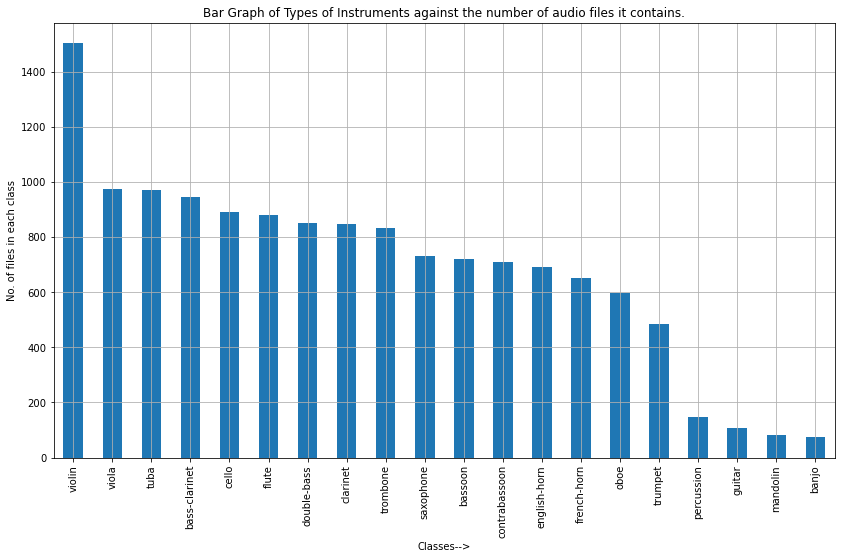

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,8))

ds_classes.value_counts().plot(kind='bar')
plt.grid(True)
plt.xlabel('Classes-->');
plt.ylabel('No. of files in each class');
plt.title('Bar Graph of Types of Instruments against the number of audio files it contains.');

## Plotting Histogram of duration of Audio Files

#### Finding the maximum duration and minimum duration of mp3 files

In [7]:
#maximum duration
print(max(durations))
#minimum duration
print(min(durations))

77.60979591836735
0.0783673469387755


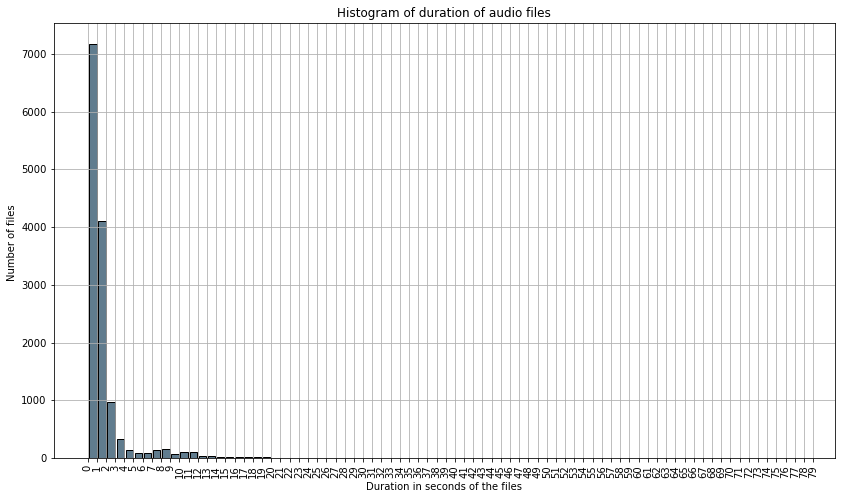

In [16]:
#Importing necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


# Plotting histogram of duration of audio files

ds_duration = pd.Series(durations)   #converting list of durations into a panda series
w = 1
n = math.ceil((ds_duration.max() - ds_duration.min())/w)      #Here we have taken bins which is equal to the difference of                                                          themax duration of
plt.figure(figsize=(14,8))                                    # the maximum duration of an audio files and the minimum duration   
ds_duration.hist(grid=True, bins=n, rwidth=0.8,               #of an audio file
                   color='#607c8e', histtype='bar', ec='black')      #plotting histogram
plt.xticks(np.arange(0,80,1), rotation=90);
plt.xlabel('Duration in seconds of the files')
plt.ylabel('Number of files ')
plt.title('Histogram of duration of audio files');




#### Since most of the durations are lower than 22 seconds, so we are zooming in and plotting just the bins until 20 seconds 

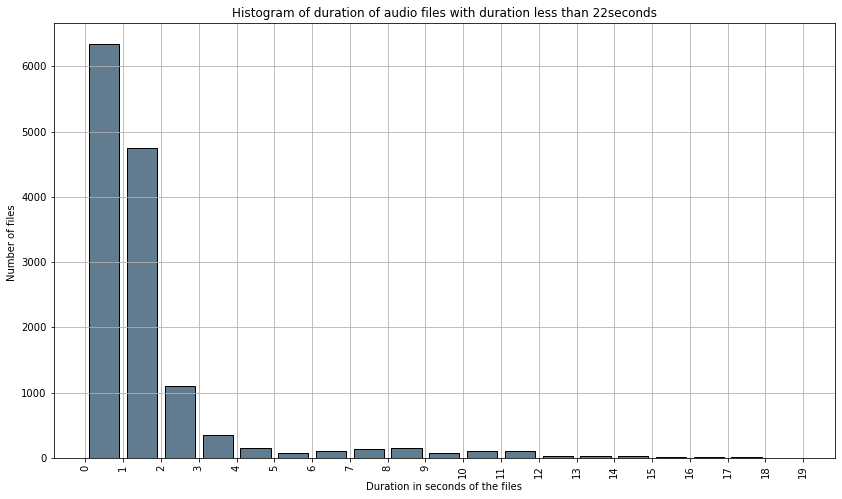

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

#converting the duration into panda series and then plotting the histogram for just 20bins
ds_duration = pd.Series(durations)
w = 1
n = math.ceil((ds_duration.max() - ds_duration.min())/w) 
plt.figure(figsize=(14,8))
ds_duration.hist(grid=True, bins=np.arange(0,20,1), rwidth=0.8,
                   color='#607c8e', histtype='bar', ec='black')        # Here we are taking only 20 bins to get a better look
plt.xticks(np.arange(0,20,1), rotation=90);
plt.xlabel('Duration in seconds of the files')
plt.ylabel('Number of files ')
plt.title('Histogram of duration of audio files with duration less than 22seconds');

## Creating a zip of all the files in our dataset

In [1]:
#importing necessary modules
import os
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):  #walking through all the files
        for file in files:
            ziph.write(os.path.join(root, file))   #writing all the files in zip

if __name__ == '__main__':
    zipf = zipfile.ZipFile('BRP_dataset.zip', 'w', zipfile.ZIP_DEFLATED)
    zipdir('all-samples/', zipf)
    zipf.close()
    
    

In [3]:
#importing necessary modules
import os
import zipfile

myZipFile = zipfile.ZipFile("all-samples_npy_pkl.zip", "w",zipfile.ZIP_DEFLATED ) #naming the zip file
for path, dir_list, file_list in os.walk('all-samples/'):  #walking through all the files
    for filename in file_list:
        if filename.endswith(('.npy')) or filename.endswith(('.pkl')): # filtering the files with only npy and pkl extension
            print(filename)
            myZipFile.write(os.path.join(path, filename), os.path.join(path, filename), zipfile.ZIP_DEFLATED ) # writing all the files in zip
myZipFile.close()

banjo_A3_very-long_forte_normal.npy
banjo_A3_very-long_forte_normal.pkl
banjo_A3_very-long_piano_normal.npy
banjo_A3_very-long_piano_normal.pkl
banjo_A4_very-long_forte_normal.npy
banjo_A4_very-long_forte_normal.pkl
banjo_A4_very-long_piano_normal.npy
banjo_A4_very-long_piano_normal.pkl
banjo_A5_very-long_forte_normal.npy
banjo_A5_very-long_forte_normal.pkl
banjo_A5_very-long_piano_normal.npy
banjo_A5_very-long_piano_normal.pkl
banjo_As3_very-long_forte_normal.npy
banjo_As3_very-long_forte_normal.pkl
banjo_As3_very-long_piano_normal.npy
banjo_As3_very-long_piano_normal.pkl
banjo_As4_very-long_forte_normal.npy
banjo_As4_very-long_forte_normal.pkl
banjo_As4_very-long_piano_normal.npy
banjo_As4_very-long_piano_normal.pkl
banjo_As5_very-long_forte_normal.npy
banjo_As5_very-long_forte_normal.pkl
banjo_As5_very-long_piano_normal.npy
banjo_As5_very-long_piano_normal.pkl
banjo_B3_very-long_forte_normal.npy
banjo_B3_very-long_forte_normal.pkl
banjo_B3_very-long_piano_normal.npy
banjo_B3_very-lo

bass-clarinet_A3_1_fortissimo_normal.pkl
bass-clarinet_A3_1_pianissimo_normal.npy
bass-clarinet_A3_1_pianissimo_normal.pkl
bass-clarinet_A3_1_piano_normal.npy
bass-clarinet_A3_1_piano_normal.pkl
bass-clarinet_A3_phrase_forte_major-trill.npy
bass-clarinet_A3_phrase_forte_major-trill.pkl
bass-clarinet_A3_phrase_mezzo-forte_legato.npy
bass-clarinet_A3_phrase_mezzo-forte_legato.pkl
bass-clarinet_A3_phrase_mezzo-forte_nonlegato.npy
bass-clarinet_A3_phrase_mezzo-forte_nonlegato.pkl
bass-clarinet_A3_phrase_mezzo-forte_staccatissimo.npy
bass-clarinet_A3_phrase_mezzo-forte_staccatissimo.pkl
bass-clarinet_A3_phrase_mezzo-forte_tongued-slur.npy
bass-clarinet_A3_phrase_mezzo-forte_tongued-slur.pkl
bass-clarinet_A3_very-long_mezzo-piano_harmonic.npy
bass-clarinet_A3_very-long_mezzo-piano_harmonic.pkl
bass-clarinet_A4_025_forte_normal.npy
bass-clarinet_A4_025_forte_normal.pkl
bass-clarinet_A4_025_fortissimo_normal.npy
bass-clarinet_A4_025_fortissimo_normal.pkl
bass-clarinet_A4_025_mezzo-forte_normal

bass-clarinet_As5_15_forte_normal.pkl
bass-clarinet_As5_15_fortissimo_normal.npy
bass-clarinet_As5_15_fortissimo_normal.pkl
bass-clarinet_As5_15_mezzo-forte_normal.npy
bass-clarinet_As5_15_mezzo-forte_normal.pkl
bass-clarinet_As5_15_piano_normal.npy
bass-clarinet_As5_15_piano_normal.pkl
bass-clarinet_As5_1_forte_normal.npy
bass-clarinet_As5_1_forte_normal.pkl
bass-clarinet_As5_1_fortissimo_normal.npy
bass-clarinet_As5_1_fortissimo_normal.pkl
bass-clarinet_As5_1_mezzo-forte_normal.npy
bass-clarinet_As5_1_mezzo-forte_normal.pkl
bass-clarinet_As5_1_piano_normal.npy
bass-clarinet_As5_1_piano_normal.pkl
bass-clarinet_B2_025_forte_normal.npy
bass-clarinet_B2_025_forte_normal.pkl
bass-clarinet_B2_025_fortissimo_normal.npy
bass-clarinet_B2_025_fortissimo_normal.pkl
bass-clarinet_B2_025_mezzo-forte_normal.npy
bass-clarinet_B2_025_mezzo-forte_normal.pkl
bass-clarinet_B2_025_mezzo-forte_staccato.npy
bass-clarinet_B2_025_mezzo-forte_staccato.pkl
bass-clarinet_B2_025_pianissimo_normal.npy
bass-clar

bass-clarinet_C4_025_pianissimo_normal.pkl
bass-clarinet_C4_025_piano_normal.npy
bass-clarinet_C4_025_piano_normal.pkl
bass-clarinet_C4_05_forte_normal.npy
bass-clarinet_C4_05_forte_normal.pkl
bass-clarinet_C4_05_fortissimo_normal.npy
bass-clarinet_C4_05_fortissimo_normal.pkl
bass-clarinet_C4_05_mezzo-forte_normal.npy
bass-clarinet_C4_05_mezzo-forte_normal.pkl
bass-clarinet_C4_05_pianissimo_normal.npy
bass-clarinet_C4_05_pianissimo_normal.pkl
bass-clarinet_C4_05_piano_normal.npy
bass-clarinet_C4_05_piano_normal.pkl
bass-clarinet_C4_15_forte_normal.npy
bass-clarinet_C4_15_forte_normal.pkl
bass-clarinet_C4_15_fortissimo_normal.npy
bass-clarinet_C4_15_fortissimo_normal.pkl
bass-clarinet_C4_15_mezzo-forte_normal.npy
bass-clarinet_C4_15_mezzo-forte_normal.pkl
bass-clarinet_C4_15_pianissimo_normal.npy
bass-clarinet_C4_15_pianissimo_normal.pkl
bass-clarinet_C4_15_piano_normal.npy
bass-clarinet_C4_15_piano_normal.pkl
bass-clarinet_C4_1_forte_normal.npy
bass-clarinet_C4_1_forte_normal.pkl
bass-

bass-clarinet_Cs5_15_fortissimo_normal.pkl
bass-clarinet_Cs5_15_mezzo-forte_normal.npy
bass-clarinet_Cs5_15_mezzo-forte_normal.pkl
bass-clarinet_Cs5_15_pianissimo_normal.npy
bass-clarinet_Cs5_15_pianissimo_normal.pkl
bass-clarinet_Cs5_15_piano_normal.npy
bass-clarinet_Cs5_15_piano_normal.pkl
bass-clarinet_Cs5_1_forte_normal.npy
bass-clarinet_Cs5_1_forte_normal.pkl
bass-clarinet_Cs5_1_fortissimo_normal.npy
bass-clarinet_Cs5_1_fortissimo_normal.pkl
bass-clarinet_Cs5_1_mezzo-forte_normal.npy
bass-clarinet_Cs5_1_mezzo-forte_normal.pkl
bass-clarinet_Cs5_1_pianissimo_normal.npy
bass-clarinet_Cs5_1_pianissimo_normal.pkl
bass-clarinet_Cs5_1_piano_normal.npy
bass-clarinet_Cs5_1_piano_normal.pkl
bass-clarinet_D2_025_forte_normal.npy
bass-clarinet_D2_025_forte_normal.pkl
bass-clarinet_D2_025_fortissimo_normal.npy
bass-clarinet_D2_025_fortissimo_normal.pkl
bass-clarinet_D2_025_pianissimo_normal.npy
bass-clarinet_D2_025_pianissimo_normal.pkl
bass-clarinet_D2_025_piano_normal.npy
bass-clarinet_D2_02

bass-clarinet_Ds2_15_fortissimo_normal.npy
bass-clarinet_Ds2_15_fortissimo_normal.pkl
bass-clarinet_Ds2_15_mezzo-forte_normal.npy
bass-clarinet_Ds2_15_mezzo-forte_normal.pkl
bass-clarinet_Ds2_15_pianissimo_normal.npy
bass-clarinet_Ds2_15_pianissimo_normal.pkl
bass-clarinet_Ds2_15_piano_normal.npy
bass-clarinet_Ds2_15_piano_normal.pkl
bass-clarinet_Ds2_1_forte_normal.npy
bass-clarinet_Ds2_1_forte_normal.pkl
bass-clarinet_Ds2_1_fortissimo_normal.npy
bass-clarinet_Ds2_1_fortissimo_normal.pkl
bass-clarinet_Ds2_1_mezzo-forte_normal.npy
bass-clarinet_Ds2_1_mezzo-forte_normal.pkl
bass-clarinet_Ds2_1_pianissimo_normal.npy
bass-clarinet_Ds2_1_pianissimo_normal.pkl
bass-clarinet_Ds2_1_piano_normal.npy
bass-clarinet_Ds2_1_piano_normal.pkl
bass-clarinet_Ds2_phrase_mezzo-forte_staccato.npy
bass-clarinet_Ds2_phrase_mezzo-forte_staccato.pkl
bass-clarinet_Ds3_025_forte_normal.npy
bass-clarinet_Ds3_025_forte_normal.pkl
bass-clarinet_Ds3_025_fortissimo_normal.npy
bass-clarinet_Ds3_025_fortissimo_normal.

bass-clarinet_E3_15_forte_normal.pkl
bass-clarinet_E3_15_fortissimo_normal.npy
bass-clarinet_E3_15_fortissimo_normal.pkl
bass-clarinet_E3_15_mezzo-forte_normal.npy
bass-clarinet_E3_15_mezzo-forte_normal.pkl
bass-clarinet_E3_15_pianissimo_normal.npy
bass-clarinet_E3_15_pianissimo_normal.pkl
bass-clarinet_E3_15_piano_normal.npy
bass-clarinet_E3_15_piano_normal.pkl
bass-clarinet_E3_1_forte_normal.npy
bass-clarinet_E3_1_forte_normal.pkl
bass-clarinet_E3_1_fortissimo_normal.npy
bass-clarinet_E3_1_fortissimo_normal.pkl
bass-clarinet_E3_1_mezzo-forte_normal.npy
bass-clarinet_E3_1_mezzo-forte_normal.pkl
bass-clarinet_E3_1_pianissimo_normal.npy
bass-clarinet_E3_1_pianissimo_normal.pkl
bass-clarinet_E3_1_piano_normal.npy
bass-clarinet_E3_1_piano_normal.pkl
bass-clarinet_E3_phrase_mezzo-forte_legato.npy
bass-clarinet_E3_phrase_mezzo-forte_legato.pkl
bass-clarinet_E3_phrase_mezzo-forte_nonlegato.npy
bass-clarinet_E3_phrase_mezzo-forte_nonlegato.pkl
bass-clarinet_E3_phrase_mezzo-forte_staccatissimo

bass-clarinet_F4_15_forte_normal.pkl
bass-clarinet_F4_15_fortissimo_normal.npy
bass-clarinet_F4_15_fortissimo_normal.pkl
bass-clarinet_F4_15_mezzo-forte_normal.npy
bass-clarinet_F4_15_mezzo-forte_normal.pkl
bass-clarinet_F4_15_pianissimo_normal.npy
bass-clarinet_F4_15_pianissimo_normal.pkl
bass-clarinet_F4_15_piano_normal.npy
bass-clarinet_F4_15_piano_normal.pkl
bass-clarinet_F4_1_forte_normal.npy
bass-clarinet_F4_1_forte_normal.pkl
bass-clarinet_F4_1_fortissimo_normal.npy
bass-clarinet_F4_1_fortissimo_normal.pkl
bass-clarinet_F4_1_mezzo-forte_normal.npy
bass-clarinet_F4_1_mezzo-forte_normal.pkl
bass-clarinet_F4_1_pianissimo_normal.npy
bass-clarinet_F4_1_pianissimo_normal.pkl
bass-clarinet_F4_1_piano_normal.npy
bass-clarinet_F4_1_piano_normal.pkl
bass-clarinet_F4_phrase_forte_major-trill.npy
bass-clarinet_F4_phrase_forte_major-trill.pkl
bass-clarinet_F4_very-long_mezzo-piano_harmonic.npy
bass-clarinet_F4_very-long_mezzo-piano_harmonic.pkl
bass-clarinet_F5_025_forte_normal.npy
bass-clar

bass-clarinet_Fs5_15_pianissimo_normal.npy
bass-clarinet_Fs5_15_pianissimo_normal.pkl
bass-clarinet_Fs5_15_piano_normal.npy
bass-clarinet_Fs5_15_piano_normal.pkl
bass-clarinet_Fs5_1_forte_normal.npy
bass-clarinet_Fs5_1_forte_normal.pkl
bass-clarinet_Fs5_1_fortissimo_normal.npy
bass-clarinet_Fs5_1_fortissimo_normal.pkl
bass-clarinet_Fs5_1_mezzo-forte_normal.npy
bass-clarinet_Fs5_1_mezzo-forte_normal.pkl
bass-clarinet_Fs5_1_pianissimo_normal.npy
bass-clarinet_Fs5_1_pianissimo_normal.pkl
bass-clarinet_Fs5_1_piano_normal.npy
bass-clarinet_Fs5_1_piano_normal.pkl
bass-clarinet_G2_025_forte_normal.npy
bass-clarinet_G2_025_forte_normal.pkl
bass-clarinet_G2_025_mezzo-forte_normal.npy
bass-clarinet_G2_025_mezzo-forte_normal.pkl
bass-clarinet_G2_025_pianissimo_normal.npy
bass-clarinet_G2_025_pianissimo_normal.pkl
bass-clarinet_G2_025_piano_normal.npy
bass-clarinet_G2_025_piano_normal.pkl
bass-clarinet_G2_05_forte_normal.npy
bass-clarinet_G2_05_forte_normal.pkl
bass-clarinet_G2_05_mezzo-forte_norm

bass-clarinet_Gs2_phrase_cresc-decresc_normal.pkl
bass-clarinet_Gs2_phrase_forte_major-trill.npy
bass-clarinet_Gs2_phrase_forte_major-trill.pkl
bass-clarinet_Gs2_very-long_forte_normal.npy
bass-clarinet_Gs2_very-long_forte_normal.pkl
bass-clarinet_Gs2_very-long_piano_normal.npy
bass-clarinet_Gs2_very-long_piano_normal.pkl
bass-clarinet_Gs3_025_forte_normal.npy
bass-clarinet_Gs3_025_forte_normal.pkl
bass-clarinet_Gs3_025_fortissimo_normal.npy
bass-clarinet_Gs3_025_fortissimo_normal.pkl
bass-clarinet_Gs3_025_mezzo-forte_staccato.npy
bass-clarinet_Gs3_025_mezzo-forte_staccato.pkl
bass-clarinet_Gs3_025_pianissimo_normal.npy
bass-clarinet_Gs3_025_pianissimo_normal.pkl
bass-clarinet_Gs3_025_piano_normal.npy
bass-clarinet_Gs3_025_piano_normal.pkl
bass-clarinet_Gs3_05_forte_normal.npy
bass-clarinet_Gs3_05_forte_normal.pkl
bass-clarinet_Gs3_05_fortissimo_normal.npy
bass-clarinet_Gs3_05_fortissimo_normal.pkl
bass-clarinet_Gs3_05_pianissimo_normal.npy
bass-clarinet_Gs3_05_pianissimo_normal.pkl
ba

bassoon_As1_15_fortissimo_normal.npy
bassoon_As1_15_fortissimo_normal.pkl
bassoon_As1_15_mezzo-piano_normal.npy
bassoon_As1_15_mezzo-piano_normal.pkl
bassoon_As1_15_piano_normal.npy
bassoon_As1_15_piano_normal.pkl
bassoon_As1_1_forte_normal.npy
bassoon_As1_1_forte_normal.pkl
bassoon_As1_1_fortissimo_normal.npy
bassoon_As1_1_fortissimo_normal.pkl
bassoon_As1_1_mezzo-forte_normal.npy
bassoon_As1_1_mezzo-forte_normal.pkl
bassoon_As1_1_mezzo-piano_normal.npy
bassoon_As1_1_mezzo-piano_normal.pkl
bassoon_As1_1_piano_normal.npy
bassoon_As1_1_piano_normal.pkl
bassoon_As1_phrase_forte_fluttertonguing.npy
bassoon_As1_phrase_forte_fluttertonguing.pkl
bassoon_As1_phrase_mezzo-forte_legato.npy
bassoon_As1_phrase_mezzo-forte_legato.pkl
bassoon_As1_phrase_mezzo-forte_staccatissimo.npy
bassoon_As1_phrase_mezzo-forte_staccatissimo.pkl
bassoon_As1_phrase_mezzo-forte_staccato.npy
bassoon_As1_phrase_mezzo-forte_staccato.pkl
bassoon_As1_phrase_mezzo-forte_tenuto.npy
bassoon_As1_phrase_mezzo-forte_tenuto.pk

bassoon_B3_long_forte_tremolo.pkl
bassoon_B4_025_forte_normal.npy
bassoon_B4_025_forte_normal.pkl
bassoon_B4_025_fortissimo_normal.npy
bassoon_B4_025_fortissimo_normal.pkl
bassoon_B4_025_mezzo-piano_normal.npy
bassoon_B4_025_mezzo-piano_normal.pkl
bassoon_B4_025_piano_normal.npy
bassoon_B4_025_piano_normal.pkl
bassoon_B4_05_forte_normal.npy
bassoon_B4_05_forte_normal.pkl
bassoon_B4_05_fortissimo_normal.npy
bassoon_B4_05_fortissimo_normal.pkl
bassoon_B4_05_mezzo-piano_normal.npy
bassoon_B4_05_mezzo-piano_normal.pkl
bassoon_B4_05_piano_normal.npy
bassoon_B4_05_piano_normal.pkl
bassoon_B4_15_forte_normal.npy
bassoon_B4_15_forte_normal.pkl
bassoon_B4_15_piano_normal.npy
bassoon_B4_15_piano_normal.pkl
bassoon_B4_1_forte_normal.npy
bassoon_B4_1_forte_normal.pkl
bassoon_B4_1_fortissimo_normal.npy
bassoon_B4_1_fortissimo_normal.pkl
bassoon_B4_1_mezzo-piano_normal.npy
bassoon_B4_1_mezzo-piano_normal.pkl
bassoon_B4_1_piano_normal.npy
bassoon_B4_1_piano_normal.pkl
bassoon_C2_025_forte_normal.npy


bassoon_Cs3_very-long_cresc-decresc_normal.npy
bassoon_Cs3_very-long_cresc-decresc_normal.pkl
bassoon_Cs4_025_forte_normal.npy
bassoon_Cs4_025_forte_normal.pkl
bassoon_Cs4_025_fortissimo_normal.npy
bassoon_Cs4_025_fortissimo_normal.pkl
bassoon_Cs4_025_mezzo-piano_normal.npy
bassoon_Cs4_025_mezzo-piano_normal.pkl
bassoon_Cs4_025_piano_normal.npy
bassoon_Cs4_025_piano_normal.pkl
bassoon_Cs4_05_forte_normal.npy
bassoon_Cs4_05_forte_normal.pkl
bassoon_Cs4_05_fortissimo_normal.npy
bassoon_Cs4_05_fortissimo_normal.pkl
bassoon_Cs4_05_mezzo-forte_normal.npy
bassoon_Cs4_05_mezzo-forte_normal.pkl
bassoon_Cs4_05_mezzo-piano_normal.npy
bassoon_Cs4_05_mezzo-piano_normal.pkl
bassoon_Cs4_05_piano_normal.npy
bassoon_Cs4_05_piano_normal.pkl
bassoon_Cs4_15_forte_normal.npy
bassoon_Cs4_15_forte_normal.pkl
bassoon_Cs4_15_piano_normal.npy
bassoon_Cs4_15_piano_normal.pkl
bassoon_Cs4_1_forte_normal.npy
bassoon_Cs4_1_forte_normal.pkl
bassoon_Cs4_1_mezzo-forte_normal.npy
bassoon_Cs4_1_mezzo-forte_normal.pkl
ba

bassoon_Ds3_15_fortissimo_normal.pkl
bassoon_Ds3_15_mezzo-piano_normal.npy
bassoon_Ds3_15_mezzo-piano_normal.pkl
bassoon_Ds3_15_piano_normal.npy
bassoon_Ds3_15_piano_normal.pkl
bassoon_Ds3_1_forte_normal.npy
bassoon_Ds3_1_forte_normal.pkl
bassoon_Ds3_1_fortissimo_normal.npy
bassoon_Ds3_1_fortissimo_normal.pkl
bassoon_Ds3_1_mezzo-piano_normal.npy
bassoon_Ds3_1_mezzo-piano_normal.pkl
bassoon_Ds3_1_piano_normal.npy
bassoon_Ds3_1_piano_normal.pkl
bassoon_Ds4_025_forte_normal.npy
bassoon_Ds4_025_forte_normal.pkl
bassoon_Ds4_025_fortissimo_normal.npy
bassoon_Ds4_025_fortissimo_normal.pkl
bassoon_Ds4_025_mezzo-piano_normal.npy
bassoon_Ds4_025_mezzo-piano_normal.pkl
bassoon_Ds4_025_piano_normal.npy
bassoon_Ds4_025_piano_normal.pkl
bassoon_Ds4_05_forte_normal.npy
bassoon_Ds4_05_forte_normal.pkl
bassoon_Ds4_05_fortissimo_normal.npy
bassoon_Ds4_05_fortissimo_normal.pkl
bassoon_Ds4_05_mezzo-forte_normal.npy
bassoon_Ds4_05_mezzo-forte_normal.pkl
bassoon_Ds4_05_mezzo-piano_normal.npy
bassoon_Ds4_05_

bassoon_F3_05_forte_normal.npy
bassoon_F3_05_forte_normal.pkl
bassoon_F3_05_fortissimo_normal.npy
bassoon_F3_05_fortissimo_normal.pkl
bassoon_F3_05_mezzo-piano_normal.npy
bassoon_F3_05_mezzo-piano_normal.pkl
bassoon_F3_05_piano_normal.npy
bassoon_F3_05_piano_normal.pkl
bassoon_F3_15_forte_normal.npy
bassoon_F3_15_forte_normal.pkl
bassoon_F3_15_fortissimo_normal.npy
bassoon_F3_15_fortissimo_normal.pkl
bassoon_F3_15_mezzo-piano_normal.npy
bassoon_F3_15_mezzo-piano_normal.pkl
bassoon_F3_15_piano_normal.npy
bassoon_F3_15_piano_normal.pkl
bassoon_F3_1_forte_normal.npy
bassoon_F3_1_forte_normal.pkl
bassoon_F3_1_fortissimo_normal.npy
bassoon_F3_1_fortissimo_normal.pkl
bassoon_F3_1_mezzo-piano_normal.npy
bassoon_F3_1_mezzo-piano_normal.pkl
bassoon_F3_1_piano_normal.npy
bassoon_F3_1_piano_normal.pkl
bassoon_F3_long_forte_tremolo.npy
bassoon_F3_long_forte_tremolo.pkl
bassoon_F3_phrase_forte_fluttertonguing.npy
bassoon_F3_phrase_forte_fluttertonguing.pkl
bassoon_F3_phrase_forte_staccatissimo.npy


bassoon_G3_phrase_mezzo-forte_staccatissimo.pkl
bassoon_G3_phrase_mezzo-forte_staccato.npy
bassoon_G3_phrase_mezzo-forte_staccato.pkl
bassoon_G3_phrase_mezzo-forte_tenuto.npy
bassoon_G3_phrase_mezzo-forte_tenuto.pkl
bassoon_G3_phrase_mezzo-forte_tongued-slur.npy
bassoon_G3_phrase_mezzo-forte_tongued-slur.pkl
bassoon_G3_very-long_cresc-decresc_normal.npy
bassoon_G3_very-long_cresc-decresc_normal.pkl
bassoon_G4_025_forte_normal.npy
bassoon_G4_025_forte_normal.pkl
bassoon_G4_025_fortissimo_normal.npy
bassoon_G4_025_fortissimo_normal.pkl
bassoon_G4_025_mezzo-piano_normal.npy
bassoon_G4_025_mezzo-piano_normal.pkl
bassoon_G4_025_piano_normal.npy
bassoon_G4_025_piano_normal.pkl
bassoon_G4_05_forte_normal.npy
bassoon_G4_05_forte_normal.pkl
bassoon_G4_05_fortissimo_normal.npy
bassoon_G4_05_fortissimo_normal.pkl
bassoon_G4_05_mezzo-forte_normal.npy
bassoon_G4_05_mezzo-forte_normal.pkl
bassoon_G4_05_mezzo-piano_normal.npy
bassoon_G4_05_mezzo-piano_normal.pkl
bassoon_G4_05_piano_normal.npy
bassoon

cello_A4_15_forte_arco-normal.pkl
cello_A4_15_mezzo-piano_arco-normal.npy
cello_A4_15_mezzo-piano_arco-normal.pkl
cello_A4_1_forte_arco-normal.npy
cello_A4_1_forte_arco-normal.pkl
cello_A4_1_fortissimo_arco-normal.npy
cello_A4_1_fortissimo_arco-normal.pkl
cello_A4_1_mezzo-forte_arco-harmonic.npy
cello_A4_1_mezzo-forte_arco-harmonic.pkl
cello_A4_1_mezzo-piano_arco-minor-trill.npy
cello_A4_1_mezzo-piano_arco-minor-trill.pkl
cello_A4_1_mezzo-piano_arco-normal.npy
cello_A4_1_mezzo-piano_arco-normal.pkl
cello_A4_1_mezzo-piano_molto-vibrato.npy
cello_A4_1_mezzo-piano_molto-vibrato.pkl
cello_A4_1_pianissimo_arco-normal.npy
cello_A4_1_pianissimo_arco-normal.pkl
cello_A4_phrase_mezzo-forte_arco-detache.npy
cello_A4_phrase_mezzo-forte_arco-detache.pkl
cello_A4_phrase_mezzo-forte_arco-legato.npy
cello_A4_phrase_mezzo-forte_arco-legato.pkl
cello_A4_phrase_mezzo-forte_arco-spiccato.npy
cello_A4_phrase_mezzo-forte_arco-spiccato.pkl
cello_A4_phrase_mezzo-forte_arco-staccato.npy
cello_A4_phrase_mezzo-

cello_B2_05_pianissimo_arco-normal.npy
cello_B2_05_pianissimo_arco-normal.pkl
cello_B2_15_forte_arco-normal.npy
cello_B2_15_forte_arco-normal.pkl
cello_B2_15_fortissimo_arco-normal.npy
cello_B2_15_fortissimo_arco-normal.pkl
cello_B2_15_pianissimo_arco-normal.npy
cello_B2_15_pianissimo_arco-normal.pkl
cello_B2_15_piano_arco-normal.npy
cello_B2_15_piano_arco-normal.pkl
cello_B2_1_forte_arco-normal.npy
cello_B2_1_forte_arco-normal.pkl
cello_B2_1_fortissimo_arco-normal.npy
cello_B2_1_fortissimo_arco-normal.pkl
cello_B2_1_mezzo-piano_arco-major-trill.npy
cello_B2_1_mezzo-piano_arco-major-trill.pkl
cello_B2_1_pianissimo_arco-normal.npy
cello_B2_1_pianissimo_arco-normal.pkl
cello_B3_025_forte_arco-normal.npy
cello_B3_025_forte_arco-normal.pkl
cello_B3_025_fortissimo_arco-normal.npy
cello_B3_025_fortissimo_arco-normal.pkl
cello_B3_025_pianissimo_arco-normal.npy
cello_B3_025_pianissimo_arco-normal.pkl
cello_B3_05_forte_arco-normal.npy
cello_B3_05_forte_arco-normal.pkl
cello_B3_05_fortissimo_arc

cello_C3_phrase_cresc-decresc_arco-normal.pkl
cello_C3_phrase_fortissimo_arco-tremolo.npy
cello_C3_phrase_fortissimo_arco-tremolo.pkl
cello_C3_phrase_mezzo-forte_arco-detache.npy
cello_C3_phrase_mezzo-forte_arco-detache.pkl
cello_C3_phrase_mezzo-forte_arco-legato.npy
cello_C3_phrase_mezzo-forte_arco-legato.pkl
cello_C3_phrase_mezzo-forte_arco-spiccato.npy
cello_C3_phrase_mezzo-forte_arco-spiccato.pkl
cello_C3_phrase_mezzo-forte_arco-staccato.npy
cello_C3_phrase_mezzo-forte_arco-staccato.pkl
cello_C4_025_forte_arco-normal.npy
cello_C4_025_forte_arco-normal.pkl
cello_C4_025_fortissimo_arco-normal.npy
cello_C4_025_fortissimo_arco-normal.pkl
cello_C4_025_mezzo-piano_arco-normal.npy
cello_C4_025_mezzo-piano_arco-normal.pkl
cello_C4_025_pianissimo_arco-normal.npy
cello_C4_025_pianissimo_arco-normal.pkl
cello_C4_05_fortissimo_arco-normal.npy
cello_C4_05_fortissimo_arco-normal.pkl
cello_C4_05_mezzo-piano_arco-normal.npy
cello_C4_05_mezzo-piano_arco-normal.pkl
cello_C4_05_pianissimo_arco-normal

cello_Cs5_05_fortissimo_arco-normal.npy
cello_Cs5_05_fortissimo_arco-normal.pkl
cello_Cs5_05_mezzo-piano_arco-normal.npy
cello_Cs5_05_mezzo-piano_arco-normal.pkl
cello_Cs5_05_pianissimo_arco-normal.npy
cello_Cs5_05_pianissimo_arco-normal.pkl
cello_Cs5_15_forte_arco-normal.npy
cello_Cs5_15_forte_arco-normal.pkl
cello_Cs5_15_fortissimo_arco-normal.npy
cello_Cs5_15_fortissimo_arco-normal.pkl
cello_Cs5_15_mezzo-piano_arco-normal.npy
cello_Cs5_15_mezzo-piano_arco-normal.pkl
cello_Cs5_1_forte_arco-normal.npy
cello_Cs5_1_forte_arco-normal.pkl
cello_Cs5_1_fortissimo_arco-normal.npy
cello_Cs5_1_fortissimo_arco-normal.pkl
cello_Cs5_1_mezzo-piano_arco-normal.npy
cello_Cs5_1_mezzo-piano_arco-normal.pkl
cello_Cs5_1_pianissimo_arco-normal.npy
cello_Cs5_1_pianissimo_arco-normal.pkl
cello_Cs6_1_mezzo-forte_arco-harmonic.npy
cello_Cs6_1_mezzo-forte_arco-harmonic.pkl
cello_D2_025_forte_arco-normal.npy
cello_D2_025_forte_arco-normal.pkl
cello_D2_025_fortissimo_arco-normal.npy
cello_D2_025_fortissimo_arco

cello_Ds3_15_fortissimo_arco-normal.pkl
cello_Ds3_15_pianissimo_arco-normal.npy
cello_Ds3_15_pianissimo_arco-normal.pkl
cello_Ds3_15_piano_arco-normal.npy
cello_Ds3_15_piano_arco-normal.pkl
cello_Ds3_1_forte_arco-normal.npy
cello_Ds3_1_forte_arco-normal.pkl
cello_Ds3_1_fortissimo_arco-normal.npy
cello_Ds3_1_fortissimo_arco-normal.pkl
cello_Ds3_1_mezzo-piano_arco-major-trill.npy
cello_Ds3_1_mezzo-piano_arco-major-trill.pkl
cello_Ds3_1_mezzo-piano_non-vibrato.npy
cello_Ds3_1_mezzo-piano_non-vibrato.pkl
cello_Ds3_1_pianissimo_arco-normal.npy
cello_Ds3_1_pianissimo_arco-normal.pkl
cello_Ds3_1_piano_arco-normal.npy
cello_Ds3_1_piano_arco-normal.pkl
cello_Ds4_025_forte_arco-normal.npy
cello_Ds4_025_forte_arco-normal.pkl
cello_Ds4_025_fortissimo_arco-normal.npy
cello_Ds4_025_fortissimo_arco-normal.pkl
cello_Ds4_025_mezzo-piano_arco-normal.npy
cello_Ds4_025_mezzo-piano_arco-normal.pkl
cello_Ds4_025_pianissimo_arco-normal.npy
cello_Ds4_025_pianissimo_arco-normal.pkl
cello_Ds4_05_forte_arco-norm

cello_E5_1_mezzo-piano_arco-major-trill.npy
cello_E5_1_mezzo-piano_arco-major-trill.pkl
cello_E5_1_mezzo-piano_arco-normal.npy
cello_E5_1_mezzo-piano_arco-normal.pkl
cello_E5_1_pianissimo_arco-normal.npy
cello_E5_1_pianissimo_arco-normal.pkl
cello_E6_1_mezzo-forte_arco-harmonic.npy
cello_E6_1_mezzo-forte_arco-harmonic.pkl
cello_F2_025_forte_arco-normal.npy
cello_F2_025_forte_arco-normal.pkl
cello_F2_025_fortissimo_arco-normal.npy
cello_F2_025_fortissimo_arco-normal.pkl
cello_F2_025_pianissimo_arco-normal.npy
cello_F2_025_pianissimo_arco-normal.pkl
cello_F2_025_piano_arco-normal.npy
cello_F2_025_piano_arco-normal.pkl
cello_F2_05_fortissimo_arco-normal.npy
cello_F2_05_fortissimo_arco-normal.pkl
cello_F2_05_pianissimo_arco-normal.npy
cello_F2_05_pianissimo_arco-normal.pkl
cello_F2_05_piano_arco-normal.npy
cello_F2_05_piano_arco-normal.pkl
cello_F2_15_forte_arco-normal.npy
cello_F2_15_forte_arco-normal.pkl
cello_F2_15_fortissimo_arco-normal.npy
cello_F2_15_fortissimo_arco-normal.pkl
cello_

cello_Fs3_15_forte_arco-normal.pkl
cello_Fs3_15_fortissimo_arco-normal.npy
cello_Fs3_15_fortissimo_arco-normal.pkl
cello_Fs3_15_pianissimo_arco-normal.npy
cello_Fs3_15_pianissimo_arco-normal.pkl
cello_Fs3_15_piano_arco-normal.npy
cello_Fs3_15_piano_arco-normal.pkl
cello_Fs3_1_forte_arco-normal.npy
cello_Fs3_1_forte_arco-normal.pkl
cello_Fs3_1_fortissimo_arco-normal.npy
cello_Fs3_1_fortissimo_arco-normal.pkl
cello_Fs3_1_mezzo-piano_arco-normal.npy
cello_Fs3_1_mezzo-piano_arco-normal.pkl
cello_Fs3_1_mezzo-piano_non-vibrato.npy
cello_Fs3_1_mezzo-piano_non-vibrato.pkl
cello_Fs3_1_pianissimo_arco-normal.npy
cello_Fs3_1_pianissimo_arco-normal.pkl
cello_Fs3_1_piano_arco-normal.npy
cello_Fs3_1_piano_arco-normal.pkl
cello_Fs4_025_forte_arco-normal.npy
cello_Fs4_025_forte_arco-normal.pkl
cello_Fs4_025_fortissimo_arco-normal.npy
cello_Fs4_025_fortissimo_arco-normal.pkl
cello_Fs4_025_mezzo-piano_arco-normal.npy
cello_Fs4_025_mezzo-piano_arco-normal.pkl
cello_Fs4_025_pianissimo_arco-normal.npy
cell

cello_G5_15_forte_arco-normal.pkl
cello_G5_15_fortissimo_arco-normal.npy
cello_G5_15_fortissimo_arco-normal.pkl
cello_G5_15_mezzo-piano_arco-normal.npy
cello_G5_15_mezzo-piano_arco-normal.pkl
cello_G5_15_pianissimo_arco-normal.npy
cello_G5_15_pianissimo_arco-normal.pkl
cello_G5_1_forte_arco-normal.npy
cello_G5_1_forte_arco-normal.pkl
cello_G5_1_fortissimo_arco-normal.npy
cello_G5_1_fortissimo_arco-normal.pkl
cello_G5_1_mezzo-piano_arco-normal.npy
cello_G5_1_mezzo-piano_arco-normal.pkl
cello_G5_1_pianissimo_arco-normal.npy
cello_G5_1_pianissimo_arco-normal.pkl
cello_Gs2_025_forte_arco-normal.npy
cello_Gs2_025_forte_arco-normal.pkl
cello_Gs2_025_fortissimo_arco-normal.npy
cello_Gs2_025_fortissimo_arco-normal.pkl
cello_Gs2_025_mezzo-piano_arco-normal.npy
cello_Gs2_025_mezzo-piano_arco-normal.pkl
cello_Gs2_025_pianissimo_arco-normal.npy
cello_Gs2_025_pianissimo_arco-normal.pkl
cello_Gs2_05_forte_arco-normal.npy
cello_Gs2_05_forte_arco-normal.pkl
cello_Gs2_05_fortissimo_arco-normal.npy
cell

clarinet_A4_15_piano_normal.pkl
clarinet_A4_1_forte_normal.npy
clarinet_A4_1_forte_normal.pkl
clarinet_A4_1_fortissimo_normal.npy
clarinet_A4_1_fortissimo_normal.pkl
clarinet_A4_1_pianissimo_normal.npy
clarinet_A4_1_pianissimo_normal.pkl
clarinet_A4_1_piano_normal.npy
clarinet_A4_1_piano_normal.pkl
clarinet_A4_phrase_mezzo-forte_fluttertonguing.npy
clarinet_A4_phrase_mezzo-forte_fluttertonguing.pkl
clarinet_A4_phrase_mezzo-forte_nonlegato.npy
clarinet_A4_phrase_mezzo-forte_nonlegato.pkl
clarinet_A4_phrase_mezzo-forte_staccatissimo.npy
clarinet_A4_phrase_mezzo-forte_staccatissimo.pkl
clarinet_A4_phrase_mezzo-forte_staccato.npy
clarinet_A4_phrase_mezzo-forte_staccato.pkl
clarinet_A4_phrase_mezzo-forte_tongued-slur.npy
clarinet_A4_phrase_mezzo-forte_tongued-slur.pkl
clarinet_A5_025_forte_normal.npy
clarinet_A5_025_forte_normal.pkl
clarinet_A5_025_fortissimo_normal.npy
clarinet_A5_025_fortissimo_normal.pkl
clarinet_A5_025_pianissimo_normal.npy
clarinet_A5_025_pianissimo_normal.pkl
clarinet

clarinet_B3_15_fortissimo_normal.pkl
clarinet_B3_15_pianissimo_normal.npy
clarinet_B3_15_pianissimo_normal.pkl
clarinet_B3_15_piano_normal.npy
clarinet_B3_15_piano_normal.pkl
clarinet_B3_1_forte_normal.npy
clarinet_B3_1_forte_normal.pkl
clarinet_B3_1_fortissimo_normal.npy
clarinet_B3_1_fortissimo_normal.pkl
clarinet_B3_1_pianissimo_normal.npy
clarinet_B3_1_pianissimo_normal.pkl
clarinet_B3_1_piano_normal.npy
clarinet_B3_1_piano_normal.pkl
clarinet_B3_long_mezzo-forte_major-trill.npy
clarinet_B3_long_mezzo-forte_major-trill.pkl
clarinet_B3_long_mezzo-forte_minor-trill.npy
clarinet_B3_long_mezzo-forte_minor-trill.pkl
clarinet_B3_very-long_cresc-decresc_normal.npy
clarinet_B3_very-long_cresc-decresc_normal.pkl
clarinet_B4_025_forte_normal.npy
clarinet_B4_025_forte_normal.pkl
clarinet_B4_025_fortissimo_normal.npy
clarinet_B4_025_fortissimo_normal.pkl
clarinet_B4_025_pianissimo_normal.npy
clarinet_B4_025_pianissimo_normal.pkl
clarinet_B4_025_piano_normal.npy
clarinet_B4_025_piano_normal.pkl

clarinet_C6_15_piano_normal.pkl
clarinet_C6_1_forte_normal.npy
clarinet_C6_1_forte_normal.pkl
clarinet_C6_1_fortissimo_normal.npy
clarinet_C6_1_fortissimo_normal.pkl
clarinet_C6_1_pianissimo_normal.npy
clarinet_C6_1_pianissimo_normal.pkl
clarinet_C6_1_piano_normal.npy
clarinet_C6_1_piano_normal.pkl
clarinet_C6_phrase_mezzo-forte_staccatissimo.npy
clarinet_C6_phrase_mezzo-forte_staccatissimo.pkl
clarinet_C7_025_forte_normal.npy
clarinet_C7_025_forte_normal.pkl
clarinet_C7_025_fortissimo_normal.npy
clarinet_C7_025_fortissimo_normal.pkl
clarinet_C7_025_pianissimo_normal.npy
clarinet_C7_025_pianissimo_normal.pkl
clarinet_C7_025_piano_normal.npy
clarinet_C7_025_piano_normal.pkl
clarinet_C7_05_forte_normal.npy
clarinet_C7_05_forte_normal.pkl
clarinet_C7_05_fortissimo_normal.npy
clarinet_C7_05_fortissimo_normal.pkl
clarinet_C7_05_pianissimo_normal.npy
clarinet_C7_05_pianissimo_normal.pkl
clarinet_C7_05_piano_normal.npy
clarinet_C7_05_piano_normal.pkl
clarinet_C7_15_forte_normal.npy
clarinet_C

clarinet_D4_phrase_mezzo-forte_staccato.pkl
clarinet_D4_phrase_mezzo-forte_tongued-slur.npy
clarinet_D4_phrase_mezzo-forte_tongued-slur.pkl
clarinet_D4_very-long_cresc-decresc_normal.npy
clarinet_D4_very-long_cresc-decresc_normal.pkl
clarinet_D5_025_forte_normal.npy
clarinet_D5_025_forte_normal.pkl
clarinet_D5_025_fortissimo_normal.npy
clarinet_D5_025_fortissimo_normal.pkl
clarinet_D5_025_pianissimo_normal.npy
clarinet_D5_025_pianissimo_normal.pkl
clarinet_D5_025_piano_normal.npy
clarinet_D5_025_piano_normal.pkl
clarinet_D5_05_forte_normal.npy
clarinet_D5_05_forte_normal.pkl
clarinet_D5_05_fortissimo_normal.npy
clarinet_D5_05_fortissimo_normal.pkl
clarinet_D5_05_pianissimo_normal.npy
clarinet_D5_05_pianissimo_normal.pkl
clarinet_D5_05_piano_normal.npy
clarinet_D5_05_piano_normal.pkl
clarinet_D5_15_forte_normal.npy
clarinet_D5_15_forte_normal.pkl
clarinet_D5_15_fortissimo_normal.npy
clarinet_D5_15_fortissimo_normal.pkl
clarinet_D5_15_pianissimo_normal.npy
clarinet_D5_15_pianissimo_norma

clarinet_E3_15_piano_normal.pkl
clarinet_E3_1_forte_normal.npy
clarinet_E3_1_forte_normal.pkl
clarinet_E3_1_fortissimo_normal.npy
clarinet_E3_1_fortissimo_normal.pkl
clarinet_E3_1_pianissimo_normal.npy
clarinet_E3_1_pianissimo_normal.pkl
clarinet_E3_1_piano_normal.npy
clarinet_E3_1_piano_normal.pkl
clarinet_E3_phrase_mezzo-forte_fluttertonguing.npy
clarinet_E3_phrase_mezzo-forte_fluttertonguing.pkl
clarinet_E4_025_forte_normal.npy
clarinet_E4_025_forte_normal.pkl
clarinet_E4_025_fortissimo_normal.npy
clarinet_E4_025_fortissimo_normal.pkl
clarinet_E4_025_pianissimo_normal.npy
clarinet_E4_025_pianissimo_normal.pkl
clarinet_E4_025_piano_normal.npy
clarinet_E4_025_piano_normal.pkl
clarinet_E4_05_forte_normal.npy
clarinet_E4_05_forte_normal.pkl
clarinet_E4_05_fortissimo_normal.npy
clarinet_E4_05_fortissimo_normal.pkl
clarinet_E4_05_pianissimo_normal.npy
clarinet_E4_05_pianissimo_normal.pkl
clarinet_E4_05_piano_normal.npy
clarinet_E4_05_piano_normal.pkl
clarinet_E4_15_forte_normal.npy
clarin

clarinet_F5_1_forte_normal.pkl
clarinet_F5_1_fortissimo_normal.npy
clarinet_F5_1_fortissimo_normal.pkl
clarinet_F5_1_pianissimo_normal.npy
clarinet_F5_1_pianissimo_normal.pkl
clarinet_F5_1_piano_normal.npy
clarinet_F5_1_piano_normal.pkl
clarinet_F5_long_mezzo-forte_major-trill.npy
clarinet_F5_long_mezzo-forte_major-trill.pkl
clarinet_F5_long_mezzo-forte_minor-trill.npy
clarinet_F5_long_mezzo-forte_minor-trill.pkl
clarinet_F5_phrase_mezzo-forte_fluttertonguing.npy
clarinet_F5_phrase_mezzo-forte_fluttertonguing.pkl
clarinet_F5_phrase_mezzo-forte_nonlegato.npy
clarinet_F5_phrase_mezzo-forte_nonlegato.pkl
clarinet_F5_phrase_mezzo-forte_staccatissimo.npy
clarinet_F5_phrase_mezzo-forte_staccatissimo.pkl
clarinet_F5_phrase_mezzo-forte_staccato.npy
clarinet_F5_phrase_mezzo-forte_staccato.pkl
clarinet_F5_phrase_mezzo-forte_tongued-slur.npy
clarinet_F5_phrase_mezzo-forte_tongued-slur.pkl
clarinet_F5_very-long_cresc-decresc_normal.npy
clarinet_F5_very-long_cresc-decresc_normal.pkl
clarinet_F6_025

clarinet_G3_phrase_mezzo-forte_nonlegato.pkl
clarinet_G3_phrase_mezzo-forte_staccatissimo.npy
clarinet_G3_phrase_mezzo-forte_staccatissimo.pkl
clarinet_G3_phrase_mezzo-forte_staccato.npy
clarinet_G3_phrase_mezzo-forte_staccato.pkl
clarinet_G3_phrase_mezzo-forte_tongued-slur.npy
clarinet_G3_phrase_mezzo-forte_tongued-slur.pkl
clarinet_G4_025_forte_normal.npy
clarinet_G4_025_forte_normal.pkl
clarinet_G4_025_fortissimo_normal.npy
clarinet_G4_025_fortissimo_normal.pkl
clarinet_G4_025_pianissimo_normal.npy
clarinet_G4_025_pianissimo_normal.pkl
clarinet_G4_025_piano_normal.npy
clarinet_G4_025_piano_normal.pkl
clarinet_G4_05_forte_normal.npy
clarinet_G4_05_forte_normal.pkl
clarinet_G4_05_fortissimo_normal.npy
clarinet_G4_05_fortissimo_normal.pkl
clarinet_G4_05_pianissimo_normal.npy
clarinet_G4_05_pianissimo_normal.pkl
clarinet_G4_05_piano_normal.npy
clarinet_G4_05_piano_normal.pkl
clarinet_G4_15_forte_normal.npy
clarinet_G4_15_forte_normal.pkl
clarinet_G4_15_fortissimo_normal.npy
clarinet_G4_

clarinet_Gs6_15_fortissimo_normal.npy
clarinet_Gs6_15_fortissimo_normal.pkl
clarinet_Gs6_15_pianissimo_normal.npy
clarinet_Gs6_15_pianissimo_normal.pkl
clarinet_Gs6_15_piano_normal.npy
clarinet_Gs6_15_piano_normal.pkl
clarinet_Gs6_1_forte_normal.npy
clarinet_Gs6_1_forte_normal.pkl
clarinet_Gs6_1_fortissimo_normal.npy
clarinet_Gs6_1_fortissimo_normal.pkl
clarinet_Gs6_1_pianissimo_normal.npy
clarinet_Gs6_1_pianissimo_normal.pkl
clarinet_Gs6_1_piano_normal.npy
clarinet_Gs6_1_piano_normal.pkl
contrabassoon_A1_025_forte_normal.npy
contrabassoon_A1_025_forte_normal.pkl
contrabassoon_A1_025_fortissimo_normal.npy
contrabassoon_A1_025_fortissimo_normal.pkl
contrabassoon_A1_025_mezzo-forte_normal.npy
contrabassoon_A1_025_mezzo-forte_normal.pkl
contrabassoon_A1_05_forte_normal.npy
contrabassoon_A1_05_forte_normal.pkl
contrabassoon_A1_05_fortissimo_normal.npy
contrabassoon_A1_05_fortissimo_normal.pkl
contrabassoon_A1_05_mezzo-forte_normal.npy
contrabassoon_A1_05_mezzo-forte_normal.pkl
contrabassoo

contrabassoon_As2_15_fortissimo_normal.pkl
contrabassoon_As2_15_mezzo-forte_normal.npy
contrabassoon_As2_15_mezzo-forte_normal.pkl
contrabassoon_As2_15_piano_normal.npy
contrabassoon_As2_15_piano_normal.pkl
contrabassoon_As2_1_forte_fluttertonguing.npy
contrabassoon_As2_1_forte_fluttertonguing.pkl
contrabassoon_As2_1_forte_normal.npy
contrabassoon_As2_1_forte_normal.pkl
contrabassoon_As2_1_fortissimo_normal.npy
contrabassoon_As2_1_fortissimo_normal.pkl
contrabassoon_As2_1_mezzo-forte_normal.npy
contrabassoon_As2_1_mezzo-forte_normal.pkl
contrabassoon_As2_1_piano_normal.npy
contrabassoon_As2_1_piano_normal.pkl
contrabassoon_As2_long_forte_major-trill.npy
contrabassoon_As2_long_forte_major-trill.pkl
contrabassoon_As2_long_forte_minor-trill.npy
contrabassoon_As2_long_forte_minor-trill.pkl
contrabassoon_As2_very-long_cresc-decresc_normal.npy
contrabassoon_As2_very-long_cresc-decresc_normal.pkl
contrabassoon_As3_025_forte_normal.npy
contrabassoon_As3_025_forte_normal.pkl
contrabassoon_As3_0

contrabassoon_C1_1_piano_normal.pkl
contrabassoon_C2_025_forte_normal.npy
contrabassoon_C2_025_forte_normal.pkl
contrabassoon_C2_025_mezzo-forte_normal.npy
contrabassoon_C2_025_mezzo-forte_normal.pkl
contrabassoon_C2_025_piano_normal.npy
contrabassoon_C2_025_piano_normal.pkl
contrabassoon_C2_05_forte_normal.npy
contrabassoon_C2_05_forte_normal.pkl
contrabassoon_C2_05_mezzo-forte_normal.npy
contrabassoon_C2_05_mezzo-forte_normal.pkl
contrabassoon_C2_05_piano_normal.npy
contrabassoon_C2_05_piano_normal.pkl
contrabassoon_C2_15_forte_normal.npy
contrabassoon_C2_15_forte_normal.pkl
contrabassoon_C2_15_fortissimo_normal.npy
contrabassoon_C2_15_fortissimo_normal.pkl
contrabassoon_C2_15_mezzo-forte_normal.npy
contrabassoon_C2_15_mezzo-forte_normal.pkl
contrabassoon_C2_15_piano_normal.npy
contrabassoon_C2_15_piano_normal.pkl
contrabassoon_C2_1_forte_fluttertonguing.npy
contrabassoon_C2_1_forte_fluttertonguing.pkl
contrabassoon_C2_1_forte_normal.npy
contrabassoon_C2_1_forte_normal.pkl
contrabass

contrabassoon_Cs3_15_mezzo-forte_normal.pkl
contrabassoon_Cs3_15_piano_normal.npy
contrabassoon_Cs3_15_piano_normal.pkl
contrabassoon_Cs3_1_forte_normal.npy
contrabassoon_Cs3_1_forte_normal.pkl
contrabassoon_Cs3_1_fortissimo_normal.npy
contrabassoon_Cs3_1_fortissimo_normal.pkl
contrabassoon_Cs3_1_mezzo-forte_normal.npy
contrabassoon_Cs3_1_mezzo-forte_normal.pkl
contrabassoon_Cs3_1_piano_normal.npy
contrabassoon_Cs3_1_piano_normal.pkl
contrabassoon_Cs3_very-long_cresc-decresc_normal.npy
contrabassoon_Cs3_very-long_cresc-decresc_normal.pkl
contrabassoon_Cs4_025_forte_normal.npy
contrabassoon_Cs4_025_forte_normal.pkl
contrabassoon_Cs4_025_fortissimo_normal.npy
contrabassoon_Cs4_025_fortissimo_normal.pkl
contrabassoon_Cs4_025_mezzo-forte_normal.npy
contrabassoon_Cs4_025_mezzo-forte_normal.pkl
contrabassoon_Cs4_025_piano_normal.npy
contrabassoon_Cs4_025_piano_normal.pkl
contrabassoon_Cs4_05_forte_normal.npy
contrabassoon_Cs4_05_forte_normal.pkl
contrabassoon_Cs4_05_fortissimo_normal.npy
con

contrabassoon_Ds1_phrase_mezzo-forte_tenuto.pkl
contrabassoon_Ds1_phrase_mezzo-forte_tongued-slur.npy
contrabassoon_Ds1_phrase_mezzo-forte_tongued-slur.pkl
contrabassoon_Ds2_025_forte_normal.npy
contrabassoon_Ds2_025_forte_normal.pkl
contrabassoon_Ds2_025_fortissimo_normal.npy
contrabassoon_Ds2_025_fortissimo_normal.pkl
contrabassoon_Ds2_025_mezzo-forte_normal.npy
contrabassoon_Ds2_025_mezzo-forte_normal.pkl
contrabassoon_Ds2_025_piano_normal.npy
contrabassoon_Ds2_025_piano_normal.pkl
contrabassoon_Ds2_05_forte_normal.npy
contrabassoon_Ds2_05_forte_normal.pkl
contrabassoon_Ds2_05_fortissimo_normal.npy
contrabassoon_Ds2_05_fortissimo_normal.pkl
contrabassoon_Ds2_05_mezzo-forte_normal.npy
contrabassoon_Ds2_05_mezzo-forte_normal.pkl
contrabassoon_Ds2_05_piano_normal.npy
contrabassoon_Ds2_05_piano_normal.pkl
contrabassoon_Ds2_15_forte_normal.npy
contrabassoon_Ds2_15_forte_normal.pkl
contrabassoon_Ds2_15_fortissimo_normal.npy
contrabassoon_Ds2_15_fortissimo_normal.pkl
contrabassoon_Ds2_15_m

contrabassoon_F1_15_fortissimo_normal.pkl
contrabassoon_F1_15_mezzo-forte_normal.npy
contrabassoon_F1_15_mezzo-forte_normal.pkl
contrabassoon_F1_15_piano_normal.npy
contrabassoon_F1_15_piano_normal.pkl
contrabassoon_F1_1_forte_normal.npy
contrabassoon_F1_1_forte_normal.pkl
contrabassoon_F1_1_fortissimo_normal.npy
contrabassoon_F1_1_fortissimo_normal.pkl
contrabassoon_F1_1_mezzo-forte_normal.npy
contrabassoon_F1_1_mezzo-forte_normal.pkl
contrabassoon_F1_1_piano_normal.npy
contrabassoon_F1_1_piano_normal.pkl
contrabassoon_F1_phrase_mezzo-forte_legato.npy
contrabassoon_F1_phrase_mezzo-forte_legato.pkl
contrabassoon_F1_phrase_mezzo-forte_nonlegato.npy
contrabassoon_F1_phrase_mezzo-forte_nonlegato.pkl
contrabassoon_F1_phrase_mezzo-forte_staccatissimo.npy
contrabassoon_F1_phrase_mezzo-forte_staccatissimo.pkl
contrabassoon_F1_phrase_mezzo-forte_staccato.npy
contrabassoon_F1_phrase_mezzo-forte_staccato.pkl
contrabassoon_F1_phrase_mezzo-forte_tenuto.npy
contrabassoon_F1_phrase_mezzo-forte_tenut

contrabassoon_Fs3_1_fortissimo_normal.pkl
contrabassoon_Fs3_1_mezzo-forte_normal.npy
contrabassoon_Fs3_1_mezzo-forte_normal.pkl
contrabassoon_Fs3_1_piano_normal.npy
contrabassoon_Fs3_1_piano_normal.pkl
contrabassoon_G1_025_forte_normal.npy
contrabassoon_G1_025_forte_normal.pkl
contrabassoon_G1_025_fortissimo_normal.npy
contrabassoon_G1_025_fortissimo_normal.pkl
contrabassoon_G1_025_mezzo-forte_normal.npy
contrabassoon_G1_025_mezzo-forte_normal.pkl
contrabassoon_G1_025_piano_normal.npy
contrabassoon_G1_025_piano_normal.pkl
contrabassoon_G1_05_forte_normal.npy
contrabassoon_G1_05_forte_normal.pkl
contrabassoon_G1_05_fortissimo_normal.npy
contrabassoon_G1_05_fortissimo_normal.pkl
contrabassoon_G1_05_mezzo-forte_normal.npy
contrabassoon_G1_05_mezzo-forte_normal.pkl
contrabassoon_G1_05_piano_normal.npy
contrabassoon_G1_05_piano_normal.pkl
contrabassoon_G1_15_forte_normal.npy
contrabassoon_G1_15_forte_normal.pkl
contrabassoon_G1_15_fortissimo_normal.npy
contrabassoon_G1_15_fortissimo_normal.

contrabassoon_Gs3_15_forte_normal.pkl
contrabassoon_Gs3_15_fortissimo_normal.npy
contrabassoon_Gs3_15_fortissimo_normal.pkl
contrabassoon_Gs3_15_mezzo-forte_normal.npy
contrabassoon_Gs3_15_mezzo-forte_normal.pkl
contrabassoon_Gs3_15_piano_normal.npy
contrabassoon_Gs3_15_piano_normal.pkl
contrabassoon_Gs3_1_forte_normal.npy
contrabassoon_Gs3_1_forte_normal.pkl
contrabassoon_Gs3_1_fortissimo_normal.npy
contrabassoon_Gs3_1_fortissimo_normal.pkl
contrabassoon_Gs3_1_mezzo-forte_normal.npy
contrabassoon_Gs3_1_mezzo-forte_normal.pkl
contrabassoon_Gs3_1_piano_normal.npy
contrabassoon_Gs3_1_piano_normal.pkl
contrabassoon_Gs3_long_forte_fluttertonguing.npy
contrabassoon_Gs3_long_forte_fluttertonguing.pkl
contrabassoon_Gs3_long_forte_minor-trill.npy
contrabassoon_Gs3_long_forte_minor-trill.pkl
double-bass_A1_025_forte_arco-normal.npy
double-bass_A1_025_forte_arco-normal.pkl
double-bass_A1_025_fortissimo_arco-normal.npy
double-bass_A1_025_fortissimo_arco-normal.pkl
double-bass_A1_025_mezzo-forte_a

double-bass_As1_15_mezzo-piano_arco-normal.pkl
double-bass_As1_15_pianissimo_arco-normal.npy
double-bass_As1_15_pianissimo_arco-normal.pkl
double-bass_As1_1_forte_arco-normal.npy
double-bass_As1_1_forte_arco-normal.pkl
double-bass_As1_1_fortissimo_arco-normal.npy
double-bass_As1_1_fortissimo_arco-normal.pkl
double-bass_As1_1_mezzo-forte_arco-normal.npy
double-bass_As1_1_mezzo-forte_arco-normal.pkl
double-bass_As1_1_mezzo-piano_arco-normal.npy
double-bass_As1_1_mezzo-piano_arco-normal.pkl
double-bass_As1_1_molto-pianissimo_arco-normal.npy
double-bass_As1_1_molto-pianissimo_arco-normal.pkl
double-bass_As1_1_piano_arco-normal.npy
double-bass_As1_1_piano_arco-normal.pkl
double-bass_As2_025_forte_arco-normal.npy
double-bass_As2_025_forte_arco-normal.pkl
double-bass_As2_025_fortissimo_arco-normal.npy
double-bass_As2_025_fortissimo_arco-normal.pkl
double-bass_As2_025_mezzo-forte_arco-col-legno-battuto.npy
double-bass_As2_025_mezzo-forte_arco-col-legno-battuto.pkl
double-bass_As2_025_mezzo-for

double-bass_B2_phrase_mezzo-forte_arco-legato.pkl
double-bass_B2_phrase_mezzo-forte_arco-martele.npy
double-bass_B2_phrase_mezzo-forte_arco-martele.pkl
double-bass_B2_phrase_mezzo-forte_arco-portato.npy
double-bass_B2_phrase_mezzo-forte_arco-portato.pkl
double-bass_B2_phrase_mezzo-forte_arco-spiccato.npy
double-bass_B2_phrase_mezzo-forte_arco-spiccato.pkl
double-bass_B2_phrase_mezzo-forte_arco-tenuto.npy
double-bass_B2_phrase_mezzo-forte_arco-tenuto.pkl
double-bass_B2_phrase_mezzo-forte_arco-tremolo.npy
double-bass_B2_phrase_mezzo-forte_arco-tremolo.pkl
double-bass_B3_025_forte_arco-normal.npy
double-bass_B3_025_forte_arco-normal.pkl
double-bass_B3_025_fortissimo_arco-normal.npy
double-bass_B3_025_fortissimo_arco-normal.pkl
double-bass_B3_025_mezzo-piano_arco-normal.npy
double-bass_B3_025_mezzo-piano_arco-normal.pkl
double-bass_B3_025_pianissimo_arco-normal.npy
double-bass_B3_025_pianissimo_arco-normal.pkl
double-bass_B3_05_forte_arco-normal.npy
double-bass_B3_05_forte_arco-normal.pkl


double-bass_Cs2_1_fortissimo_arco-normal.npy
double-bass_Cs2_1_fortissimo_arco-normal.pkl
double-bass_Cs2_1_mezzo-forte_arco-normal.npy
double-bass_Cs2_1_mezzo-forte_arco-normal.pkl
double-bass_Cs2_1_mezzo-piano_arco-normal.npy
double-bass_Cs2_1_mezzo-piano_arco-normal.pkl
double-bass_Cs2_1_pianissimo_arco-normal.npy
double-bass_Cs2_1_pianissimo_arco-normal.pkl
double-bass_Cs2_1_piano_arco-normal.npy
double-bass_Cs2_1_piano_arco-normal.pkl
double-bass_Cs3_025_forte_arco-normal.npy
double-bass_Cs3_025_forte_arco-normal.pkl
double-bass_Cs3_025_fortissimo_arco-normal.npy
double-bass_Cs3_025_fortissimo_arco-normal.pkl
double-bass_Cs3_025_mezzo-forte_arco-col-legno-battuto.npy
double-bass_Cs3_025_mezzo-forte_arco-col-legno-battuto.pkl
double-bass_Cs3_025_mezzo-forte_arco-normal.npy
double-bass_Cs3_025_mezzo-forte_arco-normal.pkl
double-bass_Cs3_025_mezzo-piano_arco-normal.npy
double-bass_Cs3_025_mezzo-piano_arco-normal.pkl
double-bass_Cs3_025_pianissimo_arco-normal.npy
double-bass_Cs3_025_p

double-bass_D4_025_forte_arco-normal.pkl
double-bass_D4_025_fortissimo_arco-normal.npy
double-bass_D4_025_fortissimo_arco-normal.pkl
double-bass_D4_025_mezzo-forte_arco-normal.npy
double-bass_D4_025_mezzo-forte_arco-normal.pkl
double-bass_D4_025_pianissimo_arco-normal.npy
double-bass_D4_025_pianissimo_arco-normal.pkl
double-bass_D4_025_piano_arco-normal.npy
double-bass_D4_025_piano_arco-normal.pkl
double-bass_D4_05_forte_arco-normal.npy
double-bass_D4_05_forte_arco-normal.pkl
double-bass_D4_05_fortissimo_arco-normal.npy
double-bass_D4_05_fortissimo_arco-normal.pkl
double-bass_D4_05_mezzo-forte_arco-normal.npy
double-bass_D4_05_mezzo-forte_arco-normal.pkl
double-bass_D4_05_mezzo-piano_arco-normal.npy
double-bass_D4_05_mezzo-piano_arco-normal.pkl
double-bass_D4_05_pianissimo_arco-normal.npy
double-bass_D4_05_pianissimo_arco-normal.pkl
double-bass_D4_15_forte_arco-normal.npy
double-bass_D4_15_forte_arco-normal.pkl
double-bass_D4_15_fortissimo_arco-normal.npy
double-bass_D4_15_fortissimo_a

double-bass_E1_15_mezzo-forte_arco-normal.pkl
double-bass_E1_1_forte_arco-normal.npy
double-bass_E1_1_forte_arco-normal.pkl
double-bass_E1_1_fortissimo_arco-normal.npy
double-bass_E1_1_fortissimo_arco-normal.pkl
double-bass_E1_1_mezzo-forte_arco-normal.npy
double-bass_E1_1_mezzo-forte_arco-normal.pkl
double-bass_E1_1_molto-pianissimo_arco-normal.npy
double-bass_E1_1_molto-pianissimo_arco-normal.pkl
double-bass_E1_1_piano_arco-normal.npy
double-bass_E1_1_piano_arco-normal.pkl
double-bass_E1_phrase_forte_con-sord.npy
double-bass_E1_phrase_forte_con-sord.pkl
double-bass_E1_phrase_forte_pizz-normal.npy
double-bass_E1_phrase_forte_pizz-normal.pkl
double-bass_E1_phrase_forte_pizz-tremolo.npy
double-bass_E1_phrase_forte_pizz-tremolo.pkl
double-bass_E1_phrase_fortissimo_snap-pizz.npy
double-bass_E1_phrase_fortissimo_snap-pizz.pkl
double-bass_E1_phrase_mezzo-forte_arco-au-talon.npy
double-bass_E1_phrase_mezzo-forte_arco-au-talon.pkl
double-bass_E1_phrase_mezzo-forte_arco-col-legno-tratto.npy
do

double-bass_E4_1_mezzo-piano_arco-normal.npy
double-bass_E4_1_mezzo-piano_arco-normal.pkl
double-bass_E4_1_molto-pianissimo_arco-normal.npy
double-bass_E4_1_molto-pianissimo_arco-normal.pkl
double-bass_F1_025_forte_arco-normal.npy
double-bass_F1_025_forte_arco-normal.pkl
double-bass_F1_025_fortissimo_arco-normal.npy
double-bass_F1_025_fortissimo_arco-normal.pkl
double-bass_F1_025_mezzo-forte_arco-normal.npy
double-bass_F1_025_mezzo-forte_arco-normal.pkl
double-bass_F1_025_molto-pianissimo_arco-normal.npy
double-bass_F1_025_molto-pianissimo_arco-normal.pkl
double-bass_F1_025_piano_arco-normal.npy
double-bass_F1_025_piano_arco-normal.pkl
double-bass_F1_025_piano_pizz-normal.npy
double-bass_F1_025_piano_pizz-normal.pkl
double-bass_F1_05_forte_arco-normal.npy
double-bass_F1_05_forte_arco-normal.pkl
double-bass_F1_05_fortissimo_arco-normal.npy
double-bass_F1_05_fortissimo_arco-normal.pkl
double-bass_F1_05_mezzo-forte_arco-normal.npy
double-bass_F1_05_mezzo-forte_arco-normal.pkl
double-bass_

double-bass_Fs1_05_molto-pianissimo_arco-normal.pkl
double-bass_Fs1_15_forte_arco-normal.npy
double-bass_Fs1_15_forte_arco-normal.pkl
double-bass_Fs1_15_fortissimo_arco-normal.npy
double-bass_Fs1_15_fortissimo_arco-normal.pkl
double-bass_Fs1_15_mezzo-forte_arco-normal.npy
double-bass_Fs1_15_mezzo-forte_arco-normal.pkl
double-bass_Fs1_15_molto-pianissimo_arco-normal.npy
double-bass_Fs1_15_molto-pianissimo_arco-normal.pkl
double-bass_Fs1_1_forte_arco-normal.npy
double-bass_Fs1_1_forte_arco-normal.pkl
double-bass_Fs1_1_fortissimo_arco-normal.npy
double-bass_Fs1_1_fortissimo_arco-normal.pkl
double-bass_Fs1_1_mezzo-forte_arco-normal.npy
double-bass_Fs1_1_mezzo-forte_arco-normal.pkl
double-bass_Fs1_1_mezzo-piano_arco-normal.npy
double-bass_Fs1_1_mezzo-piano_arco-normal.pkl
double-bass_Fs1_1_molto-pianissimo_arco-normal.npy
double-bass_Fs1_1_molto-pianissimo_arco-normal.pkl
double-bass_Fs2_025_forte_arco-normal.npy
double-bass_Fs2_025_forte_arco-normal.pkl
double-bass_Fs2_025_fortissimo_arco-

double-bass_G1_15_mezzo-forte_arco-normal.pkl
double-bass_G1_15_pianissimo_arco-normal.npy
double-bass_G1_15_pianissimo_arco-normal.pkl
double-bass_G1_1_forte_arco-normal.npy
double-bass_G1_1_forte_arco-normal.pkl
double-bass_G1_1_fortissimo_arco-normal.npy
double-bass_G1_1_fortissimo_arco-normal.pkl
double-bass_G1_1_mezzo-forte_arco-normal.npy
double-bass_G1_1_mezzo-forte_arco-normal.pkl
double-bass_G1_1_mezzo-piano_arco-normal.npy
double-bass_G1_1_mezzo-piano_arco-normal.pkl
double-bass_G1_1_pianissimo_arco-normal.npy
double-bass_G1_1_pianissimo_arco-normal.pkl
double-bass_G2_025_forte_arco-normal.npy
double-bass_G2_025_forte_arco-normal.pkl
double-bass_G2_025_fortissimo_arco-normal.npy
double-bass_G2_025_fortissimo_arco-normal.pkl
double-bass_G2_025_mezzo-forte_arco-col-legno-battuto.npy
double-bass_G2_025_mezzo-forte_arco-col-legno-battuto.pkl
double-bass_G2_025_mezzo-forte_arco-normal.npy
double-bass_G2_025_mezzo-forte_arco-normal.pkl
double-bass_G2_025_pianissimo_arco-normal.npy


double-bass_Gs2_025_molto-pianissimo_arco-normal.npy
double-bass_Gs2_025_molto-pianissimo_arco-normal.pkl
double-bass_Gs2_025_piano_arco-normal.npy
double-bass_Gs2_025_piano_arco-normal.pkl
double-bass_Gs2_05_forte_arco-normal.npy
double-bass_Gs2_05_forte_arco-normal.pkl
double-bass_Gs2_05_fortissimo_arco-normal.npy
double-bass_Gs2_05_fortissimo_arco-normal.pkl
double-bass_Gs2_05_mezzo-forte_arco-normal.npy
double-bass_Gs2_05_mezzo-forte_arco-normal.pkl
double-bass_Gs2_15_forte_arco-normal.npy
double-bass_Gs2_15_forte_arco-normal.pkl
double-bass_Gs2_15_mezzo-piano_arco-normal.npy
double-bass_Gs2_15_mezzo-piano_arco-normal.pkl
double-bass_Gs2_15_pianissimo_arco-normal.npy
double-bass_Gs2_15_pianissimo_arco-normal.pkl
double-bass_Gs2_1_forte_arco-normal.npy
double-bass_Gs2_1_forte_arco-normal.pkl
double-bass_Gs2_1_fortissimo_arco-normal.npy
double-bass_Gs2_1_fortissimo_arco-normal.pkl
double-bass_Gs2_1_mezzo-forte_arco-normal.npy
double-bass_Gs2_1_mezzo-forte_arco-normal.pkl
double-bass_

english-horn_A5_1_pianissimo_normal.pkl
english-horn_As3_025_forte_normal.npy
english-horn_As3_025_forte_normal.pkl
english-horn_As3_025_fortissimo_normal.npy
english-horn_As3_025_fortissimo_normal.pkl
english-horn_As3_025_mezzo-forte_normal.npy
english-horn_As3_025_mezzo-forte_normal.pkl
english-horn_As3_025_mezzo-piano_normal.npy
english-horn_As3_025_mezzo-piano_normal.pkl
english-horn_As3_025_pianissimo_normal.npy
english-horn_As3_025_pianissimo_normal.pkl
english-horn_As3_05_forte_normal.npy
english-horn_As3_05_forte_normal.pkl
english-horn_As3_05_fortissimo_normal.npy
english-horn_As3_05_fortissimo_normal.pkl
english-horn_As3_05_mezzo-forte_normal.npy
english-horn_As3_05_mezzo-forte_normal.pkl
english-horn_As3_05_mezzo-piano_normal.npy
english-horn_As3_05_mezzo-piano_normal.pkl
english-horn_As3_05_pianissimo_normal.npy
english-horn_As3_05_pianissimo_normal.pkl
english-horn_As3_15_forte_normal.npy
english-horn_As3_15_forte_normal.pkl
english-horn_As3_15_mezzo-forte_normal.npy
engli

english-horn_B4_15_fortissimo_normal.pkl
english-horn_B4_15_mezzo-forte_normal.npy
english-horn_B4_15_mezzo-forte_normal.pkl
english-horn_B4_15_mezzo-piano_normal.npy
english-horn_B4_15_mezzo-piano_normal.pkl
english-horn_B4_15_pianissimo_normal.npy
english-horn_B4_15_pianissimo_normal.pkl
english-horn_B4_1_forte_normal.npy
english-horn_B4_1_forte_normal.pkl
english-horn_B4_1_fortissimo_normal.npy
english-horn_B4_1_fortissimo_normal.pkl
english-horn_B4_1_mezzo-forte_normal.npy
english-horn_B4_1_mezzo-forte_normal.pkl
english-horn_B4_1_mezzo-piano_normal.npy
english-horn_B4_1_mezzo-piano_normal.pkl
english-horn_B4_1_pianissimo_normal.npy
english-horn_B4_1_pianissimo_normal.pkl
english-horn_B4_phrase_mezzo-forte_legato.npy
english-horn_B4_phrase_mezzo-forte_legato.pkl
english-horn_B4_phrase_mezzo-forte_normal.npy
english-horn_B4_phrase_mezzo-forte_normal.pkl
english-horn_B4_phrase_mezzo-forte_staccato.npy
english-horn_B4_phrase_mezzo-forte_staccato.pkl
english-horn_B4_phrase_mezzo-forte_

english-horn_Cs5_1_fortissimo_normal.pkl
english-horn_Cs5_1_mezzo-forte_normal.npy
english-horn_Cs5_1_mezzo-forte_normal.pkl
english-horn_Cs5_1_mezzo-piano_normal.npy
english-horn_Cs5_1_mezzo-piano_normal.pkl
english-horn_Cs5_1_pianissimo_normal.npy
english-horn_Cs5_1_pianissimo_normal.pkl
english-horn_Cs5_phrase_cresc-decresc_normal.npy
english-horn_Cs5_phrase_cresc-decresc_normal.pkl
english-horn_Cs5_phrase_mezzo-forte_glissando.npy
english-horn_Cs5_phrase_mezzo-forte_glissando.pkl
english-horn_D4_025_forte_normal.npy
english-horn_D4_025_forte_normal.pkl
english-horn_D4_025_fortissimo_normal.npy
english-horn_D4_025_fortissimo_normal.pkl
english-horn_D4_025_mezzo-forte_normal.npy
english-horn_D4_025_mezzo-forte_normal.pkl
english-horn_D4_025_mezzo-piano_normal.npy
english-horn_D4_025_mezzo-piano_normal.pkl
english-horn_D4_025_pianissimo_normal.npy
english-horn_D4_025_pianissimo_normal.pkl
english-horn_D4_05_forte_normal.npy
english-horn_D4_05_forte_normal.pkl
english-horn_D4_05_fortis

english-horn_E3_1_pianissimo_normal.npy
english-horn_E3_1_pianissimo_normal.pkl
english-horn_E3_1_piano_normal.npy
english-horn_E3_1_piano_normal.pkl
english-horn_E3_phrase_cresc-decresc_normal.npy
english-horn_E3_phrase_cresc-decresc_normal.pkl
english-horn_E3_phrase_mezzo-forte_fluttertonguing.npy
english-horn_E3_phrase_mezzo-forte_fluttertonguing.pkl
english-horn_E3_phrase_mezzo-forte_normal.npy
english-horn_E3_phrase_mezzo-forte_normal.pkl
english-horn_E3_phrase_mezzo-forte_staccato.npy
english-horn_E3_phrase_mezzo-forte_staccato.pkl
english-horn_E3_phrase_mezzo-forte_tenuto.npy
english-horn_E3_phrase_mezzo-forte_tenuto.pkl
english-horn_E3_phrase_mezzo-forte_tongued-slur.npy
english-horn_E3_phrase_mezzo-forte_tongued-slur.pkl
english-horn_E4_025_forte_normal.npy
english-horn_E4_025_forte_normal.pkl
english-horn_E4_025_fortissimo_normal.npy
english-horn_E4_025_fortissimo_normal.pkl
english-horn_E4_025_mezzo-forte_normal.npy
english-horn_E4_025_mezzo-forte_normal.pkl
english-horn_E4_

english-horn_F4_phrase_mezzo-forte_staccato.pkl
english-horn_F5_025_forte_normal.npy
english-horn_F5_025_forte_normal.pkl
english-horn_F5_025_fortissimo_normal.npy
english-horn_F5_025_fortissimo_normal.pkl
english-horn_F5_025_mezzo-forte_normal.npy
english-horn_F5_025_mezzo-forte_normal.pkl
english-horn_F5_025_mezzo-piano_normal.npy
english-horn_F5_025_mezzo-piano_normal.pkl
english-horn_F5_025_pianissimo_normal.npy
english-horn_F5_025_pianissimo_normal.pkl
english-horn_F5_05_forte_normal.npy
english-horn_F5_05_forte_normal.pkl
english-horn_F5_05_fortissimo_normal.npy
english-horn_F5_05_fortissimo_normal.pkl
english-horn_F5_05_mezzo-forte_normal.npy
english-horn_F5_05_mezzo-forte_normal.pkl
english-horn_F5_05_mezzo-piano_normal.npy
english-horn_F5_05_mezzo-piano_normal.pkl
english-horn_F5_05_pianissimo_normal.npy
english-horn_F5_05_pianissimo_normal.pkl
english-horn_F5_15_forte_normal.npy
english-horn_F5_15_forte_normal.pkl
english-horn_F5_15_fortissimo_normal.npy
english-horn_F5_15_fo

english-horn_G3_05_mezzo-forte_normal.pkl
english-horn_G3_05_mezzo-piano_normal.npy
english-horn_G3_05_mezzo-piano_normal.pkl
english-horn_G3_05_pianissimo_normal.npy
english-horn_G3_05_pianissimo_normal.pkl
english-horn_G3_05_piano_normal.npy
english-horn_G3_05_piano_normal.pkl
english-horn_G3_15_forte_normal.npy
english-horn_G3_15_forte_normal.pkl
english-horn_G3_15_mezzo-forte_normal.npy
english-horn_G3_15_mezzo-forte_normal.pkl
english-horn_G3_15_pianissimo_normal.npy
english-horn_G3_15_pianissimo_normal.pkl
english-horn_G3_15_piano_normal.npy
english-horn_G3_15_piano_normal.pkl
english-horn_G3_1_forte_normal.npy
english-horn_G3_1_forte_normal.pkl
english-horn_G3_1_fortissimo_normal.npy
english-horn_G3_1_fortissimo_normal.pkl
english-horn_G3_1_mezzo-forte_normal.npy
english-horn_G3_1_mezzo-forte_normal.pkl
english-horn_G3_1_mezzo-piano_normal.npy
english-horn_G3_1_mezzo-piano_normal.pkl
english-horn_G3_1_pianissimo_normal.npy
english-horn_G3_1_pianissimo_normal.pkl
english-horn_G3_

english-horn_Gs5_025_pianissimo_normal.npy
english-horn_Gs5_025_pianissimo_normal.pkl
english-horn_Gs5_05_forte_normal.npy
english-horn_Gs5_05_forte_normal.pkl
english-horn_Gs5_05_fortissimo_normal.npy
english-horn_Gs5_05_fortissimo_normal.pkl
english-horn_Gs5_05_mezzo-forte_normal.npy
english-horn_Gs5_05_mezzo-forte_normal.pkl
english-horn_Gs5_05_mezzo-piano_normal.npy
english-horn_Gs5_05_mezzo-piano_normal.pkl
english-horn_Gs5_05_pianissimo_normal.npy
english-horn_Gs5_05_pianissimo_normal.pkl
english-horn_Gs5_15_forte_normal.npy
english-horn_Gs5_15_forte_normal.pkl
english-horn_Gs5_15_fortissimo_normal.npy
english-horn_Gs5_15_fortissimo_normal.pkl
english-horn_Gs5_15_mezzo-forte_normal.npy
english-horn_Gs5_15_mezzo-forte_normal.pkl
english-horn_Gs5_15_mezzo-piano_normal.npy
english-horn_Gs5_15_mezzo-piano_normal.pkl
english-horn_Gs5_15_pianissimo_normal.npy
english-horn_Gs5_15_pianissimo_normal.pkl
english-horn_Gs5_1_forte_normal.npy
english-horn_Gs5_1_forte_normal.pkl
english-horn_G

flute_As5_15_forte_normal.pkl
flute_As5_15_mezzo-forte_normal.npy
flute_As5_15_mezzo-forte_normal.pkl
flute_As5_15_mezzo-piano_normal.npy
flute_As5_15_mezzo-piano_normal.pkl
flute_As5_15_pianissimo_normal.npy
flute_As5_15_pianissimo_normal.pkl
flute_As5_15_piano_normal.npy
flute_As5_15_piano_normal.pkl
flute_As5_1_forte_normal.npy
flute_As5_1_forte_normal.pkl
flute_As5_1_mezzo-forte_normal.npy
flute_As5_1_mezzo-forte_normal.pkl
flute_As5_1_mezzo-piano_normal.npy
flute_As5_1_mezzo-piano_normal.pkl
flute_As5_1_pianissimo_normal.npy
flute_As5_1_pianissimo_normal.pkl
flute_As5_1_piano_normal.npy
flute_As5_1_piano_normal.pkl
flute_As5_long_piano_normal.npy
flute_As5_long_piano_normal.pkl
flute_As6_025_forte_normal.npy
flute_As6_025_forte_normal.pkl
flute_As6_025_mezzo-forte_normal.npy
flute_As6_025_mezzo-forte_normal.pkl
flute_As6_025_pianissimo_normal.npy
flute_As6_025_pianissimo_normal.pkl
flute_As6_025_piano_normal.npy
flute_As6_025_piano_normal.pkl
flute_As6_05_forte_normal.npy
flute_As

flute_C5_15_forte_normal.pkl
flute_C5_15_mezzo-forte_normal.npy
flute_C5_15_mezzo-forte_normal.pkl
flute_C5_15_mezzo-piano_normal.npy
flute_C5_15_mezzo-piano_normal.pkl
flute_C5_15_pianissimo_normal.npy
flute_C5_15_pianissimo_normal.pkl
flute_C5_15_piano_normal.npy
flute_C5_15_piano_normal.pkl
flute_C5_1_forte_normal.npy
flute_C5_1_forte_normal.pkl
flute_C5_1_mezzo-forte_normal.npy
flute_C5_1_mezzo-forte_normal.pkl
flute_C5_1_mezzo-piano_normal.npy
flute_C5_1_mezzo-piano_normal.pkl
flute_C5_1_pianissimo_normal.npy
flute_C5_1_pianissimo_normal.pkl
flute_C5_1_piano_normal.npy
flute_C5_1_piano_normal.pkl
flute_C5_long_mezzo-forte_major-trill.npy
flute_C5_long_mezzo-forte_major-trill.pkl
flute_C5_long_mezzo-forte_minor-trill.npy
flute_C5_long_mezzo-forte_minor-trill.pkl
flute_C5_long_piano_normal.npy
flute_C5_long_piano_normal.pkl
flute_C5_phrase_mezzo-forte_double-tonguing.npy
flute_C5_phrase_mezzo-forte_double-tonguing.pkl
flute_C5_phrase_mezzo-forte_fluttertonguing.npy
flute_C5_phrase_m

flute_Cs7_05_mezzo-forte_normal.npy
flute_Cs7_05_mezzo-forte_normal.pkl
flute_Cs7_05_pianissimo_normal.npy
flute_Cs7_05_pianissimo_normal.pkl
flute_Cs7_05_piano_normal.npy
flute_Cs7_05_piano_normal.pkl
flute_Cs7_15_forte_normal.npy
flute_Cs7_15_forte_normal.pkl
flute_Cs7_15_mezzo-forte_normal.npy
flute_Cs7_15_mezzo-forte_normal.pkl
flute_Cs7_15_pianissimo_normal.npy
flute_Cs7_15_pianissimo_normal.pkl
flute_Cs7_15_piano_normal.npy
flute_Cs7_15_piano_normal.pkl
flute_Cs7_1_forte_normal.npy
flute_Cs7_1_forte_normal.pkl
flute_Cs7_1_fortissimo_major-trill.npy
flute_Cs7_1_fortissimo_major-trill.pkl
flute_Cs7_1_mezzo-forte_normal.npy
flute_Cs7_1_mezzo-forte_normal.pkl
flute_Cs7_1_pianissimo_normal.npy
flute_Cs7_1_pianissimo_normal.pkl
flute_Cs7_1_piano_normal.npy
flute_Cs7_1_piano_normal.pkl
flute_D4_025_forte_normal.npy
flute_D4_025_forte_normal.pkl
flute_D4_025_mezzo-forte_normal.npy
flute_D4_025_mezzo-forte_normal.pkl
flute_D4_025_mezzo-piano_normal.npy
flute_D4_025_mezzo-piano_normal.pkl


flute_Ds4_very-long_cresc-decresc_normal.pkl
flute_Ds5_025_forte_normal.npy
flute_Ds5_025_forte_normal.pkl
flute_Ds5_025_mezzo-forte_normal.npy
flute_Ds5_025_mezzo-forte_normal.pkl
flute_Ds5_025_mezzo-piano_normal.npy
flute_Ds5_025_mezzo-piano_normal.pkl
flute_Ds5_025_pianissimo_normal.npy
flute_Ds5_025_pianissimo_normal.pkl
flute_Ds5_025_piano_normal.npy
flute_Ds5_025_piano_normal.pkl
flute_Ds5_05_forte_normal.npy
flute_Ds5_05_forte_normal.pkl
flute_Ds5_05_mezzo-forte_normal.npy
flute_Ds5_05_mezzo-forte_normal.pkl
flute_Ds5_05_mezzo-piano_normal.npy
flute_Ds5_05_mezzo-piano_normal.pkl
flute_Ds5_05_pianissimo_normal.npy
flute_Ds5_05_pianissimo_normal.pkl
flute_Ds5_05_piano_normal.npy
flute_Ds5_05_piano_normal.pkl
flute_Ds5_15_forte_normal.npy
flute_Ds5_15_forte_normal.pkl
flute_Ds5_15_mezzo-forte_normal.npy
flute_Ds5_15_mezzo-forte_normal.pkl
flute_Ds5_15_mezzo-piano_normal.npy
flute_Ds5_15_mezzo-piano_normal.pkl
flute_Ds5_15_pianissimo_normal.npy
flute_Ds5_15_pianissimo_normal.pkl
flu

flute_F4_05_mezzo-forte_normal.pkl
flute_F4_05_mezzo-piano_normal.npy
flute_F4_05_mezzo-piano_normal.pkl
flute_F4_05_pianissimo_normal.npy
flute_F4_05_pianissimo_normal.pkl
flute_F4_05_piano_normal.npy
flute_F4_05_piano_normal.pkl
flute_F4_15_forte_normal.npy
flute_F4_15_forte_normal.pkl
flute_F4_15_mezzo-forte_normal.npy
flute_F4_15_mezzo-forte_normal.pkl
flute_F4_15_mezzo-piano_normal.npy
flute_F4_15_mezzo-piano_normal.pkl
flute_F4_15_pianissimo_normal.npy
flute_F4_15_pianissimo_normal.pkl
flute_F4_15_piano_normal.npy
flute_F4_15_piano_normal.pkl
flute_F4_1_forte_normal.npy
flute_F4_1_forte_normal.pkl
flute_F4_1_mezzo-forte_normal.npy
flute_F4_1_mezzo-forte_normal.pkl
flute_F4_1_mezzo-piano_normal.npy
flute_F4_1_mezzo-piano_normal.pkl
flute_F4_1_pianissimo_normal.npy
flute_F4_1_pianissimo_normal.pkl
flute_F4_1_piano_normal.npy
flute_F4_1_piano_normal.pkl
flute_F4_phrase_mezzo-forte_double-tonguing.npy
flute_F4_phrase_mezzo-forte_double-tonguing.pkl
flute_F4_phrase_mezzo-forte_flutter

flute_Fs6_1_forte_normal.pkl
flute_Fs6_1_mezzo-forte_normal.npy
flute_Fs6_1_mezzo-forte_normal.pkl
flute_Fs6_1_mezzo-piano_normal.npy
flute_Fs6_1_mezzo-piano_normal.pkl
flute_Fs6_1_pianissimo_normal.npy
flute_Fs6_1_pianissimo_normal.pkl
flute_Fs6_1_piano_normal.npy
flute_Fs6_1_piano_normal.pkl
flute_Fs6_long_mezzo-forte_major-trill.npy
flute_Fs6_long_mezzo-forte_major-trill.pkl
flute_Fs6_long_mezzo-forte_minor-trill.npy
flute_Fs6_long_mezzo-forte_minor-trill.pkl
flute_Fs6_long_piano_normal.npy
flute_Fs6_long_piano_normal.pkl
flute_Fs6_very-long_cresc-decresc_normal.npy
flute_Fs6_very-long_cresc-decresc_normal.pkl
flute_G4_025_forte_normal.npy
flute_G4_025_forte_normal.pkl
flute_G4_025_mezzo-forte_normal.npy
flute_G4_025_mezzo-forte_normal.pkl
flute_G4_025_mezzo-piano_normal.npy
flute_G4_025_mezzo-piano_normal.pkl
flute_G4_025_pianissimo_normal.npy
flute_G4_025_pianissimo_normal.pkl
flute_G4_025_piano_normal.npy
flute_G4_025_piano_normal.pkl
flute_G4_05_forte_normal.npy
flute_G4_05_fort

flute_Gs5_1_pianissimo_normal.npy
flute_Gs5_1_pianissimo_normal.pkl
flute_Gs5_1_piano_normal.npy
flute_Gs5_1_piano_normal.pkl
flute_Gs5_long_mezzo-forte_tremolo.npy
flute_Gs5_long_mezzo-forte_tremolo.pkl
flute_Gs5_long_piano_normal.npy
flute_Gs5_long_piano_normal.pkl
flute_Gs6_025_forte_normal.npy
flute_Gs6_025_forte_normal.pkl
flute_Gs6_025_mezzo-forte_normal.npy
flute_Gs6_025_mezzo-forte_normal.pkl
flute_Gs6_025_pianissimo_normal.npy
flute_Gs6_025_pianissimo_normal.pkl
flute_Gs6_025_piano_normal.npy
flute_Gs6_025_piano_normal.pkl
flute_Gs6_05_forte_normal.npy
flute_Gs6_05_forte_normal.pkl
flute_Gs6_05_mezzo-forte_normal.npy
flute_Gs6_05_mezzo-forte_normal.pkl
flute_Gs6_05_pianissimo_normal.npy
flute_Gs6_05_pianissimo_normal.pkl
flute_Gs6_05_piano_normal.npy
flute_Gs6_05_piano_normal.pkl
flute_Gs6_15_forte_normal.npy
flute_Gs6_15_forte_normal.pkl
flute_Gs6_15_mezzo-forte_normal.npy
flute_Gs6_15_mezzo-forte_normal.pkl
flute_Gs6_15_pianissimo_normal.npy
flute_Gs6_15_pianissimo_normal.pk

french-horn_As3_15_mezzo-forte_normal.pkl
french-horn_As3_15_piano_normal.npy
french-horn_As3_15_piano_normal.pkl
french-horn_As3_1_fortissimo_normal.npy
french-horn_As3_1_fortissimo_normal.pkl
french-horn_As3_1_mezzo-forte_normal.npy
french-horn_As3_1_mezzo-forte_normal.pkl
french-horn_As3_1_piano_normal.npy
french-horn_As3_1_piano_normal.pkl
french-horn_As3_long_forte_mute.npy
french-horn_As3_long_forte_mute.pkl
french-horn_As3_long_forte_normal.npy
french-horn_As3_long_forte_normal.pkl
french-horn_As3_long_piano_mute.npy
french-horn_As3_long_piano_mute.pkl
french-horn_As3_long_piano_normal.npy
french-horn_As3_long_piano_normal.pkl
french-horn_As3_phrase_forte_glissando.npy
french-horn_As3_phrase_forte_glissando.pkl
french-horn_As4_025_mezzo-forte_normal.npy
french-horn_As4_025_mezzo-forte_normal.pkl
french-horn_As4_025_piano_normal.npy
french-horn_As4_025_piano_normal.pkl
french-horn_As4_05_fortissimo_normal.npy
french-horn_As4_05_fortissimo_normal.pkl
french-horn_As4_05_mezzo-forte

french-horn_C3_phrase_forte_legato.pkl
french-horn_C3_phrase_forte_nonlegato.npy
french-horn_C3_phrase_forte_nonlegato.pkl
french-horn_C3_phrase_mezzo-forte_nonlegato.npy
french-horn_C3_phrase_mezzo-forte_nonlegato.pkl
french-horn_C3_very-long_cresc-decresc_normal.npy
french-horn_C3_very-long_cresc-decresc_normal.pkl
french-horn_C3_very-long_forte_normal.npy
french-horn_C3_very-long_forte_normal.pkl
french-horn_C3_very-long_pianissimo_normal.npy
french-horn_C3_very-long_pianissimo_normal.pkl
french-horn_C4_025_fortissimo_normal.npy
french-horn_C4_025_fortissimo_normal.pkl
french-horn_C4_025_mezzo-forte_normal.npy
french-horn_C4_025_mezzo-forte_normal.pkl
french-horn_C4_025_piano_normal.npy
french-horn_C4_025_piano_normal.pkl
french-horn_C4_05_fortissimo_normal.npy
french-horn_C4_05_fortissimo_normal.pkl
french-horn_C4_05_mezzo-forte_normal.npy
french-horn_C4_05_mezzo-forte_normal.pkl
french-horn_C4_05_piano_normal.npy
french-horn_C4_05_piano_normal.pkl
french-horn_C4_15_fortissimo_norm

french-horn_D2_025_piano_normal.npy
french-horn_D2_025_piano_normal.pkl
french-horn_D2_05_fortissimo_normal.npy
french-horn_D2_05_fortissimo_normal.pkl
french-horn_D2_05_mezzo-forte_normal.npy
french-horn_D2_05_mezzo-forte_normal.pkl
french-horn_D2_05_piano_normal.npy
french-horn_D2_05_piano_normal.pkl
french-horn_D2_15_fortissimo_normal.npy
french-horn_D2_15_fortissimo_normal.pkl
french-horn_D2_15_mezzo-forte_normal.npy
french-horn_D2_15_mezzo-forte_normal.pkl
french-horn_D2_15_piano_normal.npy
french-horn_D2_15_piano_normal.pkl
french-horn_D2_1_fortissimo_normal.npy
french-horn_D2_1_fortissimo_normal.pkl
french-horn_D2_1_mezzo-forte_normal.npy
french-horn_D2_1_mezzo-forte_normal.pkl
french-horn_D2_1_piano_normal.npy
french-horn_D2_1_piano_normal.pkl
french-horn_D2_phrase_forte_legato.npy
french-horn_D2_phrase_forte_legato.pkl
french-horn_D2_phrase_forte_nonlegato.npy
french-horn_D2_phrase_forte_nonlegato.pkl
french-horn_D2_phrase_mezzo-forte_nonlegato.npy
french-horn_D2_phrase_mezzo-

french-horn_Ds4_phrase_mezzo-forte_nonlegato.pkl
french-horn_Ds4_phrase_piano_normal.npy
french-horn_Ds4_phrase_piano_normal.pkl
french-horn_Ds4_very-long_cresc-decresc_normal.npy
french-horn_Ds4_very-long_cresc-decresc_normal.pkl
french-horn_Ds4_very-long_fortissimo_normal.npy
french-horn_Ds4_very-long_fortissimo_normal.pkl
french-horn_Ds4_very-long_piano_glissando.npy
french-horn_Ds4_very-long_piano_glissando.pkl
french-horn_Ds5_025_fortissimo_normal.npy
french-horn_Ds5_025_fortissimo_normal.pkl
french-horn_Ds5_05_fortissimo_normal.npy
french-horn_Ds5_05_fortissimo_normal.pkl
french-horn_Ds5_15_fortissimo_normal.npy
french-horn_Ds5_15_fortissimo_normal.pkl
french-horn_Ds5_1_fortissimo_normal.npy
french-horn_Ds5_1_fortissimo_normal.pkl
french-horn_Ds5_very-long_crescendo_normal.npy
french-horn_Ds5_very-long_crescendo_normal.pkl
french-horn_E2_025_fortissimo_normal.npy
french-horn_E2_025_fortissimo_normal.pkl
french-horn_E2_025_mezzo-forte_normal.npy
french-horn_E2_025_mezzo-forte_norm

french-horn_F4_1_forte_minor-trill.pkl
french-horn_F4_1_fortissimo_normal.npy
french-horn_F4_1_fortissimo_normal.pkl
french-horn_F4_1_mezzo-forte_normal.npy
french-horn_F4_1_mezzo-forte_normal.pkl
french-horn_F4_1_piano_normal.npy
french-horn_F4_1_piano_normal.pkl
french-horn_F4_long_forte_mute.npy
french-horn_F4_long_forte_mute.pkl
french-horn_F4_long_forte_normal.npy
french-horn_F4_long_forte_normal.pkl
french-horn_F4_long_piano_mute.npy
french-horn_F4_long_piano_mute.pkl
french-horn_F4_long_piano_normal.npy
french-horn_F4_long_piano_normal.pkl
french-horn_F4_phrase_forte_glissando.npy
french-horn_F4_phrase_forte_glissando.pkl
french-horn_F4_phrase_forte_legato.npy
french-horn_F4_phrase_forte_legato.pkl
french-horn_F4_phrase_forte_nonlegato.npy
french-horn_F4_phrase_forte_nonlegato.pkl
french-horn_F4_phrase_mezzo-forte_nonlegato.npy
french-horn_F4_phrase_mezzo-forte_nonlegato.pkl
french-horn_F4_very-long_piano_glissando.npy
french-horn_F4_very-long_piano_glissando.pkl
french-horn_F5_

french-horn_G4_phrase_forte_nonlegato.pkl
french-horn_G4_phrase_mezzo-forte_nonlegato.npy
french-horn_G4_phrase_mezzo-forte_nonlegato.pkl
french-horn_G4_very-long_fortissimo_normal.npy
french-horn_G4_very-long_fortissimo_normal.pkl
french-horn_Gs2_025_fortissimo_normal.npy
french-horn_Gs2_025_fortissimo_normal.pkl
french-horn_Gs2_025_mezzo-forte_normal.npy
french-horn_Gs2_025_mezzo-forte_normal.pkl
french-horn_Gs2_025_piano_normal.npy
french-horn_Gs2_025_piano_normal.pkl
french-horn_Gs2_05_fortissimo_normal.npy
french-horn_Gs2_05_fortissimo_normal.pkl
french-horn_Gs2_05_mezzo-forte_normal.npy
french-horn_Gs2_05_mezzo-forte_normal.pkl
french-horn_Gs2_05_piano_normal.npy
french-horn_Gs2_05_piano_normal.pkl
french-horn_Gs2_15_fortissimo_normal.npy
french-horn_Gs2_15_fortissimo_normal.pkl
french-horn_Gs2_15_mezzo-forte_normal.npy
french-horn_Gs2_15_mezzo-forte_normal.pkl
french-horn_Gs2_15_piano_normal.npy
french-horn_Gs2_15_piano_normal.pkl
french-horn_Gs2_1_fortissimo_normal.npy
french-h

guitar_E4_very-long_forte_normal.npy
guitar_E4_very-long_forte_normal.pkl
guitar_E4_very-long_piano_harmonics.npy
guitar_E4_very-long_piano_harmonics.pkl
guitar_E4_very-long_piano_normal.npy
guitar_E4_very-long_piano_normal.pkl
guitar_E5_very-long_forte_harmonics.npy
guitar_E5_very-long_forte_harmonics.pkl
guitar_E5_very-long_forte_normal.npy
guitar_E5_very-long_forte_normal.pkl
guitar_E5_very-long_pianissimo_harmonics.npy
guitar_E5_very-long_pianissimo_harmonics.pkl
guitar_E5_very-long_piano_harmonics.npy
guitar_E5_very-long_piano_harmonics.pkl
guitar_E5_very-long_piano_normal.npy
guitar_E5_very-long_piano_normal.pkl
guitar_E6_very-long_forte_harmonics.npy
guitar_E6_very-long_forte_harmonics.pkl
guitar_E6_very-long_piano_harmonics.npy
guitar_E6_very-long_piano_harmonics.pkl
guitar_F2_very-long_forte_normal.npy
guitar_F2_very-long_forte_normal.pkl
guitar_F2_very-long_piano_normal.npy
guitar_F2_very-long_piano_normal.pkl
guitar_F3_very-long_forte_normal.npy
guitar_F3_very-long_forte_nor

mandolin_Fs5_very-long_piano_normal.pkl
mandolin_Fs5_very-long_piano_tremolo.npy
mandolin_Fs5_very-long_piano_tremolo.pkl
mandolin_Fs6_very-long_piano_normal.npy
mandolin_Fs6_very-long_piano_normal.pkl
mandolin_Fs6_very-long_piano_tremolo.npy
mandolin_Fs6_very-long_piano_tremolo.pkl
mandolin_G3_very-long_forte_tremolo.npy
mandolin_G3_very-long_forte_tremolo.pkl
mandolin_G3_very-long_piano_normal.npy
mandolin_G3_very-long_piano_normal.pkl
mandolin_G3_very-long_piano_tremolo.npy
mandolin_G3_very-long_piano_tremolo.pkl
mandolin_G4_very-long_forte_tremolo.npy
mandolin_G4_very-long_forte_tremolo.pkl
mandolin_G4_very-long_piano_normal.npy
mandolin_G4_very-long_piano_normal.pkl
mandolin_G5_very-long_piano_normal.npy
mandolin_G5_very-long_piano_normal.pkl
mandolin_G5_very-long_piano_tremolo.npy
mandolin_G5_very-long_piano_tremolo.pkl
mandolin_G6_very-long_piano_normal.npy
mandolin_G6_very-long_piano_normal.pkl
mandolin_G6_very-long_piano_tremolo.npy
mandolin_G6_very-long_piano_tremolo.pkl
mand

oboe_B3_1_forte_normal.pkl
oboe_B3_1_fortissimo_normal.npy
oboe_B3_1_fortissimo_normal.pkl
oboe_B3_1_mezzo-forte_normal.npy
oboe_B3_1_mezzo-forte_normal.pkl
oboe_B3_1_piano_normal.npy
oboe_B3_1_piano_normal.pkl
oboe_B3_phrase_mezzo-forte_nonlegato.npy
oboe_B3_phrase_mezzo-forte_nonlegato.pkl
oboe_B3_phrase_mezzo-forte_normal.npy
oboe_B3_phrase_mezzo-forte_normal.pkl
oboe_B3_phrase_mezzo-forte_staccatissimo.npy
oboe_B3_phrase_mezzo-forte_staccatissimo.pkl
oboe_B3_phrase_mezzo-forte_staccato.npy
oboe_B3_phrase_mezzo-forte_staccato.pkl
oboe_B3_phrase_mezzo-forte_tenuto.npy
oboe_B3_phrase_mezzo-forte_tenuto.pkl
oboe_B3_phrase_mezzo-forte_tongued-slur.npy
oboe_B3_phrase_mezzo-forte_tongued-slur.pkl
oboe_B4_025_forte_normal.npy
oboe_B4_025_forte_normal.pkl
oboe_B4_025_fortissimo_normal.npy
oboe_B4_025_fortissimo_normal.pkl
oboe_B4_025_mezzo-forte_normal.npy
oboe_B4_025_mezzo-forte_normal.pkl
oboe_B4_025_piano_normal.npy
oboe_B4_025_piano_normal.pkl
oboe_B4_05_forte_normal.npy
oboe_B4_05_fort

oboe_Cs6_15_forte_normal.pkl
oboe_Cs6_15_fortissimo_normal.npy
oboe_Cs6_15_fortissimo_normal.pkl
oboe_Cs6_15_mezzo-forte_normal.npy
oboe_Cs6_15_mezzo-forte_normal.pkl
oboe_Cs6_15_piano_normal.npy
oboe_Cs6_15_piano_normal.pkl
oboe_Cs6_1_forte_normal.npy
oboe_Cs6_1_forte_normal.pkl
oboe_Cs6_1_fortissimo_normal.npy
oboe_Cs6_1_fortissimo_normal.pkl
oboe_Cs6_1_mezzo-forte_normal.npy
oboe_Cs6_1_mezzo-forte_normal.pkl
oboe_Cs6_1_piano_normal.npy
oboe_Cs6_1_piano_normal.pkl
oboe_D4_025_forte_normal.npy
oboe_D4_025_forte_normal.pkl
oboe_D4_025_fortissimo_normal.npy
oboe_D4_025_fortissimo_normal.pkl
oboe_D4_025_mezzo-forte_normal.npy
oboe_D4_025_mezzo-forte_normal.pkl
oboe_D4_025_piano_normal.npy
oboe_D4_025_piano_normal.pkl
oboe_D4_05_forte_normal.npy
oboe_D4_05_forte_normal.pkl
oboe_D4_05_fortissimo_normal.npy
oboe_D4_05_fortissimo_normal.pkl
oboe_D4_05_mezzo-forte_normal.npy
oboe_D4_05_mezzo-forte_normal.pkl
oboe_D4_05_piano_normal.npy
oboe_D4_05_piano_normal.pkl
oboe_D4_15_forte_normal.npy
o

oboe_E5_15_fortissimo_normal.pkl
oboe_E5_15_mezzo-forte_normal.npy
oboe_E5_15_mezzo-forte_normal.pkl
oboe_E5_15_piano_normal.npy
oboe_E5_15_piano_normal.pkl
oboe_E5_1_forte_normal.npy
oboe_E5_1_forte_normal.pkl
oboe_E5_1_fortissimo_normal.npy
oboe_E5_1_fortissimo_normal.pkl
oboe_E5_1_mezzo-forte_normal.npy
oboe_E5_1_mezzo-forte_normal.pkl
oboe_E5_1_piano_normal.npy
oboe_E5_1_piano_normal.pkl
oboe_E6_025_forte_normal.npy
oboe_E6_025_forte_normal.pkl
oboe_E6_025_fortissimo_normal.npy
oboe_E6_025_fortissimo_normal.pkl
oboe_E6_025_mezzo-forte_normal.npy
oboe_E6_025_mezzo-forte_normal.pkl
oboe_E6_025_piano_normal.npy
oboe_E6_025_piano_normal.pkl
oboe_E6_05_forte_normal.npy
oboe_E6_05_forte_normal.pkl
oboe_E6_05_fortissimo_normal.npy
oboe_E6_05_fortissimo_normal.pkl
oboe_E6_05_mezzo-forte_normal.npy
oboe_E6_05_mezzo-forte_normal.pkl
oboe_E6_05_piano_normal.npy
oboe_E6_05_piano_normal.pkl
oboe_E6_15_forte_normal.npy
oboe_E6_15_forte_normal.pkl
oboe_E6_15_fortissimo_normal.npy
oboe_E6_15_forti

oboe_Fs6_15_mezzo-forte_normal.pkl
oboe_Fs6_15_piano_normal.npy
oboe_Fs6_15_piano_normal.pkl
oboe_Fs6_1_forte_normal.npy
oboe_Fs6_1_forte_normal.pkl
oboe_Fs6_1_mezzo-forte_normal.npy
oboe_Fs6_1_mezzo-forte_normal.pkl
oboe_Fs6_1_piano_normal.npy
oboe_Fs6_1_piano_normal.pkl
oboe_G4_025_forte_normal.npy
oboe_G4_025_forte_normal.pkl
oboe_G4_025_mezzo-forte_normal.npy
oboe_G4_025_mezzo-forte_normal.pkl
oboe_G4_025_piano_normal.npy
oboe_G4_025_piano_normal.pkl
oboe_G4_05_forte_normal.npy
oboe_G4_05_forte_normal.pkl
oboe_G4_05_mezzo-forte_normal.npy
oboe_G4_05_mezzo-forte_normal.pkl
oboe_G4_05_piano_normal.npy
oboe_G4_05_piano_normal.pkl
oboe_G4_15_forte_normal.npy
oboe_G4_15_forte_normal.pkl
oboe_G4_15_fortissimo_normal.npy
oboe_G4_15_fortissimo_normal.pkl
oboe_G4_15_mezzo-forte_normal.npy
oboe_G4_15_mezzo-forte_normal.pkl
oboe_G4_15_piano_normal.npy
oboe_G4_15_piano_normal.pkl
oboe_G4_1_forte_normal.npy
oboe_G4_1_forte_normal.pkl
oboe_G4_1_fortissimo_normal.npy
oboe_G4_1_fortissimo_normal.p

castanets__phrase_mezzo-forte_roll.pkl
Chinese-cymbal__05_forte_damped.npy
Chinese-cymbal__05_forte_damped.pkl
Chinese-cymbal__1_crescendo_roll.npy
Chinese-cymbal__1_crescendo_roll.pkl
Chinese-hand-cymbals__15_forte_struck-together.npy
Chinese-hand-cymbals__15_forte_struck-together.pkl
Chinese-hand-cymbals__1_mezzo-forte_struck-together.npy
Chinese-hand-cymbals__1_mezzo-forte_struck-together.pkl
Chinese-hand-cymbals__long_mezzo-forte_rhythm.npy
Chinese-hand-cymbals__long_mezzo-forte_rhythm.pkl
Chinese-hand-cymbals__very-long_mezzo-forte_rhythm.npy
Chinese-hand-cymbals__very-long_mezzo-forte_rhythm.pkl
clash-cymbals__025_mezzo-forte_undamped.npy
clash-cymbals__025_mezzo-forte_undamped.pkl
clash-cymbals__05_forte_damped.npy
clash-cymbals__05_forte_damped.pkl
clash-cymbals__15_fortissimo_struck-together.npy
clash-cymbals__15_fortissimo_struck-together.pkl
clash-cymbals__1_forte_damped.npy
clash-cymbals__1_forte_damped.pkl
clash-cymbals__1_piano_struck-together.npy
clash-cymbals__1_piano_s

vibraslap__very-long_forte_undamped.pkl
washboard__025_forte_scraped.npy
washboard__025_forte_scraped.pkl
washboard__05_forte_scraped.npy
washboard__05_forte_scraped.pkl
washboard__phrase_forte_scraped.npy
washboard__phrase_forte_scraped.pkl
whip__025_forte_struck-together.npy
whip__025_forte_struck-together.pkl
whip__025_fortissimo_struck-together.npy
whip__025_fortissimo_struck-together.pkl
whip__025_mezzo-forte_struck-together.npy
whip__025_mezzo-forte_struck-together.pkl
whip__phrase_forte_struck-together.npy
whip__phrase_forte_struck-together.pkl
wind-chimes__long_mezzo-piano_hand.npy
wind-chimes__long_mezzo-piano_hand.pkl
woodblock__025_mezzo-forte_struck-singly.npy
woodblock__025_mezzo-forte_struck-singly.pkl
woodblock__phrase_mezzo-piano_rhythm.npy
woodblock__phrase_mezzo-piano_rhythm.pkl
saxophone_A3_025_forte_normal.npy
saxophone_A3_025_forte_normal.pkl
saxophone_A3_025_fortissimo_normal.npy
saxophone_A3_025_fortissimo_normal.pkl
saxophone_A3_025_mezzo-piano_normal.npy
saxoph

saxophone_As5_15_fortissimo_normal.pkl
saxophone_As5_15_pianissimo_normal.npy
saxophone_As5_15_pianissimo_normal.pkl
saxophone_As5_15_piano_normal.npy
saxophone_As5_15_piano_normal.pkl
saxophone_As5_1_forte_normal.npy
saxophone_As5_1_forte_normal.pkl
saxophone_As5_1_fortissimo_normal.npy
saxophone_As5_1_fortissimo_normal.pkl
saxophone_As5_1_pianissimo_normal.npy
saxophone_As5_1_pianissimo_normal.pkl
saxophone_As5_1_piano_normal.npy
saxophone_As5_1_piano_normal.pkl
saxophone_As5_phrase_forte_tremolo.npy
saxophone_As5_phrase_forte_tremolo.pkl
saxophone_B3_025_forte_normal.npy
saxophone_B3_025_forte_normal.pkl
saxophone_B3_025_fortissimo_normal.npy
saxophone_B3_025_fortissimo_normal.pkl
saxophone_B3_025_pianissimo_normal.npy
saxophone_B3_025_pianissimo_normal.pkl
saxophone_B3_05_cresc-decresc_normal.npy
saxophone_B3_05_cresc-decresc_normal.pkl
saxophone_B3_05_forte_normal.npy
saxophone_B3_05_forte_normal.pkl
saxophone_B3_05_fortissimo_normal.npy
saxophone_B3_05_fortissimo_normal.pkl
saxop

saxophone_C6_15_piano_normal.npy
saxophone_C6_15_piano_normal.pkl
saxophone_C6_1_forte_minor-trill.npy
saxophone_C6_1_forte_minor-trill.pkl
saxophone_C6_1_forte_normal.npy
saxophone_C6_1_forte_normal.pkl
saxophone_C6_1_fortissimo_normal.npy
saxophone_C6_1_fortissimo_normal.pkl
saxophone_C6_1_pianissimo_normal.npy
saxophone_C6_1_pianissimo_normal.pkl
saxophone_C6_1_piano_normal.npy
saxophone_C6_1_piano_normal.pkl
saxophone_C6_very-long_cresc-decresc_normal.npy
saxophone_C6_very-long_cresc-decresc_normal.pkl
saxophone_Cs4_025_forte_normal.npy
saxophone_Cs4_025_forte_normal.pkl
saxophone_Cs4_025_fortissimo_normal.npy
saxophone_Cs4_025_fortissimo_normal.pkl
saxophone_Cs4_025_mezzo-forte_normal.npy
saxophone_Cs4_025_mezzo-forte_normal.pkl
saxophone_Cs4_025_mezzo-forte_slap-tongue.npy
saxophone_Cs4_025_mezzo-forte_slap-tongue.pkl
saxophone_Cs4_025_piano_normal.npy
saxophone_Cs4_025_piano_normal.pkl
saxophone_Cs4_05_forte_normal.npy
saxophone_Cs4_05_forte_normal.pkl
saxophone_Cs4_05_fortissim

saxophone_Ds3_15_pianissimo_normal.npy
saxophone_Ds3_15_pianissimo_normal.pkl
saxophone_Ds3_15_piano_normal.npy
saxophone_Ds3_15_piano_normal.pkl
saxophone_Ds3_1_forte_normal.npy
saxophone_Ds3_1_forte_normal.pkl
saxophone_Ds3_1_fortissimo_normal.npy
saxophone_Ds3_1_fortissimo_normal.pkl
saxophone_Ds3_1_mezzo-forte_normal.npy
saxophone_Ds3_1_mezzo-forte_normal.pkl
saxophone_Ds3_1_pianissimo_normal.npy
saxophone_Ds3_1_pianissimo_normal.pkl
saxophone_Ds3_1_piano_normal.npy
saxophone_Ds3_1_piano_normal.pkl
saxophone_Ds3_long_forte_major-trill.npy
saxophone_Ds3_long_forte_major-trill.pkl
saxophone_Ds3_long_forte_minor-trill.npy
saxophone_Ds3_long_forte_minor-trill.pkl
saxophone_Ds3_phrase_mezzo-forte_harmonic.npy
saxophone_Ds3_phrase_mezzo-forte_harmonic.pkl
saxophone_Ds3_phrase_mezzo-forte_legato.npy
saxophone_Ds3_phrase_mezzo-forte_legato.pkl
saxophone_Ds3_phrase_mezzo-forte_nonlegato.npy
saxophone_Ds3_phrase_mezzo-forte_nonlegato.pkl
saxophone_Ds3_phrase_mezzo-forte_staccato.npy
saxophon

saxophone_E4_phrase_mezzo-forte_fluttertonguing.pkl
saxophone_E4_phrase_mezzo-forte_tenuto.npy
saxophone_E4_phrase_mezzo-forte_tenuto.pkl
saxophone_E5_025_forte_normal.npy
saxophone_E5_025_forte_normal.pkl
saxophone_E5_025_fortissimo_normal.npy
saxophone_E5_025_fortissimo_normal.pkl
saxophone_E5_025_piano_normal.npy
saxophone_E5_025_piano_normal.pkl
saxophone_E5_05_forte_normal.npy
saxophone_E5_05_forte_normal.pkl
saxophone_E5_05_fortissimo_normal.npy
saxophone_E5_05_fortissimo_normal.pkl
saxophone_E5_05_mezzo-forte_normal.npy
saxophone_E5_05_mezzo-forte_normal.pkl
saxophone_E5_05_pianissimo_normal.npy
saxophone_E5_05_pianissimo_normal.pkl
saxophone_E5_05_piano_normal.npy
saxophone_E5_05_piano_normal.pkl
saxophone_E5_15_forte_normal.npy
saxophone_E5_15_forte_normal.pkl
saxophone_E5_15_fortissimo_normal.npy
saxophone_E5_15_fortissimo_normal.pkl
saxophone_E5_1_forte_normal.npy
saxophone_E5_1_forte_normal.pkl
saxophone_E5_1_fortissimo_normal.npy
saxophone_E5_1_fortissimo_normal.pkl
saxoph

saxophone_F6_15_piano_normal.npy
saxophone_F6_15_piano_normal.pkl
saxophone_F6_1_forte_normal.npy
saxophone_F6_1_forte_normal.pkl
saxophone_F6_1_fortissimo_major-trill.npy
saxophone_F6_1_fortissimo_major-trill.pkl
saxophone_F6_1_fortissimo_normal.npy
saxophone_F6_1_fortissimo_normal.pkl
saxophone_F6_1_pianissimo_normal.npy
saxophone_F6_1_pianissimo_normal.pkl
saxophone_F6_1_piano_normal.npy
saxophone_F6_1_piano_normal.pkl
saxophone_Fs3_025_forte_normal.npy
saxophone_Fs3_025_forte_normal.pkl
saxophone_Fs3_025_fortissimo_normal.npy
saxophone_Fs3_025_fortissimo_normal.pkl
saxophone_Fs3_025_mezzo-forte_normal.npy
saxophone_Fs3_025_mezzo-forte_normal.pkl
saxophone_Fs3_025_piano_normal.npy
saxophone_Fs3_025_piano_normal.pkl
saxophone_Fs3_05_forte_normal.npy
saxophone_Fs3_05_forte_normal.pkl
saxophone_Fs3_05_fortissimo_normal.npy
saxophone_Fs3_05_fortissimo_normal.pkl
saxophone_Fs3_05_mezzo-forte_normal.npy
saxophone_Fs3_05_mezzo-forte_normal.pkl
saxophone_Fs3_05_piano_normal.npy
saxophone_Fs

saxophone_G5_15_pianissimo_normal.pkl
saxophone_G5_1_forte_normal.npy
saxophone_G5_1_forte_normal.pkl
saxophone_G5_1_fortissimo_normal.npy
saxophone_G5_1_fortissimo_normal.pkl
saxophone_G5_1_pianissimo_normal.npy
saxophone_G5_1_pianissimo_normal.pkl
saxophone_G5_1_piano_normal.npy
saxophone_G5_1_piano_normal.pkl
saxophone_G6_025_pianissimo_normal.npy
saxophone_G6_025_pianissimo_normal.pkl
saxophone_Gs3_025_forte_normal.npy
saxophone_Gs3_025_forte_normal.pkl
saxophone_Gs3_025_fortissimo_normal.npy
saxophone_Gs3_025_fortissimo_normal.pkl
saxophone_Gs3_025_mezzo-piano_normal.npy
saxophone_Gs3_025_mezzo-piano_normal.pkl
saxophone_Gs3_05_forte_normal.npy
saxophone_Gs3_05_forte_normal.pkl
saxophone_Gs3_05_fortissimo_normal.npy
saxophone_Gs3_05_fortissimo_normal.pkl
saxophone_Gs3_05_mezzo-piano_normal.npy
saxophone_Gs3_05_mezzo-piano_normal.pkl
saxophone_Gs3_05_pianissimo_normal.npy
saxophone_Gs3_05_pianissimo_normal.pkl
saxophone_Gs3_05_piano_normal.npy
saxophone_Gs3_05_piano_normal.pkl
saxo

trombone_A4_1_mezzo-forte_normal.pkl
trombone_A4_1_pianissimo_normal.npy
trombone_A4_1_pianissimo_normal.pkl
trombone_A4_1_piano_normal.npy
trombone_A4_1_piano_normal.pkl
trombone_A4_phrase_forte_glissando.npy
trombone_A4_phrase_forte_glissando.pkl
trombone_A5_025_forte_normal.npy
trombone_A5_025_forte_normal.pkl
trombone_A5_025_fortissimo_normal.npy
trombone_A5_025_fortissimo_normal.pkl
trombone_A5_05_forte_normal.npy
trombone_A5_05_forte_normal.pkl
trombone_A5_05_fortissimo_normal.npy
trombone_A5_05_fortissimo_normal.pkl
trombone_A5_15_forte_normal.npy
trombone_A5_15_forte_normal.pkl
trombone_A5_15_fortissimo_normal.npy
trombone_A5_15_fortissimo_normal.pkl
trombone_A5_1_forte_normal.npy
trombone_A5_1_forte_normal.pkl
trombone_A5_1_fortissimo_normal.npy
trombone_A5_1_fortissimo_normal.pkl
trombone_As2_025_mezzo-forte_normal.npy
trombone_As2_025_mezzo-forte_normal.pkl
trombone_As2_025_pianissimo_normal.npy
trombone_As2_025_pianissimo_normal.pkl
trombone_As2_05_mezzo-forte_normal.npy
tr

trombone_B3_long_forte_vibrato.pkl
trombone_B3_phrase_forte_glissando.npy
trombone_B3_phrase_forte_glissando.pkl
trombone_B3_very-long_cresc-decresc_normal.npy
trombone_B3_very-long_cresc-decresc_normal.pkl
trombone_B4_025_forte_normal.npy
trombone_B4_025_forte_normal.pkl
trombone_B4_025_fortissimo_normal.npy
trombone_B4_025_fortissimo_normal.pkl
trombone_B4_025_mezzo-forte_normal.npy
trombone_B4_025_mezzo-forte_normal.pkl
trombone_B4_025_pianissimo_normal.npy
trombone_B4_025_pianissimo_normal.pkl
trombone_B4_025_piano_normal.npy
trombone_B4_025_piano_normal.pkl
trombone_B4_05_forte_normal.npy
trombone_B4_05_forte_normal.pkl
trombone_B4_05_fortissimo_normal.npy
trombone_B4_05_fortissimo_normal.pkl
trombone_B4_05_mezzo-forte_normal.npy
trombone_B4_05_mezzo-forte_normal.pkl
trombone_B4_05_pianissimo_normal.npy
trombone_B4_05_pianissimo_normal.pkl
trombone_B4_05_piano_normal.npy
trombone_B4_05_piano_normal.pkl
trombone_B4_15_forte_normal.npy
trombone_B4_15_forte_normal.pkl
trombone_B4_15_

trombone_Cs4_15_pianissimo_normal.npy
trombone_Cs4_15_pianissimo_normal.pkl
trombone_Cs4_15_piano_normal.npy
trombone_Cs4_15_piano_normal.pkl
trombone_Cs4_1_forte_normal.npy
trombone_Cs4_1_forte_normal.pkl
trombone_Cs4_1_fortissimo_normal.npy
trombone_Cs4_1_fortissimo_normal.pkl
trombone_Cs4_1_mezzo-forte_normal.npy
trombone_Cs4_1_mezzo-forte_normal.pkl
trombone_Cs4_1_pianissimo_normal.npy
trombone_Cs4_1_pianissimo_normal.pkl
trombone_Cs4_1_piano_normal.npy
trombone_Cs4_1_piano_normal.pkl
trombone_Cs4_long_fortissimo_normal.npy
trombone_Cs4_long_fortissimo_normal.pkl
trombone_Cs4_phrase_forte_glissando.npy
trombone_Cs4_phrase_forte_glissando.pkl
trombone_Cs4_very-long_cresc-decresc_normal.npy
trombone_Cs4_very-long_cresc-decresc_normal.pkl
trombone_Cs5_025_forte_normal.npy
trombone_Cs5_025_forte_normal.pkl
trombone_Cs5_025_fortissimo_normal.npy
trombone_Cs5_025_fortissimo_normal.pkl
trombone_Cs5_025_mezzo-forte_normal.npy
trombone_Cs5_025_mezzo-forte_normal.pkl
trombone_Cs5_025_pianiss

trombone_Ds4_05_pianissimo_normal.npy
trombone_Ds4_05_pianissimo_normal.pkl
trombone_Ds4_05_piano_normal.npy
trombone_Ds4_05_piano_normal.pkl
trombone_Ds4_15_forte_normal.npy
trombone_Ds4_15_forte_normal.pkl
trombone_Ds4_15_fortissimo_normal.npy
trombone_Ds4_15_fortissimo_normal.pkl
trombone_Ds4_15_mezzo-forte_normal.npy
trombone_Ds4_15_mezzo-forte_normal.pkl
trombone_Ds4_15_pianissimo_normal.npy
trombone_Ds4_15_pianissimo_normal.pkl
trombone_Ds4_15_piano_normal.npy
trombone_Ds4_15_piano_normal.pkl
trombone_Ds4_1_forte_normal.npy
trombone_Ds4_1_forte_normal.pkl
trombone_Ds4_1_fortissimo_normal.npy
trombone_Ds4_1_fortissimo_normal.pkl
trombone_Ds4_1_mezzo-forte_normal.npy
trombone_Ds4_1_mezzo-forte_normal.pkl
trombone_Ds4_1_pianissimo_normal.npy
trombone_Ds4_1_pianissimo_normal.pkl
trombone_Ds4_1_piano_normal.npy
trombone_Ds4_1_piano_normal.pkl
trombone_Ds5_025_forte_normal.npy
trombone_Ds5_025_forte_normal.pkl
trombone_Ds5_025_fortissimo_normal.npy
trombone_Ds5_025_fortissimo_normal.pk

trombone_E5_15_fortissimo_normal.pkl
trombone_E5_15_mezzo-forte_normal.npy
trombone_E5_15_mezzo-forte_normal.pkl
trombone_E5_15_pianissimo_normal.npy
trombone_E5_15_pianissimo_normal.pkl
trombone_E5_15_piano_normal.npy
trombone_E5_15_piano_normal.pkl
trombone_E5_1_forte_normal.npy
trombone_E5_1_forte_normal.pkl
trombone_E5_1_fortissimo_normal.npy
trombone_E5_1_fortissimo_normal.pkl
trombone_E5_1_mezzo-forte_normal.npy
trombone_E5_1_mezzo-forte_normal.pkl
trombone_E5_1_pianissimo_normal.npy
trombone_E5_1_pianissimo_normal.pkl
trombone_E5_1_piano_normal.npy
trombone_E5_1_piano_normal.pkl
trombone_E5_phrase_forte_glissando.npy
trombone_E5_phrase_forte_glissando.pkl
trombone_E6_025_forte_normal.npy
trombone_E6_025_forte_normal.pkl
trombone_E6_05_forte_normal.npy
trombone_E6_05_forte_normal.pkl
trombone_E6_15_forte_normal.npy
trombone_E6_15_forte_normal.pkl
trombone_E6_1_forte_normal.npy
trombone_E6_1_forte_normal.pkl
trombone_F2_025_forte_normal.npy
trombone_F2_025_forte_normal.pkl
trombon

trombone_Fs3_05_mezzo-forte_normal.npy
trombone_Fs3_05_mezzo-forte_normal.pkl
trombone_Fs3_05_pianissimo_normal.npy
trombone_Fs3_05_pianissimo_normal.pkl
trombone_Fs3_05_piano_normal.npy
trombone_Fs3_05_piano_normal.pkl
trombone_Fs3_15_forte_normal.npy
trombone_Fs3_15_forte_normal.pkl
trombone_Fs3_15_fortissimo_normal.npy
trombone_Fs3_15_fortissimo_normal.pkl
trombone_Fs3_15_mezzo-forte_normal.npy
trombone_Fs3_15_mezzo-forte_normal.pkl
trombone_Fs3_15_pianissimo_normal.npy
trombone_Fs3_15_pianissimo_normal.pkl
trombone_Fs3_15_piano_normal.npy
trombone_Fs3_15_piano_normal.pkl
trombone_Fs3_1_forte_normal.npy
trombone_Fs3_1_forte_normal.pkl
trombone_Fs3_1_fortissimo_normal.npy
trombone_Fs3_1_fortissimo_normal.pkl
trombone_Fs3_1_mezzo-forte_normal.npy
trombone_Fs3_1_mezzo-forte_normal.pkl
trombone_Fs3_1_pianissimo_normal.npy
trombone_Fs3_1_pianissimo_normal.pkl
trombone_Fs3_1_piano_normal.npy
trombone_Fs3_1_piano_normal.pkl
trombone_Fs3_long_fortissimo_normal.npy
trombone_Fs3_long_fortissi

trombone_G5_long_forte_tremolo.pkl
trombone_G5_phrase_forte_glissando.npy
trombone_G5_phrase_forte_glissando.pkl
trombone_Gs2_025_mezzo-forte_normal.npy
trombone_Gs2_025_mezzo-forte_normal.pkl
trombone_Gs2_025_pianissimo_normal.npy
trombone_Gs2_025_pianissimo_normal.pkl
trombone_Gs2_025_piano_normal.npy
trombone_Gs2_025_piano_normal.pkl
trombone_Gs2_05_mezzo-forte_normal.npy
trombone_Gs2_05_mezzo-forte_normal.pkl
trombone_Gs2_05_pianissimo_normal.npy
trombone_Gs2_05_pianissimo_normal.pkl
trombone_Gs2_05_piano_normal.npy
trombone_Gs2_05_piano_normal.pkl
trombone_Gs2_15_mezzo-forte_normal.npy
trombone_Gs2_15_mezzo-forte_normal.pkl
trombone_Gs2_15_pianissimo_normal.npy
trombone_Gs2_15_pianissimo_normal.pkl
trombone_Gs2_15_piano_normal.npy
trombone_Gs2_15_piano_normal.pkl
trombone_Gs2_1_mezzo-forte_normal.npy
trombone_Gs2_1_mezzo-forte_normal.pkl
trombone_Gs2_1_pianissimo_normal.npy
trombone_Gs2_1_pianissimo_normal.pkl
trombone_Gs2_1_piano_normal.npy
trombone_Gs2_1_piano_normal.pkl
trombon

trumpet_A5_very-long_fortissimo_normal.pkl
trumpet_As2_long_pianissimo_normal.npy
trumpet_As2_long_pianissimo_normal.pkl
trumpet_As3_025_forte_normal.npy
trumpet_As3_025_forte_normal.pkl
trumpet_As3_025_fortissimo_normal.npy
trumpet_As3_025_fortissimo_normal.pkl
trumpet_As3_025_pianissimo_normal.npy
trumpet_As3_025_pianissimo_normal.pkl
trumpet_As3_05_forte_normal.npy
trumpet_As3_05_forte_normal.pkl
trumpet_As3_05_fortissimo_normal.npy
trumpet_As3_05_fortissimo_normal.pkl
trumpet_As3_05_pianissimo_normal.npy
trumpet_As3_05_pianissimo_normal.pkl
trumpet_As3_15_fortissimo_normal.npy
trumpet_As3_15_fortissimo_normal.pkl
trumpet_As3_15_pianissimo_normal.npy
trumpet_As3_15_pianissimo_normal.pkl
trumpet_As3_1_forte_normal.npy
trumpet_As3_1_forte_normal.pkl
trumpet_As3_1_fortissimo_normal.npy
trumpet_As3_1_fortissimo_normal.pkl
trumpet_As3_1_pianissimo_normal.npy
trumpet_As3_1_pianissimo_normal.pkl
trumpet_As3_long_forte_normal.npy
trumpet_As3_long_forte_normal.pkl
trumpet_As3_long_mezzo-pian

trumpet_C5_long_mezzo-piano_normal.npy
trumpet_C5_long_mezzo-piano_normal.pkl
trumpet_C5_long_piano_normal.npy
trumpet_C5_long_piano_normal.pkl
trumpet_C5_phrase_crescendo_normal.npy
trumpet_C5_phrase_crescendo_normal.pkl
trumpet_C5_phrase_forte_glissando.npy
trumpet_C5_phrase_forte_glissando.pkl
trumpet_C5_phrase_mezzo-forte_nonlegato.npy
trumpet_C5_phrase_mezzo-forte_nonlegato.pkl
trumpet_C5_phrase_mezzo-forte_staccato.npy
trumpet_C5_phrase_mezzo-forte_staccato.pkl
trumpet_C5_very-long_fortissimo_normal.npy
trumpet_C5_very-long_fortissimo_normal.pkl
trumpet_C6_025_forte_normal.npy
trumpet_C6_025_forte_normal.pkl
trumpet_C6_025_mezzo-forte_normal.npy
trumpet_C6_025_mezzo-forte_normal.pkl
trumpet_C6_05_forte_normal.npy
trumpet_C6_05_forte_normal.pkl
trumpet_C6_05_mezzo-forte_normal.npy
trumpet_C6_05_mezzo-forte_normal.pkl
trumpet_C6_15_forte_normal.npy
trumpet_C6_15_forte_normal.pkl
trumpet_C6_15_pianissimo_normal.npy
trumpet_C6_15_pianissimo_normal.pkl
trumpet_C6_1_forte_normal.npy
tr

trumpet_Ds5_15_fortissimo_normal.pkl
trumpet_Ds5_15_pianissimo_normal.npy
trumpet_Ds5_15_pianissimo_normal.pkl
trumpet_Ds5_1_forte_normal.npy
trumpet_Ds5_1_forte_normal.pkl
trumpet_Ds5_1_pianissimo_normal.npy
trumpet_Ds5_1_pianissimo_normal.pkl
trumpet_Ds5_long_forte_normal.npy
trumpet_Ds5_long_forte_normal.pkl
trumpet_Ds5_long_mezzo-forte_normal.npy
trumpet_Ds5_long_mezzo-forte_normal.pkl
trumpet_Ds5_long_pianissimo_normal.npy
trumpet_Ds5_long_pianissimo_normal.pkl
trumpet_Ds5_long_piano_normal.npy
trumpet_Ds5_long_piano_normal.pkl
trumpet_Ds5_phrase_mezzo-forte_triple-tonguing.npy
trumpet_Ds5_phrase_mezzo-forte_triple-tonguing.pkl
trumpet_Ds5_very-long_fortissimo_normal.npy
trumpet_Ds5_very-long_fortissimo_normal.pkl
trumpet_Ds6_025_forte_normal.npy
trumpet_Ds6_025_forte_normal.pkl
trumpet_Ds6_05_forte_normal.npy
trumpet_Ds6_05_forte_normal.pkl
trumpet_Ds6_15_forte_normal.npy
trumpet_Ds6_15_forte_normal.pkl
trumpet_Ds6_1_forte_normal.npy
trumpet_Ds6_1_forte_normal.pkl
trumpet_E2_long

trumpet_F5_phrase_mezzo-forte_nonlegato.pkl
trumpet_F5_phrase_mezzo-forte_staccato.npy
trumpet_F5_phrase_mezzo-forte_staccato.pkl
trumpet_F5_very-long_fortissimo_normal.npy
trumpet_F5_very-long_fortissimo_normal.pkl
trumpet_Fs2_long_pianissimo_normal.npy
trumpet_Fs2_long_pianissimo_normal.pkl
trumpet_Fs4_025_pianissimo_normal.npy
trumpet_Fs4_025_pianissimo_normal.pkl
trumpet_Fs4_05_pianissimo_normal.npy
trumpet_Fs4_05_pianissimo_normal.pkl
trumpet_Fs4_15_pianissimo_normal.npy
trumpet_Fs4_15_pianissimo_normal.pkl
trumpet_Fs4_1_pianissimo_normal.npy
trumpet_Fs4_1_pianissimo_normal.pkl
trumpet_Fs4_long_piano_normal.npy
trumpet_Fs4_long_piano_normal.pkl
trumpet_Fs4_phrase_forte_tremolo.npy
trumpet_Fs4_phrase_forte_tremolo.pkl
trumpet_Fs4_phrase_mezzo-forte_staccato.npy
trumpet_Fs4_phrase_mezzo-forte_staccato.pkl
trumpet_Fs5_very-long_fortissimo_normal.npy
trumpet_Fs5_very-long_fortissimo_normal.pkl
trumpet_Fs5_very-long_piano_normal.npy
trumpet_Fs5_very-long_piano_normal.pkl
trumpet_G2_lon

tuba_A1_1_piano_normal.pkl
tuba_A2_025_forte_normal.npy
tuba_A2_025_forte_normal.pkl
tuba_A2_025_fortissimo_normal.npy
tuba_A2_025_fortissimo_normal.pkl
tuba_A2_025_mezzo-forte_normal.npy
tuba_A2_025_mezzo-forte_normal.pkl
tuba_A2_025_mezzo-piano_normal.npy
tuba_A2_025_mezzo-piano_normal.pkl
tuba_A2_025_pianissimo_normal.npy
tuba_A2_025_pianissimo_normal.pkl
tuba_A2_05_forte_normal.npy
tuba_A2_05_forte_normal.pkl
tuba_A2_05_fortissimo_normal.npy
tuba_A2_05_fortissimo_normal.pkl
tuba_A2_05_mezzo-forte_normal.npy
tuba_A2_05_mezzo-forte_normal.pkl
tuba_A2_05_mezzo-piano_mute.npy
tuba_A2_05_mezzo-piano_mute.pkl
tuba_A2_05_mezzo-piano_normal.npy
tuba_A2_05_mezzo-piano_normal.pkl
tuba_A2_05_pianissimo_normal.npy
tuba_A2_05_pianissimo_normal.pkl
tuba_A2_05_piano_normal.npy
tuba_A2_05_piano_normal.pkl
tuba_A2_15_forte_normal.npy
tuba_A2_15_forte_normal.pkl
tuba_A2_15_fortissimo_normal.npy
tuba_A2_15_fortissimo_normal.pkl
tuba_A2_15_mezzo-forte_normal.npy
tuba_A2_15_mezzo-forte_normal.pkl
tuba_

tuba_As3_15_mezzo-forte_normal.npy
tuba_As3_15_mezzo-forte_normal.pkl
tuba_As3_15_pianissimo_normal.npy
tuba_As3_15_pianissimo_normal.pkl
tuba_As3_15_piano_normal.npy
tuba_As3_15_piano_normal.pkl
tuba_As3_1_forte_normal.npy
tuba_As3_1_forte_normal.pkl
tuba_As3_1_fortissimo_normal.npy
tuba_As3_1_fortissimo_normal.pkl
tuba_As3_1_mezzo-forte_normal.npy
tuba_As3_1_mezzo-forte_normal.pkl
tuba_As3_1_mezzo-piano_mute.npy
tuba_As3_1_mezzo-piano_mute.pkl
tuba_As3_1_mezzo-piano_normal.npy
tuba_As3_1_mezzo-piano_normal.pkl
tuba_As3_1_pianissimo_normal.npy
tuba_As3_1_pianissimo_normal.pkl
tuba_As3_1_piano_mute.npy
tuba_As3_1_piano_mute.pkl
tuba_As3_1_piano_normal.npy
tuba_As3_1_piano_normal.pkl
tuba_As3_long_forte_glissando.npy
tuba_As3_long_forte_glissando.pkl
tuba_As3_phrase_forte_normal.npy
tuba_As3_phrase_forte_normal.pkl
tuba_B0_long_forte_normal.npy
tuba_B0_long_forte_normal.pkl
tuba_B0_long_fortissimo_normal.npy
tuba_B0_long_fortissimo_normal.pkl
tuba_B0_long_mezzo-forte_normal.npy
tuba_B0_

tuba_C3_15_piano_normal.npy
tuba_C3_15_piano_normal.pkl
tuba_C3_1_forte_normal.npy
tuba_C3_1_forte_normal.pkl
tuba_C3_1_fortissimo_normal.npy
tuba_C3_1_fortissimo_normal.pkl
tuba_C3_1_mezzo-forte_normal.npy
tuba_C3_1_mezzo-forte_normal.pkl
tuba_C3_1_mezzo-piano_mute.npy
tuba_C3_1_mezzo-piano_mute.pkl
tuba_C3_1_mezzo-piano_normal.npy
tuba_C3_1_mezzo-piano_normal.pkl
tuba_C3_1_pianissimo_normal.npy
tuba_C3_1_pianissimo_normal.pkl
tuba_C3_1_piano_mute.npy
tuba_C3_1_piano_mute.pkl
tuba_C3_1_piano_normal.npy
tuba_C3_1_piano_normal.pkl
tuba_C3_long_forte_major-trill.npy
tuba_C3_long_forte_major-trill.pkl
tuba_C3_long_forte_minor-trill.npy
tuba_C3_long_forte_minor-trill.pkl
tuba_C3_long_mezzo-forte_vibrato.npy
tuba_C3_long_mezzo-forte_vibrato.pkl
tuba_C3_phrase_forte_normal.npy
tuba_C3_phrase_forte_normal.pkl
tuba_C3_very-long_cresc-decresc_normal.npy
tuba_C3_very-long_cresc-decresc_normal.pkl
tuba_C3_very-long_piano_normal.npy
tuba_C3_very-long_piano_normal.pkl
tuba_C4_025_forte_normal.npy
t

tuba_D2_05_mezzo-forte_normal.npy
tuba_D2_05_mezzo-forte_normal.pkl
tuba_D2_05_mezzo-piano_normal.npy
tuba_D2_05_mezzo-piano_normal.pkl
tuba_D2_05_pianissimo_normal.npy
tuba_D2_05_pianissimo_normal.pkl
tuba_D2_05_piano_normal.npy
tuba_D2_05_piano_normal.pkl
tuba_D2_15_mezzo-piano_normal.npy
tuba_D2_15_mezzo-piano_normal.pkl
tuba_D2_15_pianissimo_normal.npy
tuba_D2_15_pianissimo_normal.pkl
tuba_D2_15_piano_normal.npy
tuba_D2_15_piano_normal.pkl
tuba_D2_1_forte_normal.npy
tuba_D2_1_forte_normal.pkl
tuba_D2_1_forte_tremolo.npy
tuba_D2_1_forte_tremolo.pkl
tuba_D2_1_fortissimo_normal.npy
tuba_D2_1_fortissimo_normal.pkl
tuba_D2_1_mezzo-forte_normal.npy
tuba_D2_1_mezzo-forte_normal.pkl
tuba_D2_1_mezzo-piano_normal.npy
tuba_D2_1_mezzo-piano_normal.pkl
tuba_D2_1_pianissimo_normal.npy
tuba_D2_1_pianissimo_normal.pkl
tuba_D2_1_piano_normal.npy
tuba_D2_1_piano_normal.pkl
tuba_D3_025_forte_normal.npy
tuba_D3_025_forte_normal.pkl
tuba_D3_025_fortissimo_normal.npy
tuba_D3_025_fortissimo_normal.pkl
tu

tuba_Ds4_1_fortissimo_normal.pkl
tuba_Ds4_1_mezzo-forte_normal.npy
tuba_Ds4_1_mezzo-forte_normal.pkl
tuba_Ds4_1_mezzo-piano_normal.npy
tuba_Ds4_1_mezzo-piano_normal.pkl
tuba_Ds4_1_pianissimo_normal.npy
tuba_Ds4_1_pianissimo_normal.pkl
tuba_Ds4_1_piano_normal.npy
tuba_Ds4_1_piano_normal.pkl
tuba_Ds4_long_forte_major-trill.npy
tuba_Ds4_long_forte_major-trill.pkl
tuba_Ds4_long_forte_minor-trill.npy
tuba_Ds4_long_forte_minor-trill.pkl
tuba_Ds4_long_mezzo-forte_vibrato.npy
tuba_Ds4_long_mezzo-forte_vibrato.pkl
tuba_Ds4_very-long_cresc-decresc_normal.npy
tuba_Ds4_very-long_cresc-decresc_normal.pkl
tuba_E1_05_pianissimo_mute.npy
tuba_E1_05_pianissimo_mute.pkl
tuba_E1_1_pianissimo_mute.npy
tuba_E1_1_pianissimo_mute.pkl
tuba_E1_long_forte_glissando.npy
tuba_E1_long_forte_glissando.pkl
tuba_E1_long_forte_major-trill.npy
tuba_E1_long_forte_major-trill.pkl
tuba_E2_025_forte_normal.npy
tuba_E2_025_forte_normal.pkl
tuba_E2_025_fortissimo_normal.npy
tuba_E2_025_fortissimo_normal.pkl
tuba_E2_025_mezzo

tuba_F3_025_mezzo-piano_normal.npy
tuba_F3_025_mezzo-piano_normal.pkl
tuba_F3_025_pianissimo_normal.npy
tuba_F3_025_pianissimo_normal.pkl
tuba_F3_025_piano_normal.npy
tuba_F3_025_piano_normal.pkl
tuba_F3_05_forte_normal.npy
tuba_F3_05_forte_normal.pkl
tuba_F3_05_fortissimo_normal.npy
tuba_F3_05_fortissimo_normal.pkl
tuba_F3_05_mezzo-forte_normal.npy
tuba_F3_05_mezzo-forte_normal.pkl
tuba_F3_05_mezzo-piano_normal.npy
tuba_F3_05_mezzo-piano_normal.pkl
tuba_F3_05_pianissimo_normal.npy
tuba_F3_05_pianissimo_normal.pkl
tuba_F3_05_piano_normal.npy
tuba_F3_05_piano_normal.pkl
tuba_F3_15_forte_normal.npy
tuba_F3_15_forte_normal.pkl
tuba_F3_15_fortissimo_normal.npy
tuba_F3_15_fortissimo_normal.pkl
tuba_F3_15_mezzo-forte_normal.npy
tuba_F3_15_mezzo-forte_normal.pkl
tuba_F3_15_mezzo-piano_normal.npy
tuba_F3_15_mezzo-piano_normal.pkl
tuba_F3_15_pianissimo_normal.npy
tuba_F3_15_pianissimo_normal.pkl
tuba_F3_15_piano_normal.npy
tuba_F3_15_piano_normal.pkl
tuba_F3_1_forte_normal.npy
tuba_F3_1_forte_n

tuba_G1_15_pianissimo_normal.npy
tuba_G1_15_pianissimo_normal.pkl
tuba_G1_15_piano_normal.npy
tuba_G1_15_piano_normal.pkl
tuba_G1_1_forte_normal.npy
tuba_G1_1_forte_normal.pkl
tuba_G1_1_fortissimo_normal.npy
tuba_G1_1_fortissimo_normal.pkl
tuba_G1_1_mezzo-forte_normal.npy
tuba_G1_1_mezzo-forte_normal.pkl
tuba_G1_1_mezzo-piano_normal.npy
tuba_G1_1_mezzo-piano_normal.pkl
tuba_G1_1_pianissimo_mute.npy
tuba_G1_1_pianissimo_mute.pkl
tuba_G1_1_pianissimo_normal.npy
tuba_G1_1_pianissimo_normal.pkl
tuba_G1_1_piano_normal.npy
tuba_G1_1_piano_normal.pkl
tuba_G1_long_forte_glissando.npy
tuba_G1_long_forte_glissando.pkl
tuba_G1_long_forte_minor-trill.npy
tuba_G1_long_forte_minor-trill.pkl
tuba_G2_025_forte_normal.npy
tuba_G2_025_forte_normal.pkl
tuba_G2_025_fortissimo_normal.npy
tuba_G2_025_fortissimo_normal.pkl
tuba_G2_025_mezzo-forte_normal.npy
tuba_G2_025_mezzo-forte_normal.pkl
tuba_G2_025_mezzo-piano_normal.npy
tuba_G2_025_mezzo-piano_normal.pkl
tuba_G2_025_pianissimo_normal.npy
tuba_G2_025_pi

tuba_Gs3_1_fortissimo_normal.npy
tuba_Gs3_1_fortissimo_normal.pkl
tuba_Gs3_1_mezzo-forte_normal.npy
tuba_Gs3_1_mezzo-forte_normal.pkl
tuba_Gs3_1_mezzo-piano_mute.npy
tuba_Gs3_1_mezzo-piano_mute.pkl
tuba_Gs3_1_mezzo-piano_normal.npy
tuba_Gs3_1_mezzo-piano_normal.pkl
tuba_Gs3_1_pianissimo_mute.npy
tuba_Gs3_1_pianissimo_mute.pkl
tuba_Gs3_1_pianissimo_normal.npy
tuba_Gs3_1_pianissimo_normal.pkl
tuba_Gs3_1_piano_mute.npy
tuba_Gs3_1_piano_mute.pkl
tuba_Gs3_1_piano_normal.npy
tuba_Gs3_1_piano_normal.pkl
viola_A3_025_fortissimo_arco-normal.npy
viola_A3_025_fortissimo_arco-normal.pkl
viola_A3_025_mezzo-piano_arco-normal.npy
viola_A3_025_mezzo-piano_arco-normal.pkl
viola_A3_025_pianissimo_arco-normal.npy
viola_A3_025_pianissimo_arco-normal.pkl
viola_A3_025_piano_arco-normal.npy
viola_A3_025_piano_arco-normal.pkl
viola_A3_05_fortissimo_arco-normal.npy
viola_A3_05_fortissimo_arco-normal.pkl
viola_A3_05_mezzo-piano_arco-normal.npy
viola_A3_05_mezzo-piano_arco-normal.pkl
viola_A3_05_pianissimo_arco-

viola_As3_1_mezzo-forte_molto-vibrato.pkl
viola_As3_1_mezzo-piano_arco-normal.npy
viola_As3_1_mezzo-piano_arco-normal.pkl
viola_As3_1_mezzo-piano_non-vibrato.npy
viola_As3_1_mezzo-piano_non-vibrato.pkl
viola_As3_1_pianissimo_arco-normal.npy
viola_As3_1_pianissimo_arco-normal.pkl
viola_As3_1_piano_arco-glissando.npy
viola_As3_1_piano_arco-glissando.pkl
viola_As3_1_piano_arco-normal.npy
viola_As3_1_piano_arco-normal.pkl
viola_As3_1_piano_pizz-normal.npy
viola_As3_1_piano_pizz-normal.pkl
viola_As4_025_forte_arco-normal.npy
viola_As4_025_forte_arco-normal.pkl
viola_As4_025_fortissimo_arco-normal.npy
viola_As4_025_fortissimo_arco-normal.pkl
viola_As4_025_pianissimo_arco-normal.npy
viola_As4_025_pianissimo_arco-normal.pkl
viola_As4_05_forte_arco-normal.npy
viola_As4_05_forte_arco-normal.pkl
viola_As4_05_fortissimo_arco-normal.npy
viola_As4_05_fortissimo_arco-normal.pkl
viola_As4_05_pianissimo_arco-normal.npy
viola_As4_05_pianissimo_arco-normal.pkl
viola_As4_05_piano_arco-normal.npy
viola_As4

viola_B5_15_mezzo-piano_arco-normal.pkl
viola_B5_15_piano_arco-normal.npy
viola_B5_15_piano_arco-normal.pkl
viola_B5_1_forte_arco-normal.npy
viola_B5_1_forte_arco-normal.pkl
viola_B5_1_fortissimo_arco-normal.npy
viola_B5_1_fortissimo_arco-normal.pkl
viola_B5_1_mezzo-forte_artificial-harmonic.npy
viola_B5_1_mezzo-forte_artificial-harmonic.pkl
viola_B5_1_pianissimo_arco-normal.npy
viola_B5_1_pianissimo_arco-normal.pkl
viola_B5_1_piano_arco-normal.npy
viola_B5_1_piano_arco-normal.pkl
viola_B5_long_mezzo-forte_artificial-harmonic.npy
viola_B5_long_mezzo-forte_artificial-harmonic.pkl
viola_B5_long_mezzo-forte_natural-harmonic.npy
viola_B5_long_mezzo-forte_natural-harmonic.pkl
viola_B6_025_forte_arco-normal.npy
viola_B6_025_forte_arco-normal.pkl
viola_B6_025_fortissimo_arco-normal.npy
viola_B6_025_fortissimo_arco-normal.pkl
viola_B6_05_forte_arco-normal.npy
viola_B6_05_forte_arco-normal.pkl
viola_B6_05_fortissimo_arco-normal.npy
viola_B6_05_fortissimo_arco-normal.pkl
viola_B6_05_pianissimo_a

viola_C6_1_fortissimo_arco-normal.npy
viola_C6_1_fortissimo_arco-normal.pkl
viola_C6_1_fortissimo_pizz-normal.npy
viola_C6_1_fortissimo_pizz-normal.pkl
viola_C6_1_mezzo-forte_arco-major-trill.npy
viola_C6_1_mezzo-forte_arco-major-trill.pkl
viola_C6_1_mezzo-forte_artificial-harmonic.npy
viola_C6_1_mezzo-forte_artificial-harmonic.pkl
viola_C6_1_mezzo-forte_molto-vibrato.npy
viola_C6_1_mezzo-forte_molto-vibrato.pkl
viola_C6_1_mezzo-piano_non-vibrato.npy
viola_C6_1_mezzo-piano_non-vibrato.pkl
viola_C6_1_pianissimo_arco-normal.npy
viola_C6_1_pianissimo_arco-normal.pkl
viola_C6_1_piano_arco-glissando.npy
viola_C6_1_piano_arco-glissando.pkl
viola_C6_1_piano_pizz-normal.npy
viola_C6_1_piano_pizz-normal.pkl
viola_C6_long_mezzo-forte_artificial-harmonic.npy
viola_C6_long_mezzo-forte_artificial-harmonic.pkl
viola_C6_long_mezzo-forte_natural-harmonic.npy
viola_C6_long_mezzo-forte_natural-harmonic.pkl
viola_C7_025_forte_arco-normal.npy
viola_C7_025_forte_arco-normal.pkl
viola_C7_025_fortissimo_arco

viola_Cs7_1_piano_arco-normal.pkl
viola_Cs7_long_mezzo-forte_natural-harmonic.npy
viola_Cs7_long_mezzo-forte_natural-harmonic.pkl
viola_D3_025_forte_arco-normal.npy
viola_D3_025_forte_arco-normal.pkl
viola_D3_025_fortissimo_arco-normal.npy
viola_D3_025_fortissimo_arco-normal.pkl
viola_D3_025_mezzo-piano_arco-normal.npy
viola_D3_025_mezzo-piano_arco-normal.pkl
viola_D3_025_pianissimo_arco-normal.npy
viola_D3_025_pianissimo_arco-normal.pkl
viola_D3_05_forte_arco-normal.npy
viola_D3_05_forte_arco-normal.pkl
viola_D3_05_fortissimo_arco-normal.npy
viola_D3_05_fortissimo_arco-normal.pkl
viola_D3_05_pianissimo_arco-normal.npy
viola_D3_05_pianissimo_arco-normal.pkl
viola_D3_05_piano_arco-normal.npy
viola_D3_05_piano_arco-normal.pkl
viola_D3_15_pianissimo_arco-normal.npy
viola_D3_15_pianissimo_arco-normal.pkl
viola_D3_15_piano_arco-normal.npy
viola_D3_15_piano_arco-normal.pkl
viola_D3_1_forte_arco-normal.npy
viola_D3_1_forte_arco-normal.pkl
viola_D3_1_fortissimo_arco-normal.npy
viola_D3_1_forti

viola_Ds4_15_mezzo-piano_arco-normal.pkl
viola_Ds4_1_fortissimo_arco-normal.npy
viola_Ds4_1_fortissimo_arco-normal.pkl
viola_Ds4_1_fortissimo_pizz-normal.npy
viola_Ds4_1_fortissimo_pizz-normal.pkl
viola_Ds4_1_fortissimo_snap-pizz.npy
viola_Ds4_1_fortissimo_snap-pizz.pkl
viola_Ds4_1_mezzo-forte_arco-minor-trill.npy
viola_Ds4_1_mezzo-forte_arco-minor-trill.pkl
viola_Ds4_1_mezzo-forte_molto-vibrato.npy
viola_Ds4_1_mezzo-forte_molto-vibrato.pkl
viola_Ds4_1_mezzo-piano_arco-normal.npy
viola_Ds4_1_mezzo-piano_arco-normal.pkl
viola_Ds4_1_mezzo-piano_non-vibrato.npy
viola_Ds4_1_mezzo-piano_non-vibrato.pkl
viola_Ds4_1_pianissimo_arco-normal.npy
viola_Ds4_1_pianissimo_arco-normal.pkl
viola_Ds4_1_piano_arco-glissando.npy
viola_Ds4_1_piano_arco-glissando.pkl
viola_Ds4_1_piano_arco-normal.npy
viola_Ds4_1_piano_arco-normal.pkl
viola_Ds4_1_piano_pizz-normal.npy
viola_Ds4_1_piano_pizz-normal.pkl
viola_Ds5_025_fortissimo_arco-normal.npy
viola_Ds5_025_fortissimo_arco-normal.pkl
viola_Ds5_025_mezzo-piano

viola_E5_1_piano_arco-normal.pkl
viola_E5_1_piano_pizz-normal.npy
viola_E5_1_piano_pizz-normal.pkl
viola_E5_long_mezzo-forte_natural-harmonic.npy
viola_E5_long_mezzo-forte_natural-harmonic.pkl
viola_E5_phrase_mezzo-forte_arco-detache.npy
viola_E5_phrase_mezzo-forte_arco-detache.pkl
viola_E5_phrase_mezzo-forte_arco-legato.npy
viola_E5_phrase_mezzo-forte_arco-legato.pkl
viola_E5_phrase_mezzo-forte_arco-spiccato.npy
viola_E5_phrase_mezzo-forte_arco-spiccato.pkl
viola_E5_phrase_mezzo-forte_arco-staccato.npy
viola_E5_phrase_mezzo-forte_arco-staccato.pkl
viola_E5_phrase_mezzo-forte_arco-tremolo.npy
viola_E5_phrase_mezzo-forte_arco-tremolo.pkl
viola_E5_very-long_mezzo-forte_arco-normal.npy
viola_E5_very-long_mezzo-forte_arco-normal.pkl
viola_E6_025_forte_arco-normal.npy
viola_E6_025_forte_arco-normal.pkl
viola_E6_025_fortissimo_arco-normal.npy
viola_E6_025_fortissimo_arco-normal.pkl
viola_E6_025_pianissimo_arco-normal.npy
viola_E6_025_pianissimo_arco-normal.pkl
viola_E6_025_piano_arco-normal.

viola_Fs3_05_pianissimo_arco-normal.pkl
viola_Fs3_05_piano_arco-normal.npy
viola_Fs3_05_piano_arco-normal.pkl
viola_Fs3_15_fortissimo_arco-normal.npy
viola_Fs3_15_fortissimo_arco-normal.pkl
viola_Fs3_1_forte_arco-normal.npy
viola_Fs3_1_forte_arco-normal.pkl
viola_Fs3_1_fortissimo_arco-normal.npy
viola_Fs3_1_fortissimo_arco-normal.pkl
viola_Fs3_1_fortissimo_pizz-glissando.npy
viola_Fs3_1_fortissimo_pizz-glissando.pkl
viola_Fs3_1_fortissimo_pizz-normal.npy
viola_Fs3_1_fortissimo_pizz-normal.pkl
viola_Fs3_1_fortissimo_snap-pizz.npy
viola_Fs3_1_fortissimo_snap-pizz.pkl
viola_Fs3_1_mezzo-forte_arco-major-trill.npy
viola_Fs3_1_mezzo-forte_arco-major-trill.pkl
viola_Fs3_1_mezzo-forte_arco-minor-trill.npy
viola_Fs3_1_mezzo-forte_arco-minor-trill.pkl
viola_Fs3_1_mezzo-forte_molto-vibrato.npy
viola_Fs3_1_mezzo-forte_molto-vibrato.pkl
viola_Fs3_1_mezzo-piano_arco-normal.npy
viola_Fs3_1_mezzo-piano_arco-normal.pkl
viola_Fs3_1_mezzo-piano_non-vibrato.npy
viola_Fs3_1_mezzo-piano_non-vibrato.pkl
viol

viola_G4_15_forte_arco-normal.pkl
viola_G4_15_fortissimo_arco-normal.npy
viola_G4_15_fortissimo_arco-normal.pkl
viola_G4_1_forte_arco-normal.npy
viola_G4_1_forte_arco-normal.pkl
viola_G4_1_fortissimo_arco-normal.npy
viola_G4_1_fortissimo_arco-normal.pkl
viola_G4_1_fortissimo_pizz-normal.npy
viola_G4_1_fortissimo_pizz-normal.pkl
viola_G4_1_mezzo-forte_arco-major-trill.npy
viola_G4_1_mezzo-forte_arco-major-trill.pkl
viola_G4_1_mezzo-forte_arco-minor-trill.npy
viola_G4_1_mezzo-forte_arco-minor-trill.pkl
viola_G4_1_mezzo-forte_molto-vibrato.npy
viola_G4_1_mezzo-forte_molto-vibrato.pkl
viola_G4_1_mezzo-piano_non-vibrato.npy
viola_G4_1_mezzo-piano_non-vibrato.pkl
viola_G4_1_pianissimo_arco-normal.npy
viola_G4_1_pianissimo_arco-normal.pkl
viola_G4_1_piano_arco-glissando.npy
viola_G4_1_piano_arco-glissando.pkl
viola_G4_1_piano_arco-normal.npy
viola_G4_1_piano_arco-normal.pkl
viola_G4_1_piano_pizz-normal.npy
viola_G4_1_piano_pizz-normal.pkl
viola_G4_long_mezzo-forte_natural-harmonic.npy
viola_G

viola_Gs6_05_forte_arco-normal.pkl
viola_Gs6_05_fortissimo_arco-normal.npy
viola_Gs6_05_fortissimo_arco-normal.pkl
viola_Gs6_05_pianissimo_arco-normal.npy
viola_Gs6_05_pianissimo_arco-normal.pkl
viola_Gs6_05_piano_arco-normal.npy
viola_Gs6_05_piano_arco-normal.pkl
viola_Gs6_15_forte_arco-normal.npy
viola_Gs6_15_forte_arco-normal.pkl
viola_Gs6_15_fortissimo_arco-normal.npy
viola_Gs6_15_fortissimo_arco-normal.pkl
viola_Gs6_1_forte_arco-normal.npy
viola_Gs6_1_forte_arco-normal.pkl
viola_Gs6_1_fortissimo_arco-normal.npy
viola_Gs6_1_fortissimo_arco-normal.pkl
viola_Gs6_1_pianissimo_arco-normal.npy
viola_Gs6_1_pianissimo_arco-normal.pkl
violin_A3_025_forte_arco-normal.npy
violin_A3_025_forte_arco-normal.pkl
violin_A3_025_fortissimo_arco-normal.npy
violin_A3_025_fortissimo_arco-normal.pkl
violin_A3_025_mezzo-forte_arco-normal.npy
violin_A3_025_mezzo-forte_arco-normal.pkl
violin_A3_025_mezzo-piano_arco-normal.npy
violin_A3_025_mezzo-piano_arco-normal.pkl
violin_A3_025_pianissimo_arco-normal.np

violin_A6_15_pianissimo_arco-normal.pkl
violin_A6_1_forte_arco-normal.npy
violin_A6_1_forte_arco-normal.pkl
violin_A6_1_fortissimo_arco-normal.npy
violin_A6_1_fortissimo_arco-normal.pkl
violin_A6_1_mezzo-forte_arco-normal.npy
violin_A6_1_mezzo-forte_arco-normal.pkl
violin_A6_1_mezzo-forte_artificial-harmonic.npy
violin_A6_1_mezzo-forte_artificial-harmonic.pkl
violin_A6_1_mezzo-forte_con-sord.npy
violin_A6_1_mezzo-forte_con-sord.pkl
violin_A6_1_mezzo-forte_molto-vibrato.npy
violin_A6_1_mezzo-forte_molto-vibrato.pkl
violin_A6_1_mezzo-forte_natural-harmonic.npy
violin_A6_1_mezzo-forte_natural-harmonic.pkl
violin_A6_1_mezzo-piano_non-vibrato.npy
violin_A6_1_mezzo-piano_non-vibrato.pkl
violin_A6_1_pianissimo_arco-normal.npy
violin_A6_1_pianissimo_arco-normal.pkl
violin_A6_1_piano_arco-col-legno-tratto.npy
violin_A6_1_piano_arco-col-legno-tratto.pkl
violin_A6_1_piano_arco-normal.npy
violin_A6_1_piano_arco-normal.pkl
violin_A6_1_piano_arco-sul-ponticello.npy
violin_A6_1_piano_arco-sul-pontice

violin_As4_phrase_mezzo-forte_arco-glissando.pkl
violin_As4_phrase_mezzo-forte_arco-legato.npy
violin_As4_phrase_mezzo-forte_arco-legato.pkl
violin_As4_phrase_mezzo-piano_arco-glissando.npy
violin_As4_phrase_mezzo-piano_arco-glissando.pkl
violin_As4_phrase_mezzo-piano_arco-major-trill.npy
violin_As4_phrase_mezzo-piano_arco-major-trill.pkl
violin_As5_025_forte_arco-normal.npy
violin_As5_025_forte_arco-normal.pkl
violin_As5_025_forte_snap-pizz.npy
violin_As5_025_forte_snap-pizz.pkl
violin_As5_025_fortissimo_arco-normal.npy
violin_As5_025_fortissimo_arco-normal.pkl
violin_As5_025_mezzo-forte_arco-normal.npy
violin_As5_025_mezzo-forte_arco-normal.pkl
violin_As5_025_mezzo-forte_pizz-normal.npy
violin_As5_025_mezzo-forte_pizz-normal.pkl
violin_As5_025_mezzo-piano_arco-normal.npy
violin_As5_025_mezzo-piano_arco-normal.pkl
violin_As5_025_pianissimo_arco-col-legno-battuto.npy
violin_As5_025_pianissimo_arco-col-legno-battuto.pkl
violin_As5_025_pianissimo_arco-normal.npy
violin_As5_025_pianissimo

violin_B4_05_piano_arco-normal.pkl
violin_B4_15_forte_arco-normal.npy
violin_B4_15_forte_arco-normal.pkl
violin_B4_15_fortissimo_arco-normal.npy
violin_B4_15_fortissimo_arco-normal.pkl
violin_B4_15_pianissimo_arco-normal.npy
violin_B4_15_pianissimo_arco-normal.pkl
violin_B4_1_forte_arco-normal.npy
violin_B4_1_forte_arco-normal.pkl
violin_B4_1_forte_con-sord.npy
violin_B4_1_forte_con-sord.pkl
violin_B4_1_fortissimo_arco-normal.npy
violin_B4_1_fortissimo_arco-normal.pkl
violin_B4_1_mezzo-forte_arco-sul-ponticello.npy
violin_B4_1_mezzo-forte_arco-sul-ponticello.pkl
violin_B4_1_mezzo-forte_molto-vibrato.npy
violin_B4_1_mezzo-forte_molto-vibrato.pkl
violin_B4_1_mezzo-piano_con-sord.npy
violin_B4_1_mezzo-piano_con-sord.pkl
violin_B4_1_mezzo-piano_non-vibrato.npy
violin_B4_1_mezzo-piano_non-vibrato.pkl
violin_B4_1_pianissimo_arco-normal.npy
violin_B4_1_pianissimo_arco-normal.pkl
violin_B4_1_piano_arco-sul-ponticello.npy
violin_B4_1_piano_arco-sul-ponticello.pkl
violin_B4_1_piano_arco-sul-tast

violin_C4_1_forte_arco-normal.pkl
violin_C4_1_fortissimo_arco-normal.npy
violin_C4_1_fortissimo_arco-normal.pkl
violin_C4_1_mezzo-forte_arco-normal.npy
violin_C4_1_mezzo-forte_arco-normal.pkl
violin_C4_1_mezzo-piano_arco-normal.npy
violin_C4_1_mezzo-piano_arco-normal.pkl
violin_C4_phrase_forte_arco-spiccato.npy
violin_C4_phrase_forte_arco-spiccato.pkl
violin_C4_phrase_forte_arco-staccato.npy
violin_C4_phrase_forte_arco-staccato.pkl
violin_C4_phrase_fortissimo_arco-au-talon.npy
violin_C4_phrase_fortissimo_arco-au-talon.pkl
violin_C4_phrase_mezzo-forte_arco-tenuto.npy
violin_C4_phrase_mezzo-forte_arco-tenuto.pkl
violin_C4_phrase_mezzo-forte_arco-tremolo.npy
violin_C4_phrase_mezzo-forte_arco-tremolo.pkl
violin_C4_phrase_mezzo-piano_arco-detache.npy
violin_C4_phrase_mezzo-piano_arco-detache.pkl
violin_C4_phrase_mezzo-piano_arco-legato.npy
violin_C4_phrase_mezzo-piano_arco-legato.pkl
violin_C4_phrase_mezzo-piano_arco-tremolo.npy
violin_C4_phrase_mezzo-piano_arco-tremolo.pkl
violin_C5_025_fo

violin_Cs4_15_fortissimo_arco-normal.pkl
violin_Cs4_15_mezzo-piano_arco-col-legno-tratto.npy
violin_Cs4_15_mezzo-piano_arco-col-legno-tratto.pkl
violin_Cs4_1_forte_con-sord.npy
violin_Cs4_1_forte_con-sord.pkl
violin_Cs4_1_fortissimo_arco-normal.npy
violin_Cs4_1_fortissimo_arco-normal.pkl
violin_Cs4_1_mezzo-forte_arco-normal.npy
violin_Cs4_1_mezzo-forte_arco-normal.pkl
violin_Cs4_1_mezzo-forte_arco-sul-ponticello.npy
violin_Cs4_1_mezzo-forte_arco-sul-ponticello.pkl
violin_Cs4_1_mezzo-forte_molto-vibrato.npy
violin_Cs4_1_mezzo-forte_molto-vibrato.pkl
violin_Cs4_1_mezzo-piano_arco-col-legno-battuto.npy
violin_Cs4_1_mezzo-piano_arco-col-legno-battuto.pkl
violin_Cs4_1_mezzo-piano_con-sord.npy
violin_Cs4_1_mezzo-piano_con-sord.pkl
violin_Cs4_1_mezzo-piano_non-vibrato.npy
violin_Cs4_1_mezzo-piano_non-vibrato.pkl
violin_Cs4_1_pianissimo_arco-col-legno-tratto.npy
violin_Cs4_1_pianissimo_arco-col-legno-tratto.pkl
violin_Cs4_1_piano_arco-col-legno-tratto.npy
violin_Cs4_1_piano_arco-col-legno-trat

violin_Cs7_1_mezzo-forte_natural-harmonic.npy
violin_Cs7_1_mezzo-forte_natural-harmonic.pkl
violin_Cs7_1_piano_arco-normal.npy
violin_Cs7_1_piano_arco-normal.pkl
violin_D4_025_forte_arco-normal.npy
violin_D4_025_forte_arco-normal.pkl
violin_D4_025_fortissimo_arco-normal.npy
violin_D4_025_fortissimo_arco-normal.pkl
violin_D4_025_mezzo-forte_arco-normal.npy
violin_D4_025_mezzo-forte_arco-normal.pkl
violin_D4_025_mezzo-forte_pizz-normal.npy
violin_D4_025_mezzo-forte_pizz-normal.pkl
violin_D4_025_pianissimo_arco-col-legno-battuto.npy
violin_D4_025_pianissimo_arco-col-legno-battuto.pkl
violin_D4_025_piano_arco-col-legno-battuto.npy
violin_D4_025_piano_arco-col-legno-battuto.pkl
violin_D4_025_piano_arco-normal.npy
violin_D4_025_piano_arco-normal.pkl
violin_D4_025_piano_pizz-normal.npy
violin_D4_025_piano_pizz-normal.pkl
violin_D4_05_forte_arco-normal.npy
violin_D4_05_forte_arco-normal.pkl
violin_D4_05_fortissimo_arco-normal.npy
violin_D4_05_fortissimo_arco-normal.pkl
violin_D4_05_mezzo-forte

violin_D6_1_piano_arco-normal.pkl
violin_D6_1_piano_arco-sul-ponticello.npy
violin_D6_1_piano_arco-sul-ponticello.pkl
violin_D6_1_piano_arco-sul-tasto.npy
violin_D6_1_piano_arco-sul-tasto.pkl
violin_D6_1_piano_natural-harmonic.npy
violin_D6_1_piano_natural-harmonic.pkl
violin_D6_long_forte_molto-vibrato.npy
violin_D6_long_forte_molto-vibrato.pkl
violin_D6_phrase_mezzo-forte_arco-glissando.npy
violin_D6_phrase_mezzo-forte_arco-glissando.pkl
violin_D6_phrase_mezzo-piano_arco-major-trill.npy
violin_D6_phrase_mezzo-piano_arco-major-trill.pkl
violin_D7_025_forte_arco-normal.npy
violin_D7_025_forte_arco-normal.pkl
violin_D7_025_fortissimo_arco-normal.npy
violin_D7_025_fortissimo_arco-normal.pkl
violin_D7_025_mezzo-forte_arco-normal.npy
violin_D7_025_mezzo-forte_arco-normal.pkl
violin_D7_025_mezzo-piano_arco-normal.npy
violin_D7_025_mezzo-piano_arco-normal.pkl
violin_D7_025_pianissimo_arco-normal.npy
violin_D7_025_pianissimo_arco-normal.pkl
violin_D7_025_piano_arco-normal.npy
violin_D7_025_pi

violin_Ds6_1_mezzo-forte_arco-normal.pkl
violin_Ds6_1_mezzo-forte_arco-sul-ponticello.npy
violin_Ds6_1_mezzo-forte_arco-sul-ponticello.pkl
violin_Ds6_1_pianissimo_arco-normal.npy
violin_Ds6_1_pianissimo_arco-normal.pkl
violin_Ds6_1_piano_natural-harmonic.npy
violin_Ds6_1_piano_natural-harmonic.pkl
violin_Ds7_025_forte_arco-normal.npy
violin_Ds7_025_forte_arco-normal.pkl
violin_Ds7_025_fortissimo_arco-normal.npy
violin_Ds7_025_fortissimo_arco-normal.pkl
violin_Ds7_025_mezzo-forte_arco-normal.npy
violin_Ds7_025_mezzo-forte_arco-normal.pkl
violin_Ds7_025_mezzo-piano_arco-normal.npy
violin_Ds7_025_mezzo-piano_arco-normal.pkl
violin_Ds7_025_pianissimo_arco-normal.npy
violin_Ds7_025_pianissimo_arco-normal.pkl
violin_Ds7_025_piano_arco-normal.npy
violin_Ds7_025_piano_arco-normal.pkl
violin_Ds7_05_forte_arco-normal.npy
violin_Ds7_05_forte_arco-normal.pkl
violin_Ds7_05_fortissimo_arco-normal.npy
violin_Ds7_05_fortissimo_arco-normal.pkl
violin_Ds7_05_mezzo-forte_arco-normal.npy
violin_Ds7_05_mez

violin_E5_phrase_mezzo-forte_arco-spiccato.pkl
violin_E5_phrase_mezzo-piano_arco-major-trill.npy
violin_E5_phrase_mezzo-piano_arco-major-trill.pkl
violin_E5_phrase_piano_arco-punta-d'arco.npy
violin_E5_phrase_piano_arco-punta-d'arco.pkl
violin_E5_very-long_crescendo_arco-normal.npy
violin_E5_very-long_crescendo_arco-normal.pkl
violin_E5_very-long_fortissimo_arco-tremolo.npy
violin_E5_very-long_fortissimo_arco-tremolo.pkl
violin_E6_025_forte_arco-normal.npy
violin_E6_025_forte_arco-normal.pkl
violin_E6_025_fortissimo_arco-normal.npy
violin_E6_025_fortissimo_arco-normal.pkl
violin_E6_025_mezzo-forte_arco-normal.npy
violin_E6_025_mezzo-forte_arco-normal.pkl
violin_E6_025_mezzo-piano_arco-normal.npy
violin_E6_025_mezzo-piano_arco-normal.pkl
violin_E6_025_pianissimo_arco-col-legno-battuto.npy
violin_E6_025_pianissimo_arco-col-legno-battuto.pkl
violin_E6_025_pianissimo_arco-normal.npy
violin_E6_025_pianissimo_arco-normal.pkl
violin_E6_025_piano_arco-normal.npy
violin_E6_025_piano_arco-normal

violin_F5_15_fortissimo_arco-normal.pkl
violin_F5_15_pianissimo_arco-normal.npy
violin_F5_15_pianissimo_arco-normal.pkl
violin_F5_15_piano_arco-normal.npy
violin_F5_15_piano_arco-normal.pkl
violin_F5_1_forte_arco-normal.npy
violin_F5_1_forte_arco-normal.pkl
violin_F5_1_fortissimo_arco-normal.npy
violin_F5_1_fortissimo_arco-normal.pkl
violin_F5_1_mezzo-forte_arco-normal.npy
violin_F5_1_mezzo-forte_arco-normal.pkl
violin_F5_1_pianissimo_arco-normal.npy
violin_F5_1_pianissimo_arco-normal.pkl
violin_F5_1_piano_arco-normal.npy
violin_F5_1_piano_arco-normal.pkl
violin_F5_phrase_forte_arco-spiccato.npy
violin_F5_phrase_forte_arco-spiccato.pkl
violin_F5_phrase_forte_arco-staccato.npy
violin_F5_phrase_forte_arco-staccato.pkl
violin_F5_phrase_fortissimo_arco-tremolo.npy
violin_F5_phrase_fortissimo_arco-tremolo.pkl
violin_F5_phrase_mezzo-forte_arco-legato.npy
violin_F5_phrase_mezzo-forte_arco-legato.pkl
violin_F5_phrase_mezzo-forte_arco-spiccato.npy
violin_F5_phrase_mezzo-forte_arco-spiccato.pkl


violin_Fs5_15_fortissimo_arco-normal.npy
violin_Fs5_15_fortissimo_arco-normal.pkl
violin_Fs5_1_forte_arco-normal.npy
violin_Fs5_1_forte_arco-normal.pkl
violin_Fs5_1_fortissimo_arco-normal.npy
violin_Fs5_1_fortissimo_arco-normal.pkl
violin_Fs5_1_mezzo-forte_artificial-harmonic.npy
violin_Fs5_1_mezzo-forte_artificial-harmonic.pkl
violin_Fs5_1_mezzo-forte_natural-harmonic.npy
violin_Fs5_1_mezzo-forte_natural-harmonic.pkl
violin_Fs5_phrase_forte_arco-spiccato.npy
violin_Fs5_phrase_forte_arco-spiccato.pkl
violin_Fs5_phrase_forte_arco-staccato.npy
violin_Fs5_phrase_forte_arco-staccato.pkl
violin_Fs5_phrase_fortissimo_arco-tremolo.npy
violin_Fs5_phrase_fortissimo_arco-tremolo.pkl
violin_Fs5_phrase_mezzo-forte_arco-legato.npy
violin_Fs5_phrase_mezzo-forte_arco-legato.pkl
violin_Fs5_phrase_mezzo-forte_arco-spiccato.npy
violin_Fs5_phrase_mezzo-forte_arco-spiccato.pkl
violin_Fs5_phrase_piano_arco-punta-d'arco.npy
violin_Fs5_phrase_piano_arco-punta-d'arco.pkl
violin_Fs6_025_forte_arco-normal.npy
v

violin_G3_phrase_mezzo-piano_arco-detache.pkl
violin_G3_phrase_mezzo-piano_arco-glissando.npy
violin_G3_phrase_mezzo-piano_arco-glissando.pkl
violin_G3_phrase_mezzo-piano_arco-legato.npy
violin_G3_phrase_mezzo-piano_arco-legato.pkl
violin_G3_phrase_mezzo-piano_arco-major-trill.npy
violin_G3_phrase_mezzo-piano_arco-major-trill.pkl
violin_G3_very-long_mezzo-piano_arco-tremolo.npy
violin_G3_very-long_mezzo-piano_arco-tremolo.pkl
violin_G4_025_forte_arco-normal.npy
violin_G4_025_forte_arco-normal.pkl
violin_G4_025_forte_pizz-normal.npy
violin_G4_025_forte_pizz-normal.pkl
violin_G4_025_fortissimo_arco-normal.npy
violin_G4_025_fortissimo_arco-normal.pkl
violin_G4_025_mezzo-forte_arco-normal.npy
violin_G4_025_mezzo-forte_arco-normal.pkl
violin_G4_025_mezzo-piano_arco-normal.npy
violin_G4_025_mezzo-piano_arco-normal.pkl
violin_G4_025_pianissimo_arco-col-legno-battuto.npy
violin_G4_025_pianissimo_arco-col-legno-battuto.pkl
violin_G4_025_pianissimo_arco-normal.npy
violin_G4_025_pianissimo_arco-n

violin_G6_1_mezzo-piano_non-vibrato.pkl
violin_G6_1_pianissimo_arco-normal.npy
violin_G6_1_pianissimo_arco-normal.pkl
violin_G6_1_piano_arco-sul-tasto.npy
violin_G6_1_piano_arco-sul-tasto.pkl
violin_G6_1_piano_natural-harmonic.npy
violin_G6_1_piano_natural-harmonic.pkl
violin_G6_long_forte_molto-vibrato.npy
violin_G6_long_forte_molto-vibrato.pkl
violin_G6_phrase_forte_natural-harmonic.npy
violin_G6_phrase_forte_natural-harmonic.pkl
violin_G6_phrase_mezzo-forte_arco-glissando.npy
violin_G6_phrase_mezzo-forte_arco-glissando.pkl
violin_G6_phrase_mezzo-piano_arco-major-trill.npy
violin_G6_phrase_mezzo-piano_arco-major-trill.pkl
violin_G6_phrase_pianissimo_arco-normal.npy
violin_G6_phrase_pianissimo_arco-normal.pkl
violin_G7_025_forte_arco-normal.npy
violin_G7_025_forte_arco-normal.pkl
violin_G7_025_fortissimo_arco-normal.npy
violin_G7_025_fortissimo_arco-normal.pkl
violin_G7_025_mezzo-forte_arco-normal.npy
violin_G7_025_mezzo-forte_arco-normal.pkl
violin_G7_025_mezzo-piano_arco-normal.npy


violin_Gs4_very-long_fortissimo_arco-tremolo.pkl
violin_Gs4_very-long_pianissimo_arco-tremolo.npy
violin_Gs4_very-long_pianissimo_arco-tremolo.pkl
violin_Gs5_025_forte_arco-normal.npy
violin_Gs5_025_forte_arco-normal.pkl
violin_Gs5_025_fortissimo_arco-normal.npy
violin_Gs5_025_fortissimo_arco-normal.pkl
violin_Gs5_025_mezzo-forte_arco-normal.npy
violin_Gs5_025_mezzo-forte_arco-normal.pkl
violin_Gs5_025_mezzo-forte_pizz-normal.npy
violin_Gs5_025_mezzo-forte_pizz-normal.pkl
violin_Gs5_025_mezzo-piano_arco-normal.npy
violin_Gs5_025_mezzo-piano_arco-normal.pkl
violin_Gs5_025_pianissimo_arco-col-legno-battuto.npy
violin_Gs5_025_pianissimo_arco-col-legno-battuto.pkl
violin_Gs5_025_pianissimo_arco-normal.npy
violin_Gs5_025_pianissimo_arco-normal.pkl
violin_Gs5_025_piano_arco-col-legno-battuto.npy
violin_Gs5_025_piano_arco-col-legno-battuto.pkl
violin_Gs5_025_piano_arco-normal.npy
violin_Gs5_025_piano_arco-normal.pkl
violin_Gs5_025_piano_pizz-normal.npy
violin_Gs5_025_piano_pizz-normal.pkl
vio